In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import gc

from utils import *
from data import MnistTF
from nn_kd import *
from layers import *
# from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# check_available_device()
# seed settings
set_rand_seed(0)

In [4]:
# read Mnist data
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [5]:
def build_big_model(input_dims, output_dims):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    bigmodel = SoftenedNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.8))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=1200, activation_fn=tf.nn.relu))
#     bigmodel.add_layer(
#         Dropout(inputs=bigmodel.h[-1], keep_prob=0.9))
    bigmodel.add_layer(
        FC(inputs=bigmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    bigmodel.compile_nn(
        loss=tf.losses.softmax_cross_entropy(bigmodel.ys,bigmodel.logits)
        , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
        , metrics = ['acc'])

    return bigmodel

In [6]:
if try_cls2:
#     teacher = build_big_model(input_dims, output_dims, session)
    teacher = build_big_model(input_dims, output_dims)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16021861817035416901
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6042068583
locality {
  bus_id: 1
}
incarnation: 8356413728752613549
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.2983665 , acc = 0.48 
Epoch 1 , step 100 , loss= 0.107147515 , acc = 0.96 
Epoch 1 , step 200 , loss= 0.049515873 , acc = 1.0 
Epoch 1 , step 300 , loss= 0.093619324 , acc = 0.97 
Epoch 1 , step 400 , loss= 0.14400856 , acc = 0.98 
Epoch 1 , step 500 , loss= 0.073545486 , acc = 0.96 
Epoch 1 , step 549 , loss= 0.05048503 val_loss= 0.10720724 , acc = 1.0 val acc = 0.9658 
Epoch 1 finished, loss= 0.21930581 val loss= 0.10720724 ,  acc = 0.95199996 val acc = 0.9658

Epoch 2 , step 50 , loss= 0.035228528 , acc = 0.99 
Epoch 2 , step 150 , loss= 0.009901751 , acc = 1.0 
Epoch 2 , step 250 , loss= 0.013913657 , acc = 1

Epoch 17 , step 400 , loss= 0.00053566316 , acc = 1.0 
Epoch 17 , step 500 , loss= 0.0004141647 , acc = 1.0 
Epoch 17 , step 549 , loss= 0.004600277 val_loss= 0.13492471 , acc = 1.0 val acc = 0.9776 
Epoch 17 finished, loss= 0.0020820622 val loss= 0.13492471 ,  acc = 0.9996544 val acc = 0.9776

Epoch 18 , step 50 , loss= 5.8508445e-05 , acc = 1.0 
Epoch 18 , step 150 , loss= 0.0013553813 , acc = 1.0 
Epoch 18 , step 250 , loss= 0.011624024 , acc = 0.99 
Epoch 18 , step 350 , loss= 2.2037979e-05 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.00082471326 , acc = 1.0 
Epoch 18 , step 549 , loss= 0.00050674257 val_loss= 0.12297492 , acc = 1.0 val acc = 0.9784 
Epoch 18 finished, loss= 0.0020219518 val loss= 0.12297492 ,  acc = 0.99956363 val acc = 0.9784

Epoch 19 , step 0 , loss= 0.0011240139 , acc = 1.0 
Epoch 19 , step 100 , loss= 2.9451454e-05 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.00042781458 , acc = 1.0 
Epoch 19 , step 300 , loss= 0.00023020904 , acc = 1.0 
Epoch 19 , step 400 , los

Epoch 34 , step 350 , loss= 5.497482e-05 , acc = 1.0 
Epoch 34 , step 450 , loss= 0.00047559993 , acc = 1.0 
Epoch 34 , step 549 , loss= 0.0005124021 val_loss= 0.14887896 , acc = 1.0 val acc = 0.9814 
Epoch 34 finished, loss= 0.0019713207 val loss= 0.14887896 ,  acc = 0.99961823 val acc = 0.9814

Epoch 35 , step 0 , loss= 0.00014011675 , acc = 1.0 
Epoch 35 , step 100 , loss= 0.0009844729 , acc = 1.0 
Epoch 35 , step 200 , loss= 5.6660072e-05 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.00013458116 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.0007610989 , acc = 1.0 
Epoch 35 , step 500 , loss= 6.9141336e-08 , acc = 1.0 
Epoch 35 , step 549 , loss= 0.00020290978 val_loss= 0.14859764 , acc = 1.0 val acc = 0.9824 
Epoch 35 finished, loss= 0.0004947892 val loss= 0.14859764 ,  acc = 0.999909 val acc = 0.9824

Epoch 36 , step 50 , loss= 1.34802285e-05 , acc = 1.0 
Epoch 36 , step 150 , loss= 8.552604e-05 , acc = 1.0 
Epoch 36 , step 250 , loss= 6.9259494e-07 , acc = 1.0 
Epoch 36 , step 350 , lo

Plotting loss...


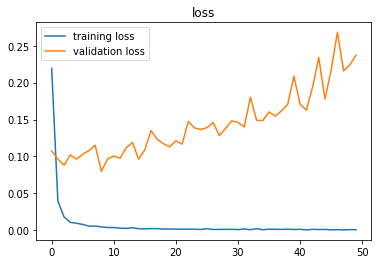

Plotting metrics...


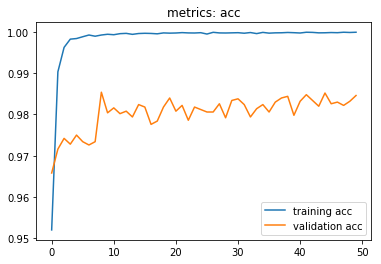

train {'acc': 0.9985818}
test {'acc': 0.9818}


In [7]:
if try_cls2:
#     gc.collect()
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

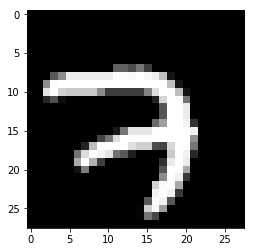

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[3.9620019e-33 1.5858832e-34 6.2999349e-20 4.4899246e-13 0.0000000e+00
 9.4382618e-34 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.5799091e-37]


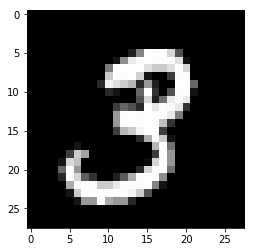

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


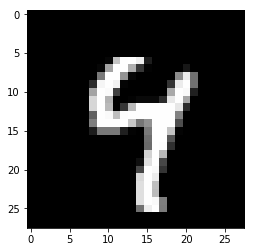

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[9.9700448e-20 6.6850328e-17 6.0662157e-22 1.3469244e-18 9.9979061e-01
 4.7537262e-17 7.4550370e-20 1.5439339e-16 3.4714013e-12 2.0946347e-04]


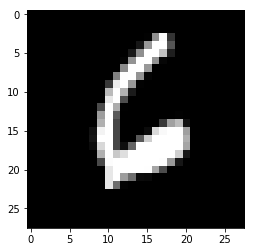

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[2.0892029e-29 1.2674849e-36 1.6163847e-34 1.4331557e-37 4.6886224e-31
 6.1594646e-29 1.0000000e+00 0.0000000e+00 3.6311709e-29 9.9957610e-32]


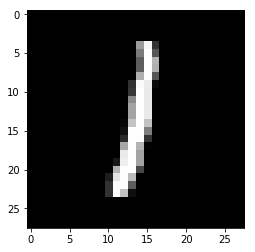

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 2.5638023e-35
 0.0000000e+00 0.0000000e+00 5.4682124e-30 1.0409105e-31 0.0000000e+00]


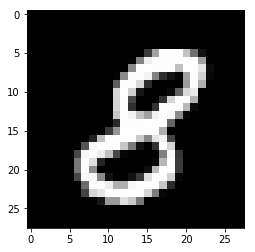

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.70323938e-37 2.50056343e-36 1.61001063e-25 8.22296208e-21
 0.00000000e+00 2.83114128e-30 1.73318870e-34 1.29289805e-36
 1.00000000e+00 3.53911082e-27]


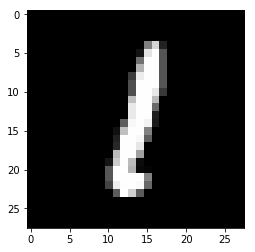

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.0000000e+00 1.0000000e+00 5.5572317e-36 3.0456429e-38 1.5035932e-34
 1.4336179e-33 0.0000000e+00 3.9096587e-28 6.7207049e-23 0.0000000e+00]


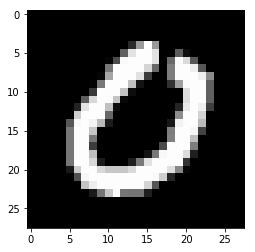

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


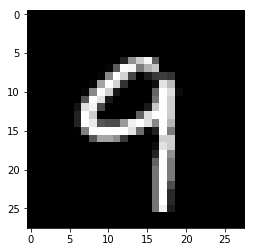

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.0246363e-30 0.0000000e+00 7.3495798e-32 4.7659404e-26 1.3662767e-20
 5.8566074e-30 4.3271463e-38 1.3983018e-30 4.6341457e-21 1.0000000e+00]


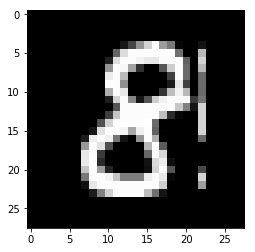

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.0000000e+00 2.9448264e-33 1.4622062e-25 8.9127373e-29 0.0000000e+00
 1.1275283e-33 2.4262323e-33 0.0000000e+00 1.0000000e+00 3.4377031e-35]


In [8]:
if try_cls2:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = teacher
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

In [9]:

def build_small_model(input_dims, output_dims, is_student):#, session):
    # session settings
    session = create_session(gpu_id='1')
#     tf.reset_default_graph()
    smallmodel = StudentNN(
        input_dims=input_dims
        , output_dims=output_dims
        , session=session
        , dtype_X=tf.float32
        , dtype_y=tf.float32)

    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=32,activation_fn=tf.nn.relu))
#     smallmodel.add_layer(
#         FC(inputs=smallmodel.h[-1],out_dims=800,activation_fn=tf.nn.relu))
    smallmodel.add_layer(
        FC(inputs=smallmodel.h[-1],out_dims=output_dims, activation_fn=tf.nn.softmax))

    if is_student:
        smallmodel.compile_student(
            loss_standard=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3) #TODO: learning rate
            , metrics = ['acc']
        )
    else:
        smallmodel.compile_nn(
            loss=tf.losses.softmax_cross_entropy(smallmodel.ys,smallmodel.logits)
            , opt=tf.train.AdamOptimizer(learning_rate=1e-3)
            , metrics = ['acc']
        )
    return smallmodel

In [10]:
train_small = True
# gc.collect()
if try_cls2 and train_small:
#     small = build_small_model(input_dims, output_dims, session, is_student=False)
    small = build_small_model(input_dims, output_dims, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=100
        ,n_epochs=50
        ,display_steps=100)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1790576071327763380
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 11267538225259862278
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2848012 , acc = 0.12 
Epoch 1 , step 100 , loss= 0.5400334 , acc = 0.9 
Epoch 1 , step 200 , loss= 0.29977244 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.31489632 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.32541424 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.34545848 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.54018664 val_loss= 0.285039 , acc = 0.84 val acc = 0.9218 
Epoch 1 finished, loss= 0.54747903 val loss= 0.285039 ,  acc = 0.8557272 val acc = 0.9218

Epoch 2 , step 50 , loss= 0.3121012 , acc = 0.92 
Epoch 2 , step 150 , loss= 0.28578994 , acc = 0.91 
Epoch 2 , step 250 , loss= 0.31329337 , acc = 0.91 
Epoch 2 

Epoch 17 , step 549 , loss= 0.060642976 val_loss= 0.11541205 , acc = 0.99 val acc = 0.9636 
Epoch 17 finished, loss= 0.07096376 val loss= 0.11541205 ,  acc = 0.97967273 val acc = 0.9636

Epoch 18 , step 50 , loss= 0.03485411 , acc = 0.99 
Epoch 18 , step 150 , loss= 0.05926682 , acc = 0.99 
Epoch 18 , step 250 , loss= 0.09396185 , acc = 0.96 
Epoch 18 , step 350 , loss= 0.023345148 , acc = 1.0 
Epoch 18 , step 450 , loss= 0.06409647 , acc = 0.98 
Epoch 18 , step 549 , loss= 0.09174544 val_loss= 0.11210298 , acc = 0.98 val acc = 0.9656 
Epoch 18 finished, loss= 0.06788665 val loss= 0.11210298 ,  acc = 0.97994554 val acc = 0.9656

Epoch 19 , step 0 , loss= 0.03473535 , acc = 0.99 
Epoch 19 , step 100 , loss= 0.018304858 , acc = 1.0 
Epoch 19 , step 200 , loss= 0.036001567 , acc = 0.98 
Epoch 19 , step 300 , loss= 0.098309234 , acc = 0.97 
Epoch 19 , step 400 , loss= 0.03906646 , acc = 0.99 
Epoch 19 , step 500 , loss= 0.09140383 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.085079715 val_l

Epoch 35 , step 100 , loss= 0.028167086 , acc = 0.99 
Epoch 35 , step 200 , loss= 0.009189933 , acc = 1.0 
Epoch 35 , step 300 , loss= 0.016938962 , acc = 1.0 
Epoch 35 , step 400 , loss= 0.094375506 , acc = 0.97 
Epoch 35 , step 500 , loss= 0.03413812 , acc = 0.99 
Epoch 35 , step 549 , loss= 0.0745809 val_loss= 0.12413999 , acc = 0.98 val acc = 0.9642 
Epoch 35 finished, loss= 0.031532392 val loss= 0.12413999 ,  acc = 0.9914909 val acc = 0.9642

Epoch 36 , step 50 , loss= 0.029238487 , acc = 0.99 
Epoch 36 , step 150 , loss= 0.036260426 , acc = 0.98 
Epoch 36 , step 250 , loss= 0.06312166 , acc = 0.99 
Epoch 36 , step 350 , loss= 0.042484574 , acc = 0.98 
Epoch 36 , step 450 , loss= 0.027026642 , acc = 0.99 
Epoch 36 , step 549 , loss= 0.073315576 val_loss= 0.12407804 , acc = 0.97 val acc = 0.967 
Epoch 36 finished, loss= 0.029988896 val loss= 0.12407804 ,  acc = 0.99216366 val acc = 0.967

Epoch 37 , step 0 , loss= 0.065641604 , acc = 0.97 
Epoch 37 , step 100 , loss= 0.027450345 , 

Small model
Plotting loss...


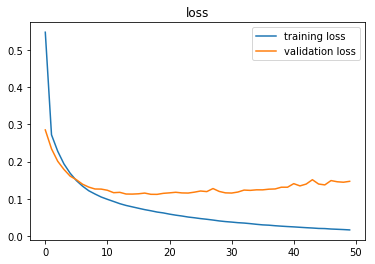

Plotting metrics...


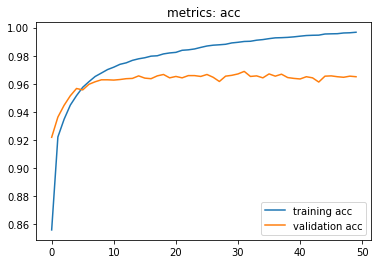

train {'acc': 0.99703634}
test {'acc': 0.9666}


In [11]:
if try_cls2 and train_small:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

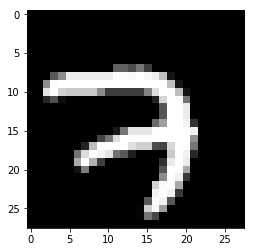

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[3.2245626e-20 3.2415893e-16 2.6834825e-06 4.3815032e-02 6.6927085e-19
 6.7255041e-16 1.5834455e-22 9.5618224e-01 5.1718758e-14 2.6302536e-14]


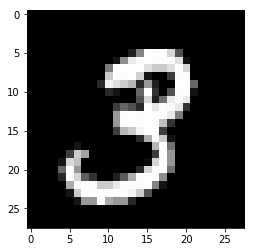

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[2.4048663e-15 1.0700417e-10 3.0839689e-13 9.9996519e-01 4.1587502e-18
 3.0105650e-07 8.0954213e-26 1.8679201e-12 3.3692817e-05 6.9866684e-07]


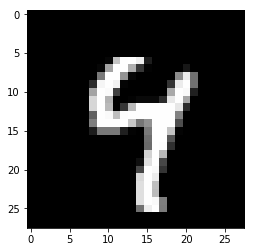

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[8.9784679e-14 1.7231974e-17 4.5101748e-17 7.5188751e-08 9.2218965e-01
 1.2105911e-05 1.9373951e-13 1.2207587e-05 3.4511933e-05 7.7751383e-02]


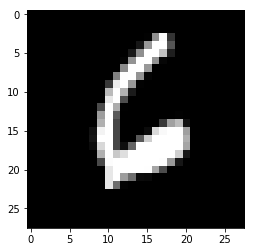

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.6857098e-07 1.0128624e-17 7.2852289e-09 3.6530468e-14 1.6464011e-09
 1.5436383e-06 9.9999833e-01 2.1250205e-17 7.4064137e-11 4.7808594e-13]


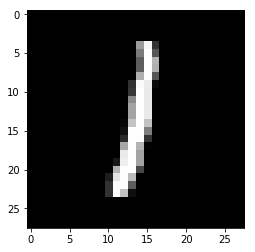

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[2.92958508e-14 9.99846220e-01 1.48938966e-06 1.01992264e-05
 4.64203298e-09 1.15841781e-08 5.30533590e-08 2.21600058e-05
 1.19713055e-04 2.37381101e-08]


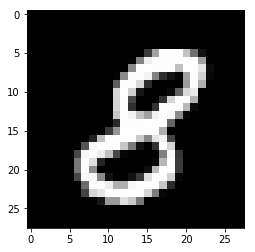

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[4.0316742e-08 5.2527676e-13 7.3684205e-08 1.9771007e-06 3.0725570e-16
 8.3570297e-09 1.1428659e-11 1.1045066e-20 9.9999785e-01 4.2216494e-10]


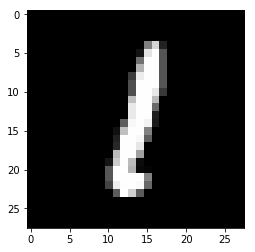

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[8.9530228e-13 9.9949312e-01 8.1561069e-07 8.9984304e-08 6.9978129e-10
 1.6595461e-12 3.2616475e-07 4.5858505e-07 5.0506630e-04 3.1576755e-11]


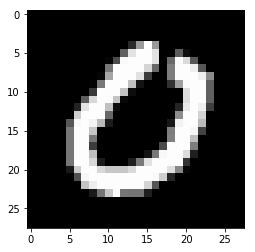

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1.0000000e+00 2.0160656e-17 5.1029563e-11 2.0639077e-16 3.8367394e-24
 1.0814734e-13 5.0593543e-11 3.7366114e-13 1.7475330e-14 2.8467946e-12]


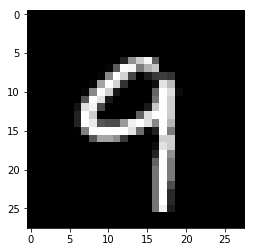

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1.15103344e-11 7.60658417e-17 9.03943803e-13 1.05399387e-07
 2.11002727e-04 4.36641494e-06 2.38155426e-14 5.06534252e-06
 1.04562945e-08 9.99779522e-01]


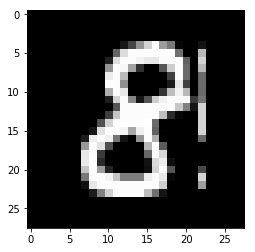

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1.1382770e-08 4.5144938e-15 5.6377883e-07 5.8742337e-08 1.1037403e-15
 2.2998059e-10 2.0337564e-14 4.1229742e-17 9.9999940e-01 3.7137626e-11]


In [12]:
if try_cls2 and train_small:
    n_samples = 10
    t = 5
    X_show, y_show = X_train.copy(), y_train.copy()
    model = small
    
    y_pred = model.predict(X_show)
    y_pred_soft = model.predict_softened(X_show, t)
    
    plot_mnist(X_show, y_show, y_pred, n_samples)
    
    X_show, y_show = None, None
#     gc.collect()

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4597091426992550326
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 14475776868249382937
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.300168 , acc = 0.13 
Epoch 1 , step 100 , loss= 0.9006128 , acc = 0.81 
Epoch 1 , step 200 , loss= 0.46183246 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.35684693 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.23796822 , acc = 0.91 
Epoch 1 , step 500 , loss= 0.31900123 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.32911056 val_loss= 0.29628983 , acc = 0.92 val acc = 0.9098 
Epoch 1 finished, loss= 0.6687241 
Epoch 2 , step 50 , loss= 0.20104435 , acc = 0.97 
Epoch 2 , step 150 , loss= 0.22664772 , acc = 0.93 
Epoch 2 , s

Epoch 19 , step 549 , loss= 0.08063327 val_loss= 0.10765188 , acc = 0.98 val acc = 0.9652 
Epoch 19 finished, loss= 0.09185281 
Epoch 20 , step 50 , loss= 0.090599306 , acc = 0.96 
Epoch 20 , step 150 , loss= 0.11659571 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.17863446 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.09578128 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.15336776 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.06132461 val_loss= 0.11052811 , acc = 0.98 val acc = 0.965 
Epoch 20 finished, loss= 0.0883571 
Epoch 21 , step 0 , loss= 0.07009011 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.10057575 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.087648675 , acc = 1.0 
Epoch 21 , step 300 , loss= 0.04708304 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.09485272 , acc = 0.94 
Epoch 21 , step 500 , loss= 0.058955062 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.053521033 val_loss= 0.108059384 , acc = 0.98 val acc = 0.9666 
Epoch 21 finished, loss= 0.08535464 
Epoch 22 , step 50 , loss= 0.02980

Epoch 39 , step 200 , loss= 0.020960955 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.061380878 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.041989807 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.048549075 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.034476317 val_loss= 0.10854999 , acc = 0.98 val acc = 0.9678 
Epoch 39 finished, loss= 0.048836403 
Epoch 40 , step 50 , loss= 0.040754043 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.021043113 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.02537317 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.011635861 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.059772395 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.02387218 val_loss= 0.10713473 , acc = 1.0 val acc = 0.966 
Epoch 40 finished, loss= 0.04762524 
Epoch 41 , step 0 , loss= 0.10325419 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.03958212 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.07429395 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.06812127 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.05129664 , acc = 0.98 
Epo

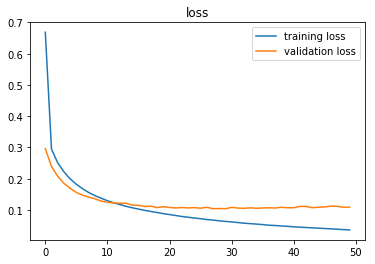

Plotting metrics...


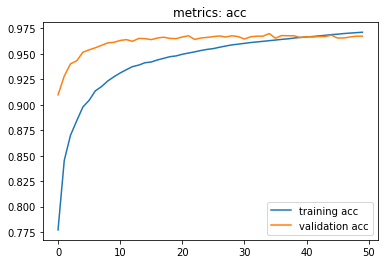

train {'acc': 0.9920545}
test {'acc': 0.9636}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13534285237003038363
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 4092515610674257733
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2740471 , acc = 0.15 
Epoch 1 , step 100 , loss= 0.8925651 , acc = 0.81 
Epoch 1 , step 200 , loss= 0.55883145 , acc = 0.83 
Epoch 1 , step 300 , loss= 0.3538112 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.3384481 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.35852668 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.23959255 val_loss= 0.32104167 , acc = 0.93 val acc = 0.918 
Epoch 1 finished, loss= 0.6705585 
Epoch 2 , step 50 , loss= 0.47967672 , acc = 0.9 
Epoch 2 , step 150

Epoch 19 , step 500 , loss= 0.044598747 , acc = 0.99 
Epoch 19 , step 549 , loss= 0.15515149 val_loss= 0.12345292 , acc = 0.97 val acc = 0.9676 
Epoch 19 finished, loss= 0.08872038 
Epoch 20 , step 50 , loss= 0.071030855 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.13286854 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.07393247 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.04412631 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.045187533 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.12508927 val_loss= 0.119405515 , acc = 0.97 val acc = 0.9688 
Epoch 20 finished, loss= 0.08466127 
Epoch 21 , step 0 , loss= 0.08166088 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.061505247 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.05222009 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.06867977 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.18922147 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.14997466 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.021520128 val_loss= 0.118026465 , acc = 1.0 val acc = 0.97 
Epoch 21 finished,

Epoch 39 , step 200 , loss= 0.04069612 , acc = 0.98 
Epoch 39 , step 300 , loss= 0.017843021 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.01468647 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.09621127 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.041589238 val_loss= 0.1160568 , acc = 0.99 val acc = 0.972 
Epoch 39 finished, loss= 0.044287026 
Epoch 40 , step 50 , loss= 0.015965678 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.04983547 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.0298782 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.019516615 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.049826585 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.06548155 val_loss= 0.11758496 , acc = 0.99 val acc = 0.972 
Epoch 40 finished, loss= 0.043209236 
Epoch 41 , step 0 , loss= 0.029099353 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.02287476 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.028954513 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.032363337 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.03085667 , acc = 0.99 
Epoch

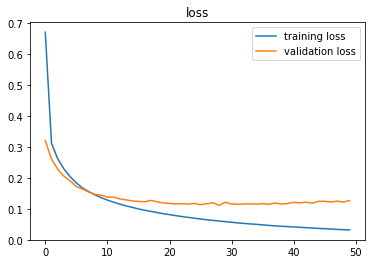

Plotting metrics...


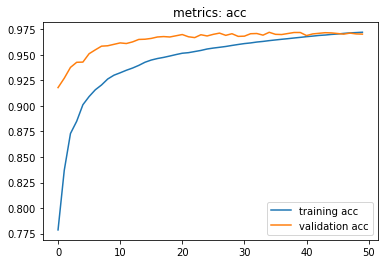

train {'acc': 0.9932909}
test {'acc': 0.9639}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 130662134294259450
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 15279996530323626410
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3041406 , acc = 0.11 
Epoch 1 , step 100 , loss= 0.85631955 , acc = 0.76 
Epoch 1 , step 200 , loss= 0.62996405 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.4322523 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.4990455 , acc = 0.88 
Epoch 1 , step 500 , loss= 0.3122391 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.5788145 val_loss= 0.33690262 , acc = 0.85 val acc = 0.9156 
Epoch 1 finished, loss= 0.64488065 
Epoch 2 , step 50 , loss= 0.2540927 , acc = 0.95 
Epoch 2 , step 150 

Epoch 19 , step 500 , loss= 0.1128355 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.08244458 val_loss= 0.12734243 , acc = 0.97 val acc = 0.9642 
Epoch 19 finished, loss= 0.083803676 
Epoch 20 , step 50 , loss= 0.05237034 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.059673987 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.03134222 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.093985915 , acc = 0.96 
Epoch 20 , step 450 , loss= 0.07416138 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.11418951 val_loss= 0.13003597 , acc = 0.98 val acc = 0.9642 
Epoch 20 finished, loss= 0.08062608 
Epoch 21 , step 0 , loss= 0.057138845 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.030747602 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.093033105 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.061573096 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.073148295 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.081479825 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.13491116 val_loss= 0.12745117 , acc = 0.96 val acc = 0.9668 
Epoch 21 finis

Epoch 39 , step 200 , loss= 0.039256707 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.044988792 , acc = 0.98 
Epoch 39 , step 400 , loss= 0.03699959 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.03223081 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.058756467 val_loss= 0.14031753 , acc = 0.99 val acc = 0.9648 
Epoch 39 finished, loss= 0.040489342 
Epoch 40 , step 50 , loss= 0.017884202 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.041358892 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.04872015 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.059748553 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.06718409 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.051022667 val_loss= 0.14074744 , acc = 0.99 val acc = 0.9652 
Epoch 40 finished, loss= 0.039083656 
Epoch 41 , step 0 , loss= 0.015421895 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.02077087 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.015507661 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.04097785 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.005547552 , acc = 1.0 

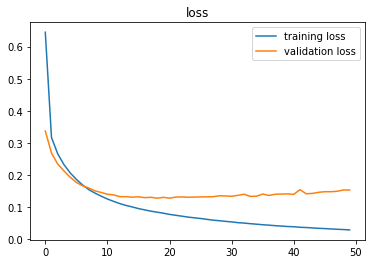

Plotting metrics...


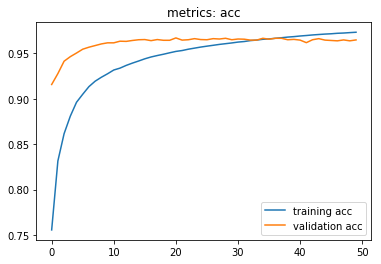

train {'acc': 0.9937636}
test {'acc': 0.9653}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2693166158859279782
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 16740995424749412919
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3095164 , acc = 0.1 
Epoch 1 , step 100 , loss= 0.7405889 , acc = 0.82 
Epoch 1 , step 200 , loss= 0.5631671 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.3363886 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.24559717 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.3041172 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.281624 val_loss= 0.31843916 , acc = 0.91 val acc = 0.9174 
Epoch 1 finished, loss= 0.6010271 
Epoch 2 , step 50 , loss= 0.3266509 , acc = 0.91 
Epoch 2 , step 150 ,

Epoch 19 , step 549 , loss= 0.09688212 val_loss= 0.12563272 , acc = 0.96 val acc = 0.9682 
Epoch 19 finished, loss= 0.07692793 
Epoch 20 , step 50 , loss= 0.062307063 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.06055692 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.10037369 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.042358734 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.053024366 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.052364513 val_loss= 0.12435761 , acc = 0.99 val acc = 0.9668 
Epoch 20 finished, loss= 0.073303714 
Epoch 21 , step 0 , loss= 0.05128292 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.044159085 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.15553287 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.10949801 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.017316153 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.042399287 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.04438395 val_loss= 0.12706271 , acc = 0.99 val acc = 0.9666 
Epoch 21 finished, loss= 0.07024321 
Epoch 22 , step 50 , loss= 0.1

Epoch 39 , step 200 , loss= 0.031450905 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.040045302 , acc = 0.98 
Epoch 39 , step 400 , loss= 0.046258505 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.03174122 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.030750364 val_loss= 0.13186783 , acc = 0.99 val acc = 0.9688 
Epoch 39 finished, loss= 0.033148564 
Epoch 40 , step 50 , loss= 0.019270718 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.018333593 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.021757606 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.01774358 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.020171124 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.012672951 val_loss= 0.1391968 , acc = 1.0 val acc = 0.9688 
Epoch 40 finished, loss= 0.031008862 
Epoch 41 , step 0 , loss= 0.019763649 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.04375314 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.020978328 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.016591161 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.0154834455 , acc = 1.0 

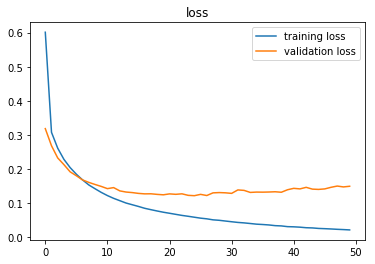

Plotting metrics...


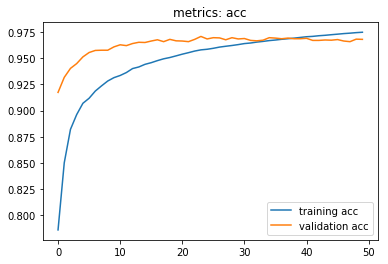

train {'acc': 0.9966}
test {'acc': 0.9659}

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6007060372285865182
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 14106958055719786476
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3127098 , acc = 0.09 
Epoch 1 , step 100 , loss= 0.66980475 , acc = 0.84 
Epoch 1 , step 200 , loss= 0.50622237 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.40146244 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.22980192 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.4228747 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.28096768 val_loss= 0.27211964 , acc = 0.91 val acc = 0.9232 
Epoch 1 finished, loss= 0.54492146 
Epoch 2 , step 50 , loss= 0.15820153 , acc = 0.99 
Epoch 2 , step 15

Epoch 19 , step 500 , loss= 0.06453211 , acc = 0.98 
Epoch 19 , step 549 , loss= 0.062625565 val_loss= 0.11263363 , acc = 0.98 val acc = 0.9674 
Epoch 19 finished, loss= 0.061599765 
Epoch 20 , step 50 , loss= 0.03843345 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.14339314 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.025086327 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.07268522 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.03203997 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.023415284 val_loss= 0.10947961 , acc = 0.99 val acc = 0.9702 
Epoch 20 finished, loss= 0.05817441 
Epoch 21 , step 0 , loss= 0.05428057 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.075394586 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.039035648 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.0651472 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.053485874 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.042858757 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.064260416 val_loss= 0.11155104 , acc = 0.98 val acc = 0.9674 
Epoch 21 finis

Epoch 39 , step 200 , loss= 0.017575521 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.061931998 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.06886696 , acc = 0.97 
Epoch 39 , step 500 , loss= 0.14878753 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.012648045 val_loss= 0.12387163 , acc = 1.0 val acc = 0.9676 
Epoch 39 finished, loss= 0.025447592 
Epoch 40 , step 50 , loss= 0.021959202 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.012132581 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.027175799 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.025016801 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.03093299 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.02858011 val_loss= 0.1372982 , acc = 0.99 val acc = 0.9672 
Epoch 40 finished, loss= 0.024517749 
Epoch 41 , step 0 , loss= 0.02731328 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.010201093 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.011293421 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.014138826 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.021439075 , acc = 1.0 


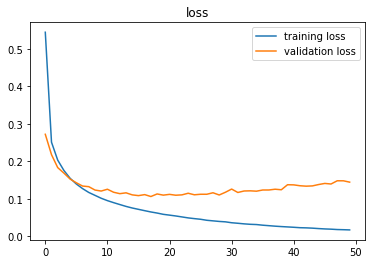

Plotting metrics...


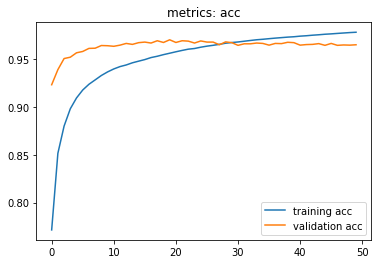

train {'acc': 0.9967273}
test {'acc': 0.9661}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15448557982507205554
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 8872729911368158695
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2926497 , acc = 0.07 
Epoch 1 , step 100 , loss= 1.3497386 , acc = 0.66 
Epoch 1 , step 200 , loss= 0.82206476 , acc = 0.83 
Epoch 1 , step 300 , loss= 0.7084614 , acc = 0.8 
Epoch 1 , step 400 , loss= 0.28835273 , acc = 0.97 
Epoch 1 , step 500 , loss= 0.5149203 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.3427191 val_loss= 0.35845903 , acc = 0.91 val acc = 0.9032 
Epoch 1 finished, loss= 0.8088863 
Epoch 2 , step 50 , loss= 0.21717535 , acc = 0.97 
Epoch 2 , step 150 

Epoch 19 , step 549 , loss= 0.07639818 val_loss= 0.13449158 , acc = 0.98 val acc = 0.9624 
Epoch 19 finished, loss= 0.118130885 
Epoch 20 , step 50 , loss= 0.10562158 , acc = 0.96 
Epoch 20 , step 150 , loss= 0.10176348 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.11682912 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.18172552 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.08895297 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.10487714 val_loss= 0.13347504 , acc = 0.99 val acc = 0.9628 
Epoch 20 finished, loss= 0.11428004 
Epoch 21 , step 0 , loss= 0.10736099 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.12827882 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.06829706 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.105519876 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.18461491 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.056901474 , acc = 1.0 
Epoch 21 , step 549 , loss= 0.10252064 val_loss= 0.13243596 , acc = 0.96 val acc = 0.963 
Epoch 21 finished, loss= 0.11098322 
Epoch 22 , step 50 , loss= 0.104829

Epoch 39 , step 300 , loss= 0.051640358 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.1277459 , acc = 0.95 
Epoch 39 , step 500 , loss= 0.18980844 , acc = 0.96 
Epoch 39 , step 549 , loss= 0.07220711 val_loss= 0.12757224 , acc = 0.98 val acc = 0.9662 
Epoch 39 finished, loss= 0.07523421 
Epoch 40 , step 50 , loss= 0.123995684 , acc = 0.96 
Epoch 40 , step 150 , loss= 0.038377915 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.046106987 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.059597384 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.07774654 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.092000484 val_loss= 0.12639734 , acc = 0.97 val acc = 0.9678 
Epoch 40 finished, loss= 0.07413692 
Epoch 41 , step 0 , loss= 0.08223677 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.08308713 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.049334873 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.056180473 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.099931024 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.1103532 , acc = 0.97 


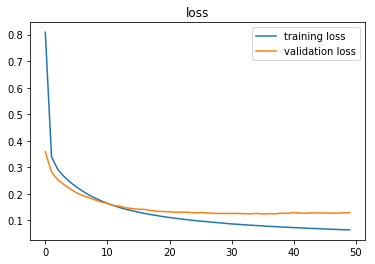

Plotting metrics...


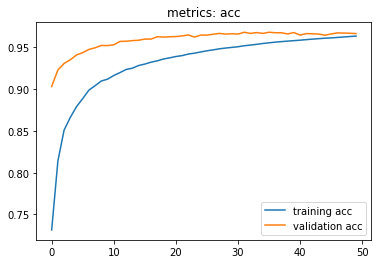

train {'acc': 0.98858184}
test {'acc': 0.9687}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4030955822347621632
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 6338026040520890005
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3094707 , acc = 0.14 
Epoch 1 , step 100 , loss= 1.2406231 , acc = 0.8 
Epoch 1 , step 200 , loss= 0.76116467 , acc = 0.83 
Epoch 1 , step 300 , loss= 0.5565829 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.54034144 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.40934676 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.44439194 val_loss= 0.43566036 , acc = 0.9 val acc = 0.91 
Epoch 1 finished, loss= 0.8456497 
Epoch 2 , step 50 , loss= 0.2570665 , acc = 0.95 
Epoch 2 , step 150 ,

Epoch 19 , step 549 , loss= 0.14024337 val_loss= 0.17373002 , acc = 0.96 val acc = 0.9612 
Epoch 19 finished, loss= 0.14220579 
Epoch 20 , step 50 , loss= 0.08272563 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.16269451 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.16706355 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.050728746 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.09723307 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.12404107 val_loss= 0.16935267 , acc = 0.98 val acc = 0.963 
Epoch 20 finished, loss= 0.13747527 
Epoch 21 , step 0 , loss= 0.28223243 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.09328341 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.102623045 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.37595075 , acc = 0.92 
Epoch 21 , step 400 , loss= 0.12579826 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.12491171 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.19611122 val_loss= 0.16722678 , acc = 0.96 val acc = 0.965 
Epoch 21 finished, loss= 0.13303843 
Epoch 22 , step 50 , loss= 0.07894336

Epoch 39 , step 300 , loss= 0.15451136 , acc = 0.98 
Epoch 39 , step 400 , loss= 0.0604751 , acc = 0.98 
Epoch 39 , step 500 , loss= 0.16554293 , acc = 0.94 
Epoch 39 , step 549 , loss= 0.13332117 val_loss= 0.15614612 , acc = 0.96 val acc = 0.9664 
Epoch 39 finished, loss= 0.0815201 
Epoch 40 , step 50 , loss= 0.08001529 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.071650386 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.09670707 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.0397157 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.036959946 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.06402369 val_loss= 0.1575324 , acc = 0.99 val acc = 0.9662 
Epoch 40 finished, loss= 0.08000864 
Epoch 41 , step 0 , loss= 0.05653977 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.1296679 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.03972058 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.09323775 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.07955514 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.12325861 , acc = 0.98 
Epoch 41 

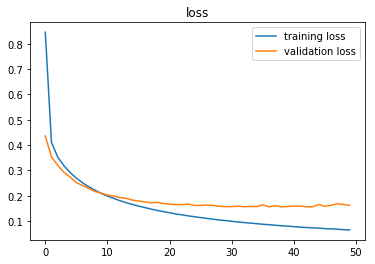

Plotting metrics...


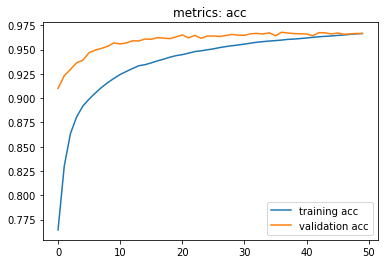

train {'acc': 0.99045455}
test {'acc': 0.9661}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16333405513188454723
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 12654710608567048455
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2529752 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.9897718 , acc = 0.88 
Epoch 1 , step 200 , loss= 0.6261137 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.6498867 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.743964 , acc = 0.77 
Epoch 1 , step 500 , loss= 0.38814205 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.46905592 val_loss= 0.44935966 , acc = 0.92 val acc = 0.9116 
Epoch 1 finished, loss= 0.7921543 
Epoch 2 , step 50 , loss= 0.32818708 , acc = 0.93 
Epoch 2 , step 150

Epoch 19 , step 549 , loss= 0.10254577 val_loss= 0.17712668 , acc = 0.97 val acc = 0.9646 
Epoch 19 finished, loss= 0.13164243 
Epoch 20 , step 50 , loss= 0.13314351 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.09171653 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.06711355 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.054278765 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.21094936 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.16742066 val_loss= 0.17051238 , acc = 0.95 val acc = 0.9626 
Epoch 20 finished, loss= 0.12697351 
Epoch 21 , step 0 , loss= 0.14420232 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.16396332 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.1024931 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.19272931 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.0649789 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.14717093 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.19376132 val_loss= 0.17638761 , acc = 0.96 val acc = 0.9634 
Epoch 21 finished, loss= 0.122447744 
Epoch 22 , step 50 , loss= 0.0623166

Epoch 39 , step 300 , loss= 0.048516475 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.042580392 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.0761798 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.069718316 val_loss= 0.16184697 , acc = 0.99 val acc = 0.969 
Epoch 39 finished, loss= 0.07226936 
Epoch 40 , step 50 , loss= 0.0985514 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.08333141 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.22648883 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.04882306 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.058110453 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.13824695 val_loss= 0.16708131 , acc = 0.97 val acc = 0.9658 
Epoch 40 finished, loss= 0.0702278 
Epoch 41 , step 0 , loss= 0.01738377 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.053885646 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.045100853 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.082890354 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.0484009 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.03315612 , acc = 0.99 
Epoch 41 

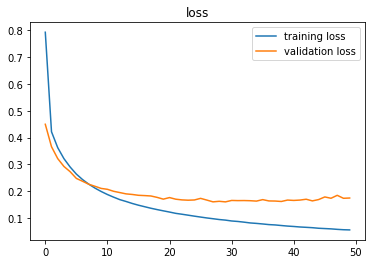

Plotting metrics...


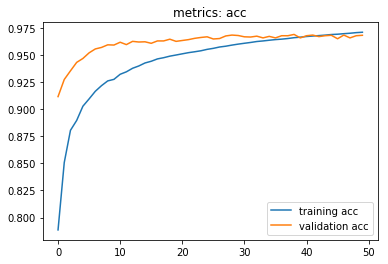

train {'acc': 0.9917091}
test {'acc': 0.9651}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13550837666787809799
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 12809383415962302791
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2357764 , acc = 0.22 
Epoch 1 , step 100 , loss= 0.7238194 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.5932225 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.49186307 , acc = 0.86 
Epoch 1 , step 400 , loss= 0.5318297 , acc = 0.85 
Epoch 1 , step 500 , loss= 0.46773636 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.47918624 val_loss= 0.406693 , acc = 0.91 val acc = 0.9186 
Epoch 1 finished, loss= 0.6945026 
Epoch 2 , step 50 , loss= 0.3971012 , acc = 0.92 
Epoch 2 , step 150

Epoch 19 , step 500 , loss= 0.12719199 , acc = 0.99 
Epoch 19 , step 549 , loss= 0.1425825 val_loss= 0.17096621 , acc = 0.96 val acc = 0.9668 
Epoch 19 finished, loss= 0.12386053 
Epoch 20 , step 50 , loss= 0.054911263 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.15139839 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.1375452 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.18541852 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.12239137 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.07505074 val_loss= 0.17181136 , acc = 0.98 val acc = 0.965 
Epoch 20 finished, loss= 0.11941543 
Epoch 21 , step 0 , loss= 0.14093484 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.0986396 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.107138395 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.072595656 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.19436501 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.1321621 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.14085247 val_loss= 0.16635504 , acc = 0.97 val acc = 0.9646 
Epoch 21 finished, loss

Epoch 39 , step 200 , loss= 0.13149948 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.04387866 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.08092076 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.05712203 , acc = 0.98 
Epoch 39 , step 549 , loss= 0.07236369 val_loss= 0.17264512 , acc = 0.98 val acc = 0.9678 
Epoch 39 finished, loss= 0.063949116 
Epoch 40 , step 50 , loss= 0.0425292 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.043940026 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.028764188 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.027765326 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.089630924 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.02409614 val_loss= 0.17397588 , acc = 1.0 val acc = 0.967 
Epoch 40 finished, loss= 0.062439054 
Epoch 41 , step 0 , loss= 0.18562922 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.025836635 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.0342766 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.056026082 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.042830728 , acc = 0.99 
Epoch 4

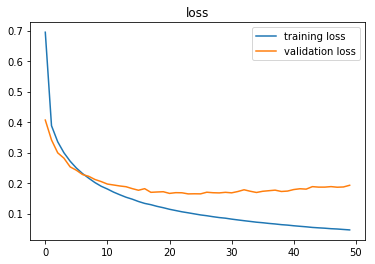

Plotting metrics...


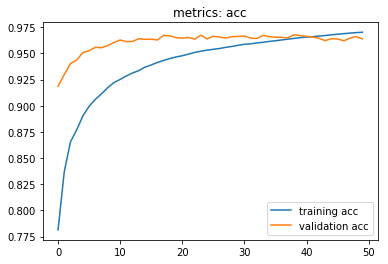

train {'acc': 0.9915818}
test {'acc': 0.9643}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12502888347695648996
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 14804406335614188390
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.297248 , acc = 0.11 
Epoch 1 , step 100 , loss= 0.56883806 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.39582324 , acc = 0.94 
Epoch 1 , step 300 , loss= 0.40654588 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.28297848 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.21203274 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.35503432 val_loss= 0.27448076 , acc = 0.89 val acc = 0.922 
Epoch 1 finished, loss= 0.5508582 
Epoch 2 , step 50 , loss= 0.14899388 , acc = 0.95 
Epoch 2 , step 1

Epoch 19 , step 500 , loss= 0.098312214 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.020763285 val_loss= 0.119619876 , acc = 1.0 val acc = 0.9646 
Epoch 19 finished, loss= 0.063197285 
Epoch 20 , step 50 , loss= 0.038997512 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.045406092 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.040090494 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.043160513 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.043642312 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.03247041 val_loss= 0.124292776 , acc = 0.98 val acc = 0.9624 
Epoch 20 finished, loss= 0.06071719 
Epoch 21 , step 0 , loss= 0.017248577 , acc = 1.0 
Epoch 21 , step 100 , loss= 0.058815546 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.051066328 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.05787749 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.024564065 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.025049437 , acc = 1.0 
Epoch 21 , step 549 , loss= 0.027514018 val_loss= 0.12171095 , acc = 0.99 val acc = 0.9652 
Epoch 2

Epoch 39 , step 100 , loss= 0.008013194 , acc = 1.0 
Epoch 39 , step 200 , loss= 0.026182048 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.011639656 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.0022682855 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.020283911 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.009568311 val_loss= 0.14021099 , acc = 1.0 val acc = 0.9654 
Epoch 39 finished, loss= 0.02820016 
Epoch 40 , step 50 , loss= 0.041674808 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.05980802 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.019815166 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.02697296 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.01728773 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.0641998 val_loss= 0.14135218 , acc = 0.98 val acc = 0.964 
Epoch 40 finished, loss= 0.026874498 
Epoch 41 , step 0 , loss= 0.07693622 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.019646363 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.018036984 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.017964935 , acc = 0.99 
Ep

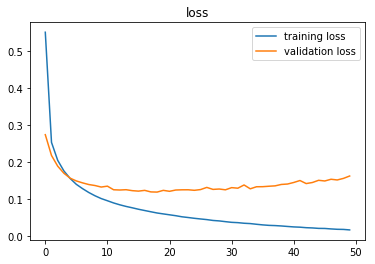

Plotting metrics...


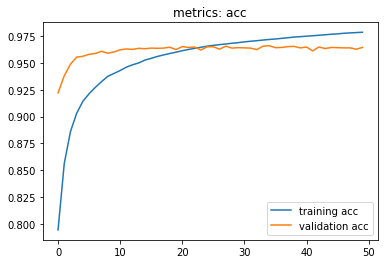

train {'acc': 0.9954364}
test {'acc': 0.9644}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4815632508473276774
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 18084710528139621243
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2996027 , acc = 0.11 
Epoch 1 , step 100 , loss= 1.6614215 , acc = 0.67 
Epoch 1 , step 200 , loss= 1.0633394 , acc = 0.75 
Epoch 1 , step 300 , loss= 0.7421941 , acc = 0.86 
Epoch 1 , step 400 , loss= 0.5343886 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.5175235 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.47559586 val_loss= 0.50762445 , acc = 0.92 val acc = 0.888 
Epoch 1 finished, loss= 1.0314965 
Epoch 2 , step 50 , loss= 0.43375507 , acc = 0.92 
Epoch 2 , step 150 , 

Epoch 19 , step 549 , loss= 0.116612904 val_loss= 0.250518 , acc = 0.98 val acc = 0.9612 
Epoch 19 finished, loss= 0.24555615 
Epoch 20 , step 50 , loss= 0.21503101 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.25162506 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.22082715 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.24665828 , acc = 0.96 
Epoch 20 , step 450 , loss= 0.23914726 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.29040566 val_loss= 0.2466678 , acc = 0.96 val acc = 0.9618 
Epoch 20 finished, loss= 0.2415427 
Epoch 21 , step 0 , loss= 0.21397692 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.337576 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.333719 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.24584764 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.19433227 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.2268736 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.21193328 val_loss= 0.24487075 , acc = 0.99 val acc = 0.965 
Epoch 21 finished, loss= 0.23778184 
Epoch 22 , step 50 , loss= 0.22394247 , acc =

Epoch 39 , step 400 , loss= 0.23978698 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.27668414 , acc = 0.95 
Epoch 39 , step 549 , loss= 0.19932912 val_loss= 0.22383723 , acc = 0.98 val acc = 0.967 
Epoch 39 finished, loss= 0.20368336 
Epoch 40 , step 50 , loss= 0.15247627 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.21416724 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.15331234 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.21077688 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.11871895 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.16650204 val_loss= 0.22386436 , acc = 0.99 val acc = 0.9676 
Epoch 40 finished, loss= 0.2027129 
Epoch 41 , step 0 , loss= 0.26994002 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.2536047 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.2684891 , acc = 0.97 
Epoch 41 , step 300 , loss= 0.28431934 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.18058805 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.27126133 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.21725857 val_loss= 0.22334592 , ac

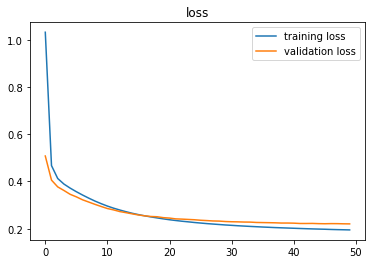

Plotting metrics...


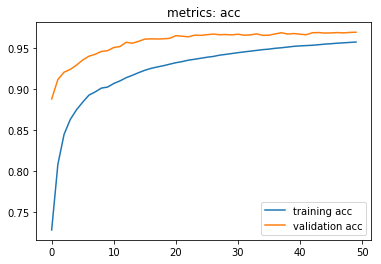

train {'acc': 0.9815091}
test {'acc': 0.9677}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11051515378929042855
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 5781550120808884757
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3082337 , acc = 0.1 
Epoch 1 , step 100 , loss= 1.5394273 , acc = 0.82 
Epoch 1 , step 200 , loss= 1.1001813 , acc = 0.85 
Epoch 1 , step 300 , loss= 0.8829345 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.78675634 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.8862148 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.54364383 val_loss= 0.66440755 , acc = 0.91 val acc = 0.9022 
Epoch 1 finished, loss= 1.1207182 
Epoch 2 , step 50 , loss= 0.6430829 , acc = 0.91 
Epoch 2 , step 150

Epoch 19 , step 549 , loss= 0.3547942 val_loss= 0.3075226 , acc = 0.96 val acc = 0.959 
Epoch 19 finished, loss= 0.2752065 
Epoch 20 , step 50 , loss= 0.22309467 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.19858621 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.20773813 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.2509741 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.4162533 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.22561544 val_loss= 0.3017174 , acc = 0.96 val acc = 0.9618 
Epoch 20 finished, loss= 0.2692166 
Epoch 21 , step 0 , loss= 0.25612107 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.32666588 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.2200312 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.20962073 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.2983255 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.52464175 , acc = 0.91 
Epoch 21 , step 549 , loss= 0.3664106 val_loss= 0.29878333 , acc = 0.95 val acc = 0.961 
Epoch 21 finished, loss= 0.26264182 
Epoch 22 , step 50 , loss= 0.3399282 , acc = 0.9

Epoch 39 , step 400 , loss= 0.14162207 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.23666187 , acc = 0.98 
Epoch 39 , step 549 , loss= 0.18559378 val_loss= 0.2728661 , acc = 0.98 val acc = 0.9636 
Epoch 39 finished, loss= 0.1997901 
Epoch 40 , step 50 , loss= 0.18185937 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.2298285 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.22922929 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.1633145 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.22831601 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.22476771 val_loss= 0.27392027 , acc = 0.98 val acc = 0.963 
Epoch 40 finished, loss= 0.19684884 
Epoch 41 , step 0 , loss= 0.12752475 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.13450982 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.1267429 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.23323056 , acc = 0.97 
Epoch 41 , step 400 , loss= 0.1816555 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.16564433 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.14795771 val_loss= 0.27535927 , acc = 0

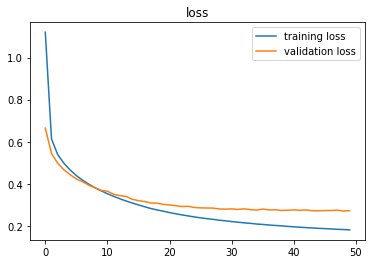

Plotting metrics...


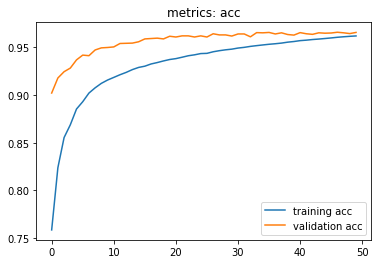

train {'acc': 0.988}
test {'acc': 0.9654}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11126333785685893942
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 11680507639396402596
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3323693 , acc = 0.07 
Epoch 1 , step 100 , loss= 1.3049515 , acc = 0.84 
Epoch 1 , step 200 , loss= 1.039237 , acc = 0.85 
Epoch 1 , step 300 , loss= 0.7880854 , acc = 0.93 
Epoch 1 , step 400 , loss= 0.9076822 , acc = 0.85 
Epoch 1 , step 500 , loss= 0.79822075 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.63556826 val_loss= 0.6927078 , acc = 0.94 val acc = 0.9082 
Epoch 1 finished, loss= 1.053767 
Epoch 2 , step 50 , loss= 0.70088285 , acc = 0.93 
Epoch 2 , step 150 , los

Epoch 19 , step 549 , loss= 0.18908523 val_loss= 0.3223979 , acc = 0.98 val acc = 0.958 
Epoch 19 finished, loss= 0.2708274 
Epoch 20 , step 50 , loss= 0.2811792 , acc = 0.96 
Epoch 20 , step 150 , loss= 0.188756 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.20128076 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.19630668 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.38716948 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.23260386 val_loss= 0.32045275 , acc = 0.97 val acc = 0.958 
Epoch 20 finished, loss= 0.26223975 
Epoch 21 , step 0 , loss= 0.31340003 , acc = 0.95 
Epoch 21 , step 100 , loss= 0.43153328 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.18151551 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.28359935 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.24989544 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.38676655 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.15714855 val_loss= 0.3172109 , acc = 0.98 val acc = 0.9574 
Epoch 21 finished, loss= 0.2558839 
Epoch 22 , step 50 , loss= 0.17502144 , acc =

Epoch 39 , step 400 , loss= 0.17164618 , acc = 0.96 
Epoch 39 , step 500 , loss= 0.23267323 , acc = 0.97 
Epoch 39 , step 549 , loss= 0.20573972 val_loss= 0.2987245 , acc = 0.96 val acc = 0.9602 
Epoch 39 finished, loss= 0.17161447 
Epoch 40 , step 50 , loss= 0.23174232 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.21698317 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.22562373 , acc = 0.96 
Epoch 40 , step 350 , loss= 0.12688959 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.26479772 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.12256154 val_loss= 0.30028653 , acc = 0.99 val acc = 0.9608 
Epoch 40 finished, loss= 0.16829224 
Epoch 41 , step 0 , loss= 0.12879716 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.11552871 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.1486297 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.20359515 , acc = 0.96 
Epoch 41 , step 400 , loss= 0.2141797 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.23926836 , acc = 0.97 
Epoch 41 , step 549 , loss= 0.17938976 val_loss= 0.29975152 , a

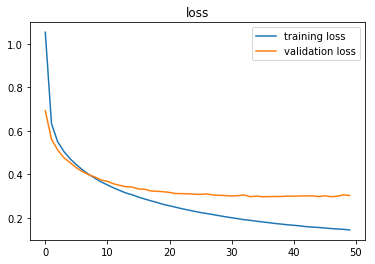

Plotting metrics...


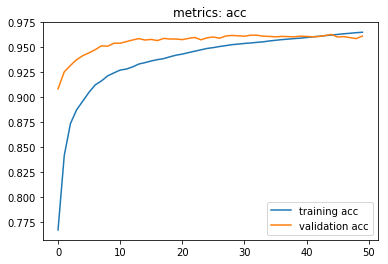

train {'acc': 0.98856366}
test {'acc': 0.9615}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5825378977014297016
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 57165682767871397
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2796643 , acc = 0.11 
Epoch 1 , step 100 , loss= 0.97159606 , acc = 0.81 
Epoch 1 , step 200 , loss= 0.71655965 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.7273811 , acc = 0.81 
Epoch 1 , step 400 , loss= 0.6097958 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.56783676 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.6181351 val_loss= 0.5478723 , acc = 0.9 val acc = 0.9192 
Epoch 1 finished, loss= 0.82422644 
Epoch 2 , step 50 , loss= 0.5973841 , acc = 0.88 
Epoch 2 , step 150 ,

Epoch 19 , step 549 , loss= 0.31035408 val_loss= 0.27499205 , acc = 0.96 val acc = 0.9612 
Epoch 19 finished, loss= 0.20557655 
Epoch 20 , step 50 , loss= 0.2781307 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.14324526 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.25582054 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.3262678 , acc = 0.95 
Epoch 20 , step 450 , loss= 0.15362123 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.15794133 val_loss= 0.27501616 , acc = 0.99 val acc = 0.9616 
Epoch 20 finished, loss= 0.19910067 
Epoch 21 , step 0 , loss= 0.21898626 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.21959892 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.25484118 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.17184237 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.11687031 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.1692295 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.16208565 val_loss= 0.2731649 , acc = 0.99 val acc = 0.9628 
Epoch 21 finished, loss= 0.1929509 
Epoch 22 , step 50 , loss= 0.10339157 , a

Epoch 39 , step 400 , loss= 0.13117355 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.11649224 , acc = 0.97 
Epoch 39 , step 549 , loss= 0.24109131 val_loss= 0.28300875 , acc = 0.98 val acc = 0.9628 
Epoch 39 finished, loss= 0.12552826 
Epoch 40 , step 50 , loss= 0.114018366 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.08943329 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.11256578 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.10523614 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.24794927 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.103525564 val_loss= 0.27911216 , acc = 0.98 val acc = 0.9638 
Epoch 40 finished, loss= 0.12312492 
Epoch 41 , step 0 , loss= 0.17038538 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.07594348 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.21504912 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.10453664 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.07935658 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.0875448 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.12844841 val_loss= 0.28963542

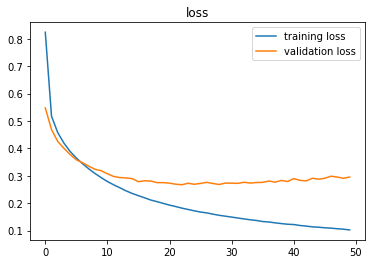

Plotting metrics...


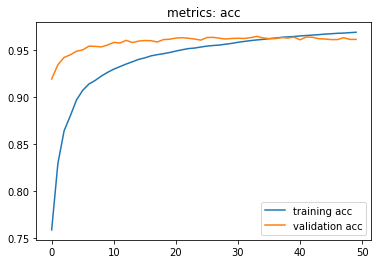

train {'acc': 0.98874545}
test {'acc': 0.9641}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16281661121088845865
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 14723156721852935264
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3930027 , acc = 0.14 
Epoch 1 , step 100 , loss= 0.8805671 , acc = 0.73 
Epoch 1 , step 200 , loss= 0.41950783 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.46985444 , acc = 0.87 
Epoch 1 , step 400 , loss= 0.4600812 , acc = 0.86 
Epoch 1 , step 500 , loss= 0.43436414 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.21030973 val_loss= 0.27656138 , acc = 0.94 val acc = 0.925 
Epoch 1 finished, loss= 0.56641734 
Epoch 2 , step 50 , loss= 0.31484476 , acc = 0.93 
Epoch 2 , step

Epoch 19 , step 500 , loss= 0.031131666 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.07554693 val_loss= 0.11298894 , acc = 0.97 val acc = 0.9664 
Epoch 19 finished, loss= 0.062952384 
Epoch 20 , step 50 , loss= 0.076937586 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.12518828 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.021527052 , acc = 1.0 
Epoch 20 , step 350 , loss= 0.05998902 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.02289651 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.09809252 val_loss= 0.11445564 , acc = 0.98 val acc = 0.9672 
Epoch 20 finished, loss= 0.05956381 
Epoch 21 , step 0 , loss= 0.20227283 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.09017124 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.07762666 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.027612664 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.09821879 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.07039965 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.10658965 val_loss= 0.10966626 , acc = 0.97 val acc = 0.9672 
Epoch 21 finished,

Epoch 39 , step 200 , loss= 0.015195949 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.030738777 , acc = 0.98 
Epoch 39 , step 400 , loss= 0.022063784 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.03494719 , acc = 0.99 
Epoch 39 , step 549 , loss= 0.04040433 val_loss= 0.12739661 , acc = 0.98 val acc = 0.9706 
Epoch 39 finished, loss= 0.025744915 
Epoch 40 , step 50 , loss= 0.016573798 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.018847805 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.013429449 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.007948113 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.0043008523 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.025913749 val_loss= 0.12655708 , acc = 0.99 val acc = 0.9694 
Epoch 40 finished, loss= 0.02476066 
Epoch 41 , step 0 , loss= 0.023233926 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.046264533 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.014811093 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.0135962665 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.019349517 , acc = 0.

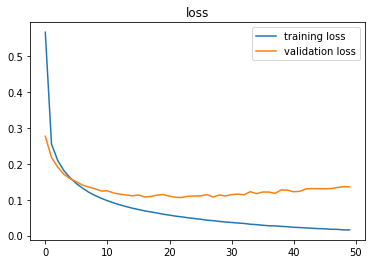

Plotting metrics...


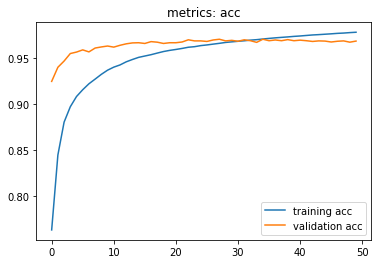

train {'acc': 0.99716365}
test {'acc': 0.9651}

Training student with temperature = 16 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5718414265399346023
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 7733716813254168017
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3012464 , acc = 0.08 
Epoch 1 , step 100 , loss= 1.9820838 , acc = 0.54 
Epoch 1 , step 200 , loss= 1.3729312 , acc = 0.74 
Epoch 1 , step 300 , loss= 1.1615254 , acc = 0.76 
Epoch 1 , step 400 , loss= 1.0927914 , acc = 0.87 
Epoch 1 , step 500 , loss= 1.0327082 , acc = 0.84 
Epoch 1 , step 549 , loss= 0.8617856 val_loss= 0.93751454 , acc = 0.85 val acc = 0.873 
Epoch 1 finished, loss= 1.3936806 
Epoch 2 , step 50 , loss= 0.95045304 , acc = 0.87 
Epoch 2 , step 150 ,

Epoch 20 , step 50 , loss= 0.69244653 , acc = 0.96 
Epoch 20 , step 150 , loss= 0.6575439 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.7617427 , acc = 0.94 
Epoch 20 , step 350 , loss= 0.7708256 , acc = 0.96 
Epoch 20 , step 450 , loss= 0.7252524 , acc = 0.94 
Epoch 20 , step 549 , loss= 0.6270616 val_loss= 0.70304084 , acc = 0.98 val acc = 0.9538 
Epoch 20 finished, loss= 0.7187722 
Epoch 21 , step 0 , loss= 0.8671086 , acc = 0.93 
Epoch 21 , step 100 , loss= 0.73327047 , acc = 0.95 
Epoch 21 , step 200 , loss= 0.6192416 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.7832687 , acc = 0.93 
Epoch 21 , step 400 , loss= 0.73595077 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.59756005 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.7509941 val_loss= 0.70170254 , acc = 0.95 val acc = 0.954 
Epoch 21 finished, loss= 0.71665883 
Epoch 22 , step 50 , loss= 0.6705363 , acc = 0.98 
Epoch 22 , step 150 , loss= 0.77028733 , acc = 0.97 
Epoch 22 , step 250 , loss= 0.78671956 , acc = 0.91 
Epoch 22 , step 35

Epoch 40 , step 50 , loss= 0.6949286 , acc = 0.97 
Epoch 40 , step 150 , loss= 0.7727931 , acc = 0.96 
Epoch 40 , step 250 , loss= 0.7998079 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.81143785 , acc = 0.94 
Epoch 40 , step 450 , loss= 0.5682604 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.76600295 val_loss= 0.68731636 , acc = 0.93 val acc = 0.9592 
Epoch 40 finished, loss= 0.6951735 
Epoch 41 , step 0 , loss= 0.653659 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.64781594 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.73130155 , acc = 0.92 
Epoch 41 , step 300 , loss= 0.6946542 , acc = 0.93 
Epoch 41 , step 400 , loss= 0.66964686 , acc = 0.98 
Epoch 41 , step 500 , loss= 0.64892936 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.691809 val_loss= 0.68700147 , acc = 0.95 val acc = 0.9596 
Epoch 41 finished, loss= 0.6945488 
Epoch 42 , step 50 , loss= 0.6901774 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.6696401 , acc = 0.98 
Epoch 42 , step 250 , loss= 0.81785005 , acc = 0.91 
Epoch 42 , step 350

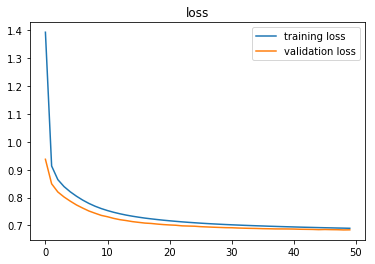

Plotting metrics...


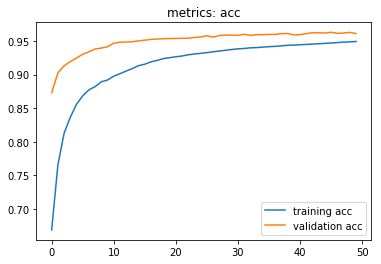

train {'acc': 0.9711273}
test {'acc': 0.9616}

Training student with temperature = 16 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17273676456270619661
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 218734956536176602
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.314598 , acc = 0.13 
Epoch 1 , step 100 , loss= 1.7287098 , acc = 0.78 
Epoch 1 , step 200 , loss= 1.5777172 , acc = 0.85 
Epoch 1 , step 300 , loss= 1.3940582 , acc = 0.87 
Epoch 1 , step 400 , loss= 1.223855 , acc = 0.88 
Epoch 1 , step 500 , loss= 1.1241342 , acc = 0.89 
Epoch 1 , step 549 , loss= 1.1213692 val_loss= 1.1426274 , acc = 0.91 val acc = 0.8992 
Epoch 1 finished, loss= 1.496104 
Epoch 2 , step 50 , loss= 1.2886281 , acc = 0.88 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 0.8404963 , acc = 0.92 
Epoch 20 , step 150 , loss= 0.48809832 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.7781263 , acc = 0.93 
Epoch 20 , step 350 , loss= 0.6980792 , acc = 0.92 
Epoch 20 , step 450 , loss= 0.7957113 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.6742886 val_loss= 0.7026442 , acc = 0.97 val acc = 0.9602 
Epoch 20 finished, loss= 0.68602234 
Epoch 21 , step 0 , loss= 0.6505364 , acc = 0.95 
Epoch 21 , step 100 , loss= 0.63566655 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.6711884 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.57968557 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.7064244 , acc = 0.95 
Epoch 21 , step 500 , loss= 0.631833 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.6561346 val_loss= 0.7005363 , acc = 0.97 val acc = 0.9598 
Epoch 21 finished, loss= 0.67937255 
Epoch 22 , step 50 , loss= 0.7974374 , acc = 0.96 
Epoch 22 , step 150 , loss= 0.6818797 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.49816278 , acc = 0.98 
Epoch 22 , step 350 , 

Epoch 40 , step 50 , loss= 0.5620142 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.56937265 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.55653965 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.6193443 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.6322561 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.5897994 val_loss= 0.66680706 , acc = 0.99 val acc = 0.961 
Epoch 40 finished, loss= 0.6052767 
Epoch 41 , step 0 , loss= 0.5674345 , acc = 0.96 
Epoch 41 , step 100 , loss= 0.7101893 , acc = 0.96 
Epoch 41 , step 200 , loss= 0.76844984 , acc = 0.92 
Epoch 41 , step 300 , loss= 0.6350794 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.6842192 , acc = 0.97 
Epoch 41 , step 500 , loss= 0.65981746 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.5979214 val_loss= 0.6644305 , acc = 0.97 val acc = 0.962 
Epoch 41 finished, loss= 0.6030655 
Epoch 42 , step 50 , loss= 0.8476148 , acc = 0.96 
Epoch 42 , step 150 , loss= 0.62400866 , acc = 0.97 
Epoch 42 , step 250 , loss= 0.62325543 , acc = 0.98 
Epoch 42 , step 350 ,

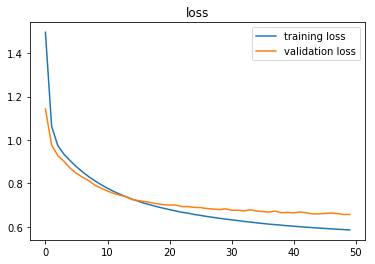

Plotting metrics...


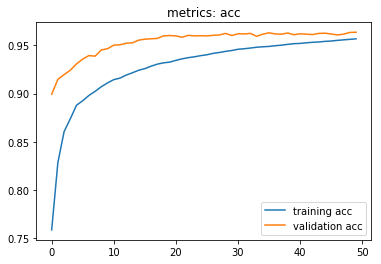

train {'acc': 0.98367274}
test {'acc': 0.9652}

Training student with temperature = 16 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18417505849574502630
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 11845825311299645335
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3192215 , acc = 0.08 
Epoch 1 , step 100 , loss= 1.376909 , acc = 0.83 
Epoch 1 , step 200 , loss= 1.2105556 , acc = 0.9 
Epoch 1 , step 300 , loss= 1.1223482 , acc = 0.87 
Epoch 1 , step 400 , loss= 1.0488337 , acc = 0.94 
Epoch 1 , step 500 , loss= 1.0110261 , acc = 0.9 
Epoch 1 , step 549 , loss= 1.1303539 val_loss= 1.0177939 , acc = 0.89 val acc = 0.9126 
Epoch 1 finished, loss= 1.2586628 
Epoch 2 , step 50 , loss= 0.9507221 , acc = 0.96 
Epoch 2 , step 150 , l

Epoch 20 , step 50 , loss= 0.56690043 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.64461976 , acc = 0.94 
Epoch 20 , step 250 , loss= 0.457148 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.6932353 , acc = 0.94 
Epoch 20 , step 450 , loss= 0.67294097 , acc = 0.95 
Epoch 20 , step 549 , loss= 0.56078345 val_loss= 0.64914644 , acc = 0.95 val acc = 0.9562 
Epoch 20 finished, loss= 0.5947906 
Epoch 21 , step 0 , loss= 0.5418843 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.78805554 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.48942888 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.46193206 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.8146875 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.55015373 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.73863244 val_loss= 0.64470077 , acc = 0.94 val acc = 0.9554 
Epoch 21 finished, loss= 0.5857482 
Epoch 22 , step 50 , loss= 0.5880463 , acc = 0.95 
Epoch 22 , step 150 , loss= 0.44586152 , acc = 0.97 
Epoch 22 , step 250 , loss= 0.4785274 , acc = 0.98 
Epoch 22 , step

Epoch 40 , step 50 , loss= 0.43267474 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.47827595 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.38567886 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.5354879 , acc = 0.96 
Epoch 40 , step 450 , loss= 0.5174643 , acc = 0.96 
Epoch 40 , step 549 , loss= 0.3328644 val_loss= 0.6038752 , acc = 1.0 val acc = 0.9604 
Epoch 40 finished, loss= 0.47953185 
Epoch 41 , step 0 , loss= 0.41584447 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.44478458 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.4151081 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.53551066 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.573257 , acc = 0.95 
Epoch 41 , step 500 , loss= 0.5272522 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.47244394 val_loss= 0.6073302 , acc = 0.98 val acc = 0.9584 
Epoch 41 finished, loss= 0.47612295 
Epoch 42 , step 50 , loss= 0.55334765 , acc = 0.96 
Epoch 42 , step 150 , loss= 0.48540232 , acc = 0.97 
Epoch 42 , step 250 , loss= 0.43806303 , acc = 0.99 
Epoch 42 , step 3

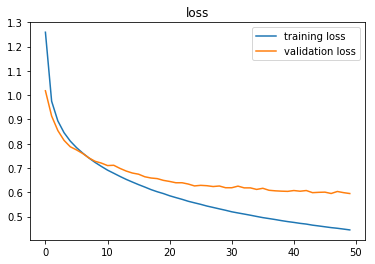

Plotting metrics...


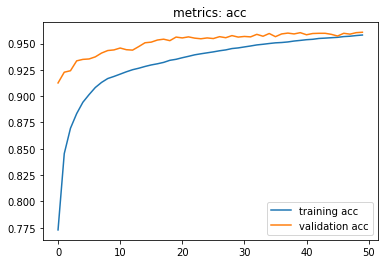

train {'acc': 0.98267275}
test {'acc': 0.9621}

Training student with temperature = 16 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15669302358699532942
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 1209754601951930984
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2782521 , acc = 0.09 
Epoch 1 , step 100 , loss= 1.0332761 , acc = 0.81 
Epoch 1 , step 200 , loss= 0.7964263 , acc = 0.91 
Epoch 1 , step 300 , loss= 0.7213199 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.7890135 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.7162546 , acc = 0.87 
Epoch 1 , step 549 , loss= 0.6903919 val_loss= 0.67644405 , acc = 0.9 val acc = 0.9194 
Epoch 1 finished, loss= 0.9274079 
Epoch 2 , step 50 , loss= 0.76231027 , acc = 0.92 
Epoch 2 , step 15

Epoch 19 , step 549 , loss= 0.4063171 val_loss= 0.4301607 , acc = 0.96 val acc = 0.9608 
Epoch 19 finished, loss= 0.3658995 
Epoch 20 , step 50 , loss= 0.539455 , acc = 0.94 
Epoch 20 , step 150 , loss= 0.3256357 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.2819224 , acc = 1.0 
Epoch 20 , step 350 , loss= 0.33269173 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.38645208 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.6181326 val_loss= 0.4239676 , acc = 0.96 val acc = 0.9606 
Epoch 20 finished, loss= 0.35915315 
Epoch 21 , step 0 , loss= 0.28535354 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.31760564 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.4881027 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.38687176 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.28174463 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.37923926 , acc = 0.96 
Epoch 21 , step 549 , loss= 0.28347853 val_loss= 0.4207943 , acc = 0.98 val acc = 0.9612 
Epoch 21 finished, loss= 0.35106793 
Epoch 22 , step 50 , loss= 0.26446885 , acc = 1.0

Epoch 39 , step 500 , loss= 0.26673242 , acc = 0.98 
Epoch 39 , step 549 , loss= 0.2853635 val_loss= 0.43040913 , acc = 0.97 val acc = 0.9626 
Epoch 39 finished, loss= 0.26958102 
Epoch 40 , step 50 , loss= 0.30886912 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.2806253 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.30322897 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.24757765 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.26185286 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.2342365 val_loss= 0.4319129 , acc = 0.99 val acc = 0.961 
Epoch 40 finished, loss= 0.26688814 
Epoch 41 , step 0 , loss= 0.23634772 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.2454187 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.4127817 , acc = 0.96 
Epoch 41 , step 300 , loss= 0.20441784 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.20401555 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.24124293 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.21078844 val_loss= 0.4271263 , acc = 1.0 val acc = 0.9626 
Epoch 41 finished, loss= 0.263258

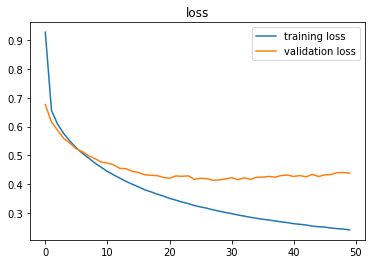

Plotting metrics...


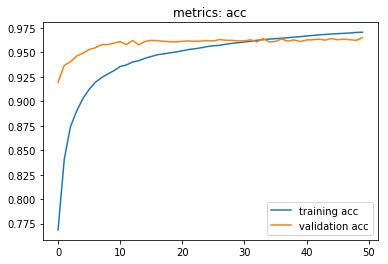

train {'acc': 0.99063635}
test {'acc': 0.963}

Training student with temperature = 16 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1444235356369392548
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 15576357402835447802
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3854842 , acc = 0.1 
Epoch 1 , step 100 , loss= 0.6801828 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.42709228 , acc = 0.87 
Epoch 1 , step 300 , loss= 0.34179506 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.29443473 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.23498733 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.27461097 val_loss= 0.28976083 , acc = 0.93 val acc = 0.9174 
Epoch 1 finished, loss= 0.5647641 
Epoch 2 , step 50 , loss= 0.18140627 , acc = 0.95 
Epoch 2 , step 1

Epoch 19 , step 500 , loss= 0.041208915 , acc = 0.99 
Epoch 19 , step 549 , loss= 0.08547583 val_loss= 0.116559654 , acc = 0.98 val acc = 0.9652 
Epoch 19 finished, loss= 0.067325085 
Epoch 20 , step 50 , loss= 0.053066283 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.10235473 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.14682902 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.026289286 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.077028014 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.072323814 val_loss= 0.11658955 , acc = 0.97 val acc = 0.964 
Epoch 20 finished, loss= 0.06393057 
Epoch 21 , step 0 , loss= 0.09562035 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.034125153 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.06794809 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.025140248 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.032356642 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.030272141 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.06866833 val_loss= 0.11902029 , acc = 0.98 val acc = 0.9654 
Epoch 21 fin

Epoch 39 , step 200 , loss= 0.02130718 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.04991356 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.016341578 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.0041414453 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.05595114 val_loss= 0.13201587 , acc = 0.99 val acc = 0.9646 
Epoch 39 finished, loss= 0.027721409 
Epoch 40 , step 50 , loss= 0.019022912 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.017569702 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.03511875 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.031549454 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.036422845 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.011732098 val_loss= 0.13510507 , acc = 1.0 val acc = 0.9654 
Epoch 40 finished, loss= 0.026466565 
Epoch 41 , step 0 , loss= 0.040709477 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.04181418 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.018475326 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.0058877766 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.057265848 , acc = 0.

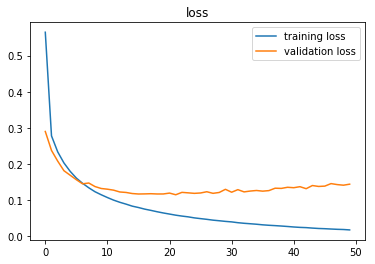

Plotting metrics...


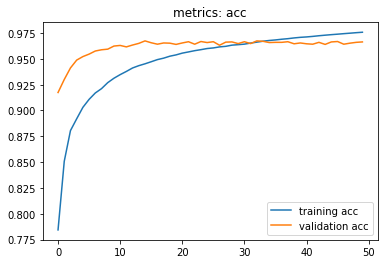

train {'acc': 0.99643636}
test {'acc': 0.9642}

Training student with temperature = 32 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 467345103062556884
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 546648628676669963
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3016448 , acc = 0.11 
Epoch 1 , step 100 , loss= 2.1237032 , acc = 0.45 
Epoch 1 , step 200 , loss= 1.9685488 , acc = 0.6 
Epoch 1 , step 300 , loss= 1.8492017 , acc = 0.75 
Epoch 1 , step 400 , loss= 1.7239953 , acc = 0.81 
Epoch 1 , step 500 , loss= 1.8440164 , acc = 0.81 
Epoch 1 , step 549 , loss= 1.6706926 val_loss= 1.6797628 , acc = 0.77 val acc = 0.8078 
Epoch 1 finished, loss= 1.9082848 
Epoch 2 , step 50 , loss= 1.7552396 , acc = 0.74 
Epoch 2 , step 150 , los

Epoch 20 , step 50 , loss= 1.5002654 , acc = 0.95 
Epoch 20 , step 150 , loss= 1.536687 , acc = 0.88 
Epoch 20 , step 250 , loss= 1.5494857 , acc = 0.94 
Epoch 20 , step 350 , loss= 1.4749844 , acc = 0.95 
Epoch 20 , step 450 , loss= 1.4995446 , acc = 0.95 
Epoch 20 , step 549 , loss= 1.5516821 val_loss= 1.5376154 , acc = 0.93 val acc = 0.942 
Epoch 20 finished, loss= 1.5585984 
Epoch 21 , step 0 , loss= 1.5917706 , acc = 0.92 
Epoch 21 , step 100 , loss= 1.5103385 , acc = 0.97 
Epoch 21 , step 200 , loss= 1.5898383 , acc = 0.96 
Epoch 21 , step 300 , loss= 1.627438 , acc = 0.96 
Epoch 21 , step 400 , loss= 1.5287232 , acc = 0.93 
Epoch 21 , step 500 , loss= 1.5439539 , acc = 0.96 
Epoch 21 , step 549 , loss= 1.5441815 val_loss= 1.5365427 , acc = 0.91 val acc = 0.9402 
Epoch 21 finished, loss= 1.557528 
Epoch 22 , step 50 , loss= 1.5275952 , acc = 0.92 
Epoch 22 , step 150 , loss= 1.5167656 , acc = 0.97 
Epoch 22 , step 250 , loss= 1.4870092 , acc = 0.91 
Epoch 22 , step 350 , loss= 1.

Epoch 40 , step 150 , loss= 1.4876437 , acc = 0.96 
Epoch 40 , step 250 , loss= 1.5959404 , acc = 0.92 
Epoch 40 , step 350 , loss= 1.6549599 , acc = 0.95 
Epoch 40 , step 450 , loss= 1.5606993 , acc = 0.97 
Epoch 40 , step 549 , loss= 1.534436 val_loss= 1.5266553 , acc = 0.94 val acc = 0.95 
Epoch 40 finished, loss= 1.5447931 
Epoch 41 , step 0 , loss= 1.5770346 , acc = 0.96 
Epoch 41 , step 100 , loss= 1.5620576 , acc = 0.93 
Epoch 41 , step 200 , loss= 1.5619705 , acc = 0.96 
Epoch 41 , step 300 , loss= 1.5772868 , acc = 0.95 
Epoch 41 , step 400 , loss= 1.4625764 , acc = 0.95 
Epoch 41 , step 500 , loss= 1.5820527 , acc = 0.96 
Epoch 41 , step 549 , loss= 1.54671 val_loss= 1.5260084 , acc = 0.95 val acc = 0.951 
Epoch 41 finished, loss= 1.5444112 
Epoch 42 , step 50 , loss= 1.4758209 , acc = 0.98 
Epoch 42 , step 150 , loss= 1.5445585 , acc = 0.99 
Epoch 42 , step 250 , loss= 1.493481 , acc = 0.95 
Epoch 42 , step 350 , loss= 1.6040123 , acc = 0.93 
Epoch 42 , step 450 , loss= 1.51

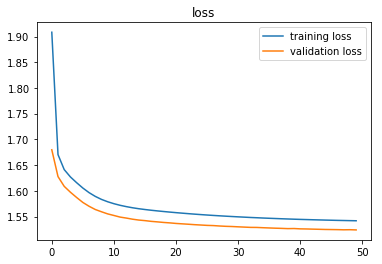

Plotting metrics...


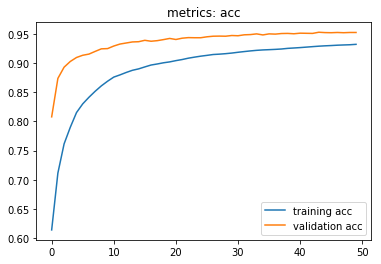

train {'acc': 0.9588182}
test {'acc': 0.9528}

Training student with temperature = 32 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12196239065521361341
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 15688000067658869368
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.287477 , acc = 0.23 
Epoch 1 , step 100 , loss= 1.8414013 , acc = 0.82 
Epoch 1 , step 200 , loss= 1.7389517 , acc = 0.86 
Epoch 1 , step 300 , loss= 1.6808673 , acc = 0.91 
Epoch 1 , step 400 , loss= 1.7063555 , acc = 0.85 
Epoch 1 , step 500 , loss= 1.6218886 , acc = 0.92 
Epoch 1 , step 549 , loss= 1.627619 val_loss= 1.6336935 , acc = 0.94 val acc = 0.9152 
Epoch 1 finished, loss= 1.7679552 
Epoch 2 , step 50 , loss= 1.6559592 , acc = 0.91 
Epoch 2 , step 150 ,

Epoch 20 , step 50 , loss= 1.3867109 , acc = 0.94 
Epoch 20 , step 150 , loss= 1.218667 , acc = 0.99 
Epoch 20 , step 250 , loss= 1.3859576 , acc = 0.98 
Epoch 20 , step 350 , loss= 1.3579801 , acc = 0.96 
Epoch 20 , step 450 , loss= 1.4142915 , acc = 0.93 
Epoch 20 , step 549 , loss= 1.2971537 val_loss= 1.341776 , acc = 0.96 val acc = 0.9544 
Epoch 20 finished, loss= 1.3259699 
Epoch 21 , step 0 , loss= 1.372486 , acc = 0.94 
Epoch 21 , step 100 , loss= 1.3064444 , acc = 0.93 
Epoch 21 , step 200 , loss= 1.3875005 , acc = 0.92 
Epoch 21 , step 300 , loss= 1.338926 , acc = 0.98 
Epoch 21 , step 400 , loss= 1.3116884 , acc = 0.96 
Epoch 21 , step 500 , loss= 1.4464586 , acc = 0.96 
Epoch 21 , step 549 , loss= 1.3805263 val_loss= 1.3373747 , acc = 0.94 val acc = 0.9542 
Epoch 21 finished, loss= 1.3208156 
Epoch 22 , step 50 , loss= 1.3065791 , acc = 0.99 
Epoch 22 , step 150 , loss= 1.2151982 , acc = 0.99 
Epoch 22 , step 250 , loss= 1.2486812 , acc = 0.97 
Epoch 22 , step 350 , loss= 1.

Epoch 40 , step 150 , loss= 1.2633283 , acc = 0.98 
Epoch 40 , step 250 , loss= 1.3129632 , acc = 0.96 
Epoch 40 , step 350 , loss= 1.2293409 , acc = 0.99 
Epoch 40 , step 450 , loss= 1.2597996 , acc = 0.97 
Epoch 40 , step 549 , loss= 1.1958873 val_loss= 1.3022269 , acc = 0.97 val acc = 0.9572 
Epoch 40 finished, loss= 1.2546449 
Epoch 41 , step 0 , loss= 1.3129371 , acc = 0.96 
Epoch 41 , step 100 , loss= 1.2584051 , acc = 1.0 
Epoch 41 , step 200 , loss= 1.2340195 , acc = 1.0 
Epoch 41 , step 300 , loss= 1.2181543 , acc = 0.97 
Epoch 41 , step 400 , loss= 1.2148737 , acc = 0.96 
Epoch 41 , step 500 , loss= 1.228946 , acc = 0.98 
Epoch 41 , step 549 , loss= 1.2345241 val_loss= 1.2989434 , acc = 0.97 val acc = 0.958 
Epoch 41 finished, loss= 1.253045 
Epoch 42 , step 50 , loss= 1.254762 , acc = 0.96 
Epoch 42 , step 150 , loss= 1.2956339 , acc = 0.99 
Epoch 42 , step 250 , loss= 1.2302984 , acc = 0.98 
Epoch 42 , step 350 , loss= 1.3539106 , acc = 0.96 
Epoch 42 , step 450 , loss= 1.3

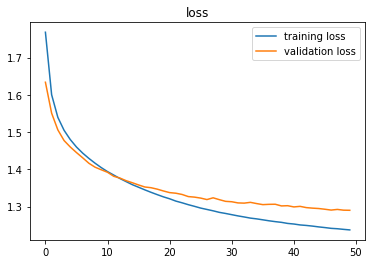

Plotting metrics...


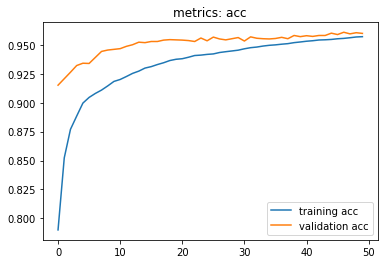

train {'acc': 0.97923636}
test {'acc': 0.9576}

Training student with temperature = 32 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 910561781780001600
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 17406255963847476332
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.28165 , acc = 0.12 
Epoch 1 , step 100 , loss= 1.4419452 , acc = 0.82 
Epoch 1 , step 200 , loss= 1.2557465 , acc = 0.93 
Epoch 1 , step 300 , loss= 1.1872346 , acc = 0.95 
Epoch 1 , step 400 , loss= 1.2552562 , acc = 0.88 
Epoch 1 , step 500 , loss= 1.2515602 , acc = 0.88 
Epoch 1 , step 549 , loss= 1.2107973 val_loss= 1.2121419 , acc = 0.89 val acc = 0.9162 
Epoch 1 finished, loss= 1.3693659 
Epoch 2 , step 50 , loss= 1.2205251 , acc = 0.91 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 1.1325766 , acc = 0.95 
Epoch 20 , step 150 , loss= 0.9330514 , acc = 0.96 
Epoch 20 , step 250 , loss= 1.1525701 , acc = 0.93 
Epoch 20 , step 350 , loss= 0.8766271 , acc = 0.99 
Epoch 20 , step 450 , loss= 1.0416489 , acc = 0.94 
Epoch 20 , step 549 , loss= 1.1479616 val_loss= 1.0012267 , acc = 0.93 val acc = 0.9588 
Epoch 20 finished, loss= 0.9555651 
Epoch 21 , step 0 , loss= 0.9842897 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.93923694 , acc = 0.94 
Epoch 21 , step 200 , loss= 0.84472126 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.8888934 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.88332295 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.9356256 , acc = 0.98 
Epoch 21 , step 549 , loss= 1.1483397 val_loss= 1.0020982 , acc = 0.96 val acc = 0.9596 
Epoch 21 finished, loss= 0.94937414 
Epoch 22 , step 50 , loss= 0.9327967 , acc = 0.97 
Epoch 22 , step 150 , loss= 0.99722606 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.86533695 , acc = 0.98 
Epoch 22 , step 350 

Epoch 40 , step 50 , loss= 0.87744784 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.86505115 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.7939927 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.80743045 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.84348875 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.85045075 val_loss= 0.9919038 , acc = 0.97 val acc = 0.9602 
Epoch 40 finished, loss= 0.87393713 
Epoch 41 , step 0 , loss= 0.85335577 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.8221618 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.9181908 , acc = 0.97 
Epoch 41 , step 300 , loss= 0.83970016 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.77790356 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.9795292 , acc = 0.95 
Epoch 41 , step 549 , loss= 0.84276 val_loss= 0.9878793 , acc = 0.99 val acc = 0.96 
Epoch 41 finished, loss= 0.87151456 
Epoch 42 , step 50 , loss= 0.82641035 , acc = 1.0 
Epoch 42 , step 150 , loss= 0.8719853 , acc = 0.97 
Epoch 42 , step 250 , loss= 1.0612254 , acc = 0.96 
Epoch 42 , step 350 , 

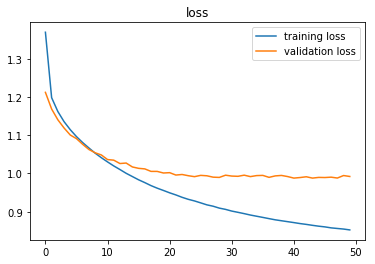

Plotting metrics...


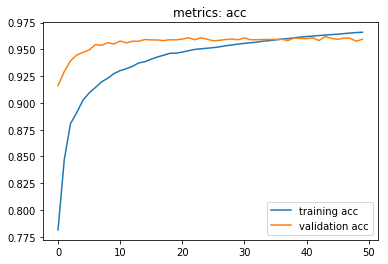

train {'acc': 0.9859273}
test {'acc': 0.9594}

Training student with temperature = 32 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1600411940922827039
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 2769025870150682686
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3473234 , acc = 0.06 
Epoch 1 , step 100 , loss= 1.0061516 , acc = 0.86 
Epoch 1 , step 200 , loss= 0.8151938 , acc = 0.91 
Epoch 1 , step 300 , loss= 0.8218069 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.7503061 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.8498583 , acc = 0.9 
Epoch 1 , step 549 , loss= 0.71880305 val_loss= 0.7465873 , acc = 0.94 val acc = 0.9212 
Epoch 1 finished, loss= 0.96445554 
Epoch 2 , step 50 , loss= 0.9800914 , acc = 0.93 
Epoch 2 , step 150 

Epoch 20 , step 50 , loss= 0.486849 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.538945 , acc = 0.96 
Epoch 20 , step 250 , loss= 0.52936596 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.52143407 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.48813733 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.5319295 val_loss= 0.58102727 , acc = 0.98 val acc = 0.965 
Epoch 20 finished, loss= 0.52464914 
Epoch 21 , step 0 , loss= 0.55398536 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.48609787 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.5228134 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.49611875 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.5048576 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.5265203 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.5173128 val_loss= 0.5835267 , acc = 0.98 val acc = 0.9644 
Epoch 21 finished, loss= 0.5196849 
Epoch 22 , step 50 , loss= 0.5030576 , acc = 0.99 
Epoch 22 , step 150 , loss= 0.5851911 , acc = 0.97 
Epoch 22 , step 250 , loss= 0.5003344 , acc = 0.98 
Epoch 22 , step 350 , l

Epoch 40 , step 50 , loss= 0.45484352 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.5100657 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.44790843 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.45355707 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.50405455 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.46314302 val_loss= 0.60610336 , acc = 0.99 val acc = 0.9642 
Epoch 40 finished, loss= 0.45688355 
Epoch 41 , step 0 , loss= 0.46261576 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.47047758 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.44258562 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.4732221 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.4287496 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.46188664 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.42529926 val_loss= 0.60657096 , acc = 1.0 val acc = 0.9648 
Epoch 41 finished, loss= 0.45471326 
Epoch 42 , step 50 , loss= 0.4460953 , acc = 1.0 
Epoch 42 , step 150 , loss= 0.44196483 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.437224 , acc = 1.0 
Epoch 42 , step 3

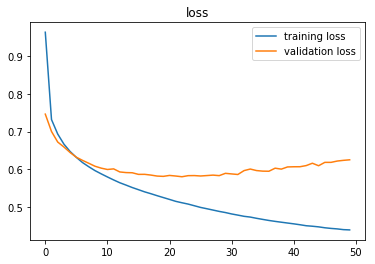

Plotting metrics...


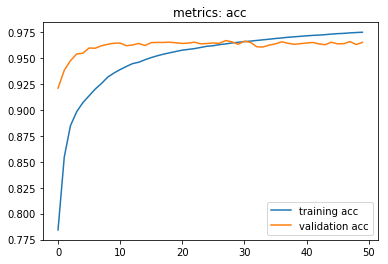

train {'acc': 0.9934}
test {'acc': 0.9666}

Training student with temperature = 32 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9853946355883576911
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 11469051877202501021
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3332655 , acc = 0.08 
Epoch 1 , step 100 , loss= 0.8173006 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.45922175 , acc = 0.83 
Epoch 1 , step 300 , loss= 0.37472945 , acc = 0.91 
Epoch 1 , step 400 , loss= 0.23157063 , acc = 0.92 
Epoch 1 , step 500 , loss= 0.40203166 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.19787957 val_loss= 0.28078082 , acc = 0.93 val acc = 0.9266 
Epoch 1 finished, loss= 0.5752254 
Epoch 2 , step 50 , loss= 0.33497146 , acc = 0.95 
Epoch 2 , step 15

Epoch 19 , step 500 , loss= 0.028857242 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.15859279 val_loss= 0.11310076 , acc = 0.96 val acc = 0.9668 
Epoch 19 finished, loss= 0.0665616 
Epoch 20 , step 50 , loss= 0.04657047 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.05499143 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.070455134 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.05053464 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.049714733 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.09712852 val_loss= 0.11008671 , acc = 0.96 val acc = 0.968 
Epoch 20 finished, loss= 0.06389408 
Epoch 21 , step 0 , loss= 0.034475647 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.062033106 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.031915057 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.09007906 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.068407185 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.02054792 , acc = 1.0 
Epoch 21 , step 549 , loss= 0.048343845 val_loss= 0.107553445 , acc = 0.98 val acc = 0.9668 
Epoch 21 finish

Epoch 39 , step 100 , loss= 0.022996416 , acc = 1.0 
Epoch 39 , step 200 , loss= 0.013233881 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.018620595 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.017605104 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.015780754 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.012705272 val_loss= 0.127249 , acc = 0.99 val acc = 0.9662 
Epoch 39 finished, loss= 0.030364757 
Epoch 40 , step 50 , loss= 0.024939748 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.020681687 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.081440985 , acc = 0.97 
Epoch 40 , step 350 , loss= 0.0070387255 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.007911766 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.015368691 val_loss= 0.12923835 , acc = 1.0 val acc = 0.9654 
Epoch 40 finished, loss= 0.029057242 
Epoch 41 , step 0 , loss= 0.015559923 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.02266947 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.027673965 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.01690235 , acc = 0.99 


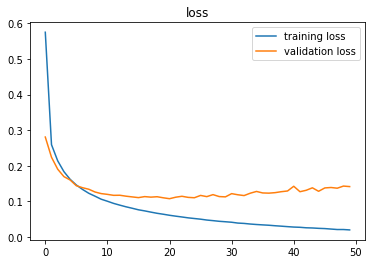

Plotting metrics...


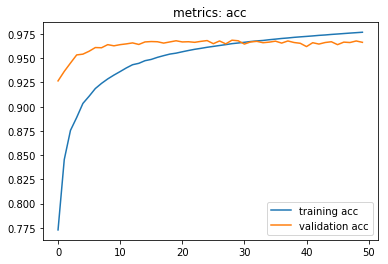

train {'acc': 0.9960909}
test {'acc': 0.9678}

Training student with temperature = 64 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7750657742513918123
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 18021715156525845129
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3027494 , acc = 0.1 
Epoch 1 , step 100 , loss= 2.2714148 , acc = 0.39 
Epoch 1 , step 200 , loss= 2.1867783 , acc = 0.48 
Epoch 1 , step 300 , loss= 2.1774845 , acc = 0.62 
Epoch 1 , step 400 , loss= 2.156508 , acc = 0.71 
Epoch 1 , step 500 , loss= 2.1063964 , acc = 0.73 
Epoch 1 , step 549 , loss= 2.0865593 val_loss= 2.1302333 , acc = 0.85 val acc = 0.7728 
Epoch 1 finished, loss= 2.1950884 
Epoch 2 , step 50 , loss= 2.1300817 , acc = 0.84 
Epoch 2 , step 150 , lo

Epoch 20 , step 150 , loss= 2.0636532 , acc = 0.94 
Epoch 20 , step 250 , loss= 2.07172 , acc = 0.95 
Epoch 20 , step 350 , loss= 2.1028137 , acc = 0.93 
Epoch 20 , step 450 , loss= 2.0740888 , acc = 0.9 
Epoch 20 , step 549 , loss= 2.1005163 val_loss= 2.081697 , acc = 0.96 val acc = 0.9388 
Epoch 20 finished, loss= 2.0892692 
Epoch 21 , step 0 , loss= 2.0880902 , acc = 0.97 
Epoch 21 , step 100 , loss= 2.0907137 , acc = 0.93 
Epoch 21 , step 200 , loss= 2.0606225 , acc = 0.92 
Epoch 21 , step 300 , loss= 2.0824037 , acc = 0.99 
Epoch 21 , step 400 , loss= 2.0754735 , acc = 0.98 
Epoch 21 , step 500 , loss= 2.067735 , acc = 0.9 
Epoch 21 , step 549 , loss= 2.0339253 val_loss= 2.081453 , acc = 0.94 val acc = 0.9384 
Epoch 21 finished, loss= 2.0890071 
Epoch 22 , step 50 , loss= 2.0681016 , acc = 0.93 
Epoch 22 , step 150 , loss= 2.1123018 , acc = 0.92 
Epoch 22 , step 250 , loss= 2.067048 , acc = 0.93 
Epoch 22 , step 350 , loss= 2.1044238 , acc = 0.92 
Epoch 22 , step 450 , loss= 2.112

Epoch 40 , step 250 , loss= 2.1127446 , acc = 0.9 
Epoch 40 , step 350 , loss= 2.0765314 , acc = 0.96 
Epoch 40 , step 450 , loss= 2.1362123 , acc = 0.96 
Epoch 40 , step 549 , loss= 2.0444686 val_loss= 2.079044 , acc = 0.97 val acc = 0.942 
Epoch 40 finished, loss= 2.0862558 
Epoch 41 , step 0 , loss= 2.0591874 , acc = 0.93 
Epoch 41 , step 100 , loss= 2.049467 , acc = 0.93 
Epoch 41 , step 200 , loss= 2.0831301 , acc = 0.95 
Epoch 41 , step 300 , loss= 2.1015885 , acc = 0.91 
Epoch 41 , step 400 , loss= 2.0840354 , acc = 0.95 
Epoch 41 , step 500 , loss= 2.0876129 , acc = 0.97 
Epoch 41 , step 549 , loss= 2.0551581 val_loss= 2.0789428 , acc = 0.91 val acc = 0.9426 
Epoch 41 finished, loss= 2.0861554 
Epoch 42 , step 50 , loss= 2.1037161 , acc = 0.92 
Epoch 42 , step 150 , loss= 2.053421 , acc = 0.93 
Epoch 42 , step 250 , loss= 2.0739317 , acc = 0.97 
Epoch 42 , step 350 , loss= 2.124998 , acc = 0.91 
Epoch 42 , step 450 , loss= 2.0979345 , acc = 0.94 
Epoch 42 , step 549 , loss= 2.0

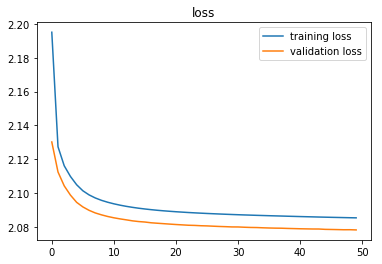

Plotting metrics...


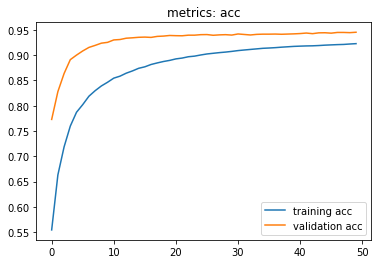

train {'acc': 0.9473636}
test {'acc': 0.944}

Training student with temperature = 64 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4391920299163500013
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 7744007614425660740
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2920694 , acc = 0.18 
Epoch 1 , step 100 , loss= 1.8632455 , acc = 0.86 
Epoch 1 , step 200 , loss= 1.789683 , acc = 0.93 
Epoch 1 , step 300 , loss= 1.7843647 , acc = 0.9 
Epoch 1 , step 400 , loss= 1.788117 , acc = 0.91 
Epoch 1 , step 500 , loss= 1.7672698 , acc = 0.91 
Epoch 1 , step 549 , loss= 1.7506608 val_loss= 1.7687144 , acc = 0.96 val acc = 0.921 
Epoch 1 finished, loss= 1.8464463 
Epoch 2 , step 50 , loss= 1.7396024 , acc = 0.98 
Epoch 2 , step 150 , loss

Epoch 20 , step 50 , loss= 1.7121859 , acc = 0.96 
Epoch 20 , step 150 , loss= 1.6621479 , acc = 0.96 
Epoch 20 , step 250 , loss= 1.62266 , acc = 0.98 
Epoch 20 , step 350 , loss= 1.6160727 , acc = 1.0 
Epoch 20 , step 450 , loss= 1.6416595 , acc = 0.98 
Epoch 20 , step 549 , loss= 1.7099423 val_loss= 1.6729503 , acc = 0.96 val acc = 0.963 
Epoch 20 finished, loss= 1.6510776 
Epoch 21 , step 0 , loss= 1.6669812 , acc = 0.97 
Epoch 21 , step 100 , loss= 1.6275811 , acc = 0.96 
Epoch 21 , step 200 , loss= 1.6127825 , acc = 0.99 
Epoch 21 , step 300 , loss= 1.6378201 , acc = 0.97 
Epoch 21 , step 400 , loss= 1.6657542 , acc = 0.96 
Epoch 21 , step 500 , loss= 1.6491724 , acc = 0.99 
Epoch 21 , step 549 , loss= 1.6850042 val_loss= 1.6708868 , acc = 0.93 val acc = 0.964 
Epoch 21 finished, loss= 1.6479541 
Epoch 22 , step 50 , loss= 1.6190175 , acc = 0.98 
Epoch 22 , step 150 , loss= 1.6001046 , acc = 0.98 
Epoch 22 , step 250 , loss= 1.6126858 , acc = 0.98 
Epoch 22 , step 350 , loss= 1.6

Epoch 40 , step 150 , loss= 1.6445208 , acc = 0.98 
Epoch 40 , step 250 , loss= 1.6075938 , acc = 0.99 
Epoch 40 , step 350 , loss= 1.6006294 , acc = 1.0 
Epoch 40 , step 450 , loss= 1.6015402 , acc = 0.99 
Epoch 40 , step 549 , loss= 1.6224682 val_loss= 1.6663319 , acc = 0.98 val acc = 0.9616 
Epoch 40 finished, loss= 1.6119926 
Epoch 41 , step 0 , loss= 1.5890115 , acc = 0.97 
Epoch 41 , step 100 , loss= 1.6305115 , acc = 0.98 
Epoch 41 , step 200 , loss= 1.6323507 , acc = 0.98 
Epoch 41 , step 300 , loss= 1.6076864 , acc = 0.98 
Epoch 41 , step 400 , loss= 1.6177032 , acc = 0.95 
Epoch 41 , step 500 , loss= 1.6152513 , acc = 0.99 
Epoch 41 , step 549 , loss= 1.6578759 val_loss= 1.6633512 , acc = 0.99 val acc = 0.9624 
Epoch 41 finished, loss= 1.6108444 
Epoch 42 , step 50 , loss= 1.5908751 , acc = 0.99 
Epoch 42 , step 150 , loss= 1.6484512 , acc = 0.98 
Epoch 42 , step 250 , loss= 1.6148857 , acc = 1.0 
Epoch 42 , step 350 , loss= 1.6319798 , acc = 0.98 
Epoch 42 , step 450 , loss=

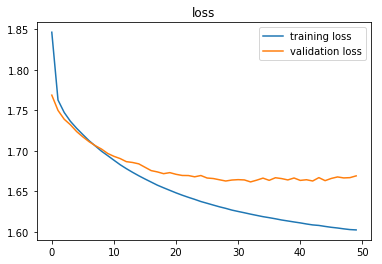

Plotting metrics...


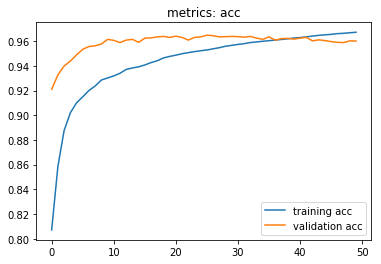

train {'acc': 0.98876363}
test {'acc': 0.9612}

Training student with temperature = 64 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7660370857861592998
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 15989932994231779779
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2530274 , acc = 0.19 
Epoch 1 , step 100 , loss= 1.482853 , acc = 0.84 
Epoch 1 , step 200 , loss= 1.4647082 , acc = 0.83 
Epoch 1 , step 300 , loss= 1.2676681 , acc = 0.93 
Epoch 1 , step 400 , loss= 1.3229523 , acc = 0.9 
Epoch 1 , step 500 , loss= 1.3058736 , acc = 0.9 
Epoch 1 , step 549 , loss= 1.2136457 val_loss= 1.2732342 , acc = 0.97 val acc = 0.9214 
Epoch 1 finished, loss= 1.4118397 
Epoch 2 , step 50 , loss= 1.2659212 , acc = 0.92 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 1.1308416 , acc = 0.99 
Epoch 20 , step 150 , loss= 1.1532083 , acc = 0.98 
Epoch 20 , step 250 , loss= 1.1149176 , acc = 1.0 
Epoch 20 , step 350 , loss= 1.1263539 , acc = 0.99 
Epoch 20 , step 450 , loss= 1.10327 , acc = 0.99 
Epoch 20 , step 549 , loss= 1.14923 val_loss= 1.1704696 , acc = 0.96 val acc = 0.967 
Epoch 20 finished, loss= 1.1362442 
Epoch 21 , step 0 , loss= 1.1128328 , acc = 1.0 
Epoch 21 , step 100 , loss= 1.1169385 , acc = 0.99 
Epoch 21 , step 200 , loss= 1.1455488 , acc = 0.96 
Epoch 21 , step 300 , loss= 1.1683174 , acc = 0.96 
Epoch 21 , step 400 , loss= 1.1191071 , acc = 0.99 
Epoch 21 , step 500 , loss= 1.1231432 , acc = 0.99 
Epoch 21 , step 549 , loss= 1.1036918 val_loss= 1.1714461 , acc = 1.0 val acc = 0.9666 
Epoch 21 finished, loss= 1.1333524 
Epoch 22 , step 50 , loss= 1.1154191 , acc = 0.99 
Epoch 22 , step 150 , loss= 1.1386654 , acc = 0.98 
Epoch 22 , step 250 , loss= 1.1128078 , acc = 0.98 
Epoch 22 , step 350 , loss= 1.1531

Epoch 40 , step 250 , loss= 1.1064719 , acc = 0.97 
Epoch 40 , step 350 , loss= 1.2129923 , acc = 0.96 
Epoch 40 , step 450 , loss= 1.0908334 , acc = 1.0 
Epoch 40 , step 549 , loss= 1.1197072 val_loss= 1.1871531 , acc = 0.98 val acc = 0.9636 
Epoch 40 finished, loss= 1.0951861 
Epoch 41 , step 0 , loss= 1.0781891 , acc = 1.0 
Epoch 41 , step 100 , loss= 1.0867386 , acc = 0.99 
Epoch 41 , step 200 , loss= 1.0840287 , acc = 0.99 
Epoch 41 , step 300 , loss= 1.0792814 , acc = 1.0 
Epoch 41 , step 400 , loss= 1.0724308 , acc = 1.0 
Epoch 41 , step 500 , loss= 1.0887002 , acc = 0.98 
Epoch 41 , step 549 , loss= 1.0974903 val_loss= 1.1853936 , acc = 0.99 val acc = 0.9652 
Epoch 41 finished, loss= 1.094621 
Epoch 42 , step 50 , loss= 1.0679651 , acc = 1.0 
Epoch 42 , step 150 , loss= 1.0632523 , acc = 1.0 
Epoch 42 , step 250 , loss= 1.0763432 , acc = 1.0 
Epoch 42 , step 350 , loss= 1.0771953 , acc = 1.0 
Epoch 42 , step 450 , loss= 1.0862981 , acc = 1.0 
Epoch 42 , step 549 , loss= 1.08349

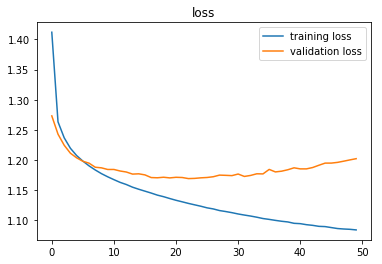

Plotting metrics...


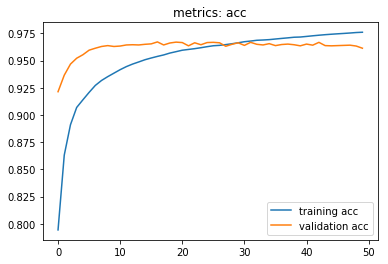

train {'acc': 0.9931273}
test {'acc': 0.9656}

Training student with temperature = 64 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15464848351567088352
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 9422207398711783409
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3369334 , acc = 0.07 
Epoch 1 , step 100 , loss= 1.1057596 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.8384867 , acc = 0.93 
Epoch 1 , step 300 , loss= 0.8415575 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.8696962 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.8274331 , acc = 0.91 
Epoch 1 , step 549 , loss= 0.75975704 val_loss= 0.7842527 , acc = 0.95 val acc = 0.9198 
Epoch 1 finished, loss= 0.99773705 
Epoch 2 , step 50 , loss= 0.6909592 , acc = 0.97 
Epoch 2 , step 150

Epoch 20 , step 50 , loss= 0.6028682 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.58594227 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.63552016 , acc = 0.96 
Epoch 20 , step 350 , loss= 0.6056884 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.63972646 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.5963013 val_loss= 0.64910144 , acc = 0.99 val acc = 0.9656 
Epoch 20 finished, loss= 0.608275 
Epoch 21 , step 0 , loss= 0.61742526 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.5674338 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.5824332 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.5669242 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.6144133 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.5693327 , acc = 1.0 
Epoch 21 , step 549 , loss= 0.63738555 val_loss= 0.6466524 , acc = 0.97 val acc = 0.9652 
Epoch 21 finished, loss= 0.6062546 
Epoch 22 , step 50 , loss= 0.6502464 , acc = 0.95 
Epoch 22 , step 150 , loss= 0.6105853 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.6250573 , acc = 0.98 
Epoch 22 , step 350 , lo

Epoch 40 , step 50 , loss= 0.5756569 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.56790864 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.56301177 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.5835546 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.56350076 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.55213964 val_loss= 0.6591459 , acc = 1.0 val acc = 0.9646 
Epoch 40 finished, loss= 0.57115966 
Epoch 41 , step 0 , loss= 0.5826254 , acc = 0.97 
Epoch 41 , step 100 , loss= 0.56655246 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.55433804 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.5826371 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.56647015 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.5580343 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.5677326 val_loss= 0.6573017 , acc = 1.0 val acc = 0.9664 
Epoch 41 finished, loss= 0.57018656 
Epoch 42 , step 50 , loss= 0.56151295 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.59351647 , acc = 0.98 
Epoch 42 , step 250 , loss= 0.57414144 , acc = 0.99 
Epoch 42 , step 350 

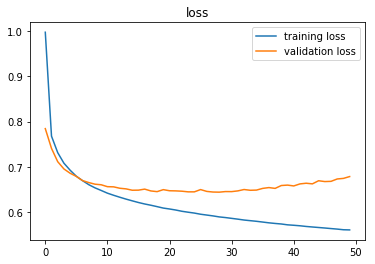

Plotting metrics...


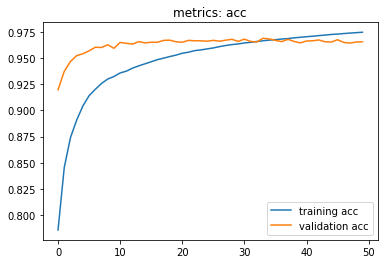

train {'acc': 0.99563634}
test {'acc': 0.9689}

Training student with temperature = 64 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6703541555500992527
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 3329866527167160512
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2937613 , acc = 0.13 
Epoch 1 , step 100 , loss= 0.53800935 , acc = 0.88 
Epoch 1 , step 200 , loss= 0.49145973 , acc = 0.85 
Epoch 1 , step 300 , loss= 0.33493903 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.28020486 , acc = 0.95 
Epoch 1 , step 500 , loss= 0.27480054 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.388705 val_loss= 0.2739081 , acc = 0.91 val acc = 0.9232 
Epoch 1 finished, loss= 0.5519238 
Epoch 2 , step 50 , loss= 0.43594494 , acc = 0.86 
Epoch 2 , step 1

Epoch 19 , step 500 , loss= 0.07710578 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.112884656 val_loss= 0.112327 , acc = 0.97 val acc = 0.9674 
Epoch 19 finished, loss= 0.06728276 
Epoch 20 , step 50 , loss= 0.0640373 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.02057876 , acc = 1.0 
Epoch 20 , step 250 , loss= 0.026486421 , acc = 1.0 
Epoch 20 , step 350 , loss= 0.055864006 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.051306672 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.059331626 val_loss= 0.11294646 , acc = 0.99 val acc = 0.967 
Epoch 20 finished, loss= 0.064256385 
Epoch 21 , step 0 , loss= 0.04358373 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.04330598 , acc = 0.98 
Epoch 21 , step 200 , loss= 0.1036656 , acc = 0.97 
Epoch 21 , step 300 , loss= 0.03243138 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.12003337 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.03420534 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.03565292 val_loss= 0.11163934 , acc = 0.99 val acc = 0.9684 
Epoch 21 finished, los

Epoch 39 , step 200 , loss= 0.050763153 , acc = 0.98 
Epoch 39 , step 300 , loss= 0.022086784 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.014787916 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.0101815425 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.064361885 val_loss= 0.13239351 , acc = 0.97 val acc = 0.966 
Epoch 39 finished, loss= 0.029096467 
Epoch 40 , step 50 , loss= 0.05966655 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.016287064 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.019406365 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.017401436 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.0259902 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.006640154 val_loss= 0.1360761 , acc = 1.0 val acc = 0.964 
Epoch 40 finished, loss= 0.028142005 
Epoch 41 , step 0 , loss= 0.1285401 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.048113395 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.0134288585 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.008765839 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.14684379 , acc = 0.99 

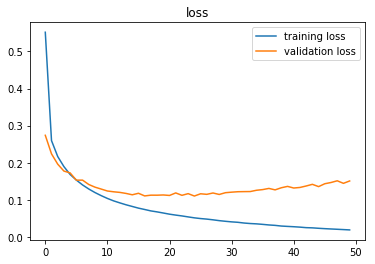

Plotting metrics...


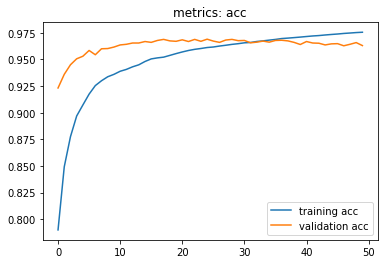

train {'acc': 0.9940182}
test {'acc': 0.963}



In [13]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
list_exp = []

temperatures = [2,4,8,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = 1 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100)
        # show result
        print('Student performance with temperature =',temperature,
             ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        print('train',train_metric)
        print('test',test_metric)
        print()
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        list_exp.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp = pd.DataFrame(list_exp)

In [14]:
print(test_metrics)
print(df_exp)
print(df_exp['test_acc'].mean())

{2: [{'acc': 0.9636}, {'acc': 0.9639}, {'acc': 0.9653}, {'acc': 0.9659}, {'acc': 0.9661}], 4: [{'acc': 0.9687}, {'acc': 0.9661}, {'acc': 0.9651}, {'acc': 0.9643}, {'acc': 0.9644}], 8: [{'acc': 0.9677}, {'acc': 0.9654}, {'acc': 0.9615}, {'acc': 0.9641}, {'acc': 0.9651}], 16: [{'acc': 0.9616}, {'acc': 0.9652}, {'acc': 0.9621}, {'acc': 0.963}, {'acc': 0.9642}], 32: [{'acc': 0.9528}, {'acc': 0.9576}, {'acc': 0.9594}, {'acc': 0.9666}, {'acc': 0.9678}], 64: [{'acc': 0.944}, {'acc': 0.9612}, {'acc': 0.9656}, {'acc': 0.9689}, {'acc': 0.963}]}
    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   1    0.9636   
1            0.25           0.75            2                   1    0.9639   
2            0.50           0.50            2                   1    0.9653   
3            0.75           0.25            2                   1    0.9659   
4            1.00           0.00            2                   

Training student with temperature = 2 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11835077402909882930
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 11437217503343794202
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 9.155292 , acc = 0.09 
Epoch 1 , step 100 , loss= 3.6212542 , acc = 0.8 
Epoch 1 , step 200 , loss= 1.9286089 , acc = 0.89 
Epoch 1 , step 300 , loss= 2.0456846 , acc = 0.83 
Epoch 1 , step 400 , loss= 1.9277977 , acc = 0.85 
Epoch 1 , step 500 , loss= 1.3556865 , acc = 0.91 
Epoch 1 , step 549 , loss= 1.4274232 val_loss= 1.2232622 , acc = 0.93 val acc = 0.9154 
Epoch 1 finished, loss= 2.6889076 
Epoch 2 , step 50 , loss= 1.82018 , acc = 0.87 
Epoch 2 , step 150 , loss= 1.4089073 , acc = 0.9 
Epoch 2 , step 250 , l

Epoch 20 , step 50 , loss= 0.3122473 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.2658995 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.17128153 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.15814894 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.15054409 , acc = 0.98 
Epoch 20 , step 549 , loss= 0.26157376 val_loss= 0.4284717 , acc = 0.99 val acc = 0.9638 
Epoch 20 finished, loss= 0.3233586 
Epoch 21 , step 0 , loss= 0.3941631 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.20115314 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.2199942 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.39220726 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.19770536 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.3517981 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.3890158 val_loss= 0.42738232 , acc = 0.97 val acc = 0.9638 
Epoch 21 finished, loss= 0.31148514 
Epoch 22 , step 50 , loss= 0.09396247 , acc = 1.0 
Epoch 22 , step 150 , loss= 0.15198328 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.24108694 , acc = 1.0 
Epoch 22 , step 

Epoch 40 , step 50 , loss= 0.29114714 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.22624826 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.091825575 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.33208674 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.13619466 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.071647055 val_loss= 0.43396533 , acc = 1.0 val acc = 0.9656 
Epoch 40 finished, loss= 0.17666858 
Epoch 41 , step 0 , loss= 0.07086566 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.102029696 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.10712191 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.10654081 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.2183784 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.101046965 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.33785653 val_loss= 0.44171876 , acc = 0.99 val acc = 0.9644 
Epoch 41 finished, loss= 0.17115031 
Epoch 42 , step 50 , loss= 0.11578098 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.20045705 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.38276827 , acc = 0.95 
Epoch 42

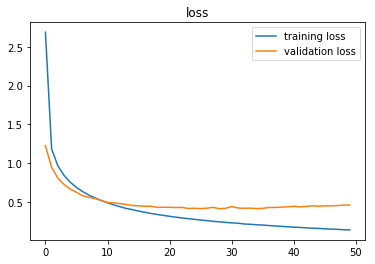

Plotting metrics...


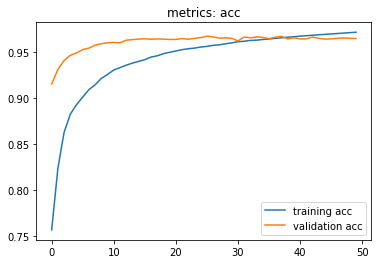

train {'acc': 0.9923273}
test {'acc': 0.9665}

Training student with temperature = 2 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4696261046418139154
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 15347730110158843754
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 7.3149643 , acc = 0.11 
Epoch 1 , step 100 , loss= 3.0931587 , acc = 0.82 
Epoch 1 , step 200 , loss= 2.210681 , acc = 0.79 
Epoch 1 , step 300 , loss= 1.8983682 , acc = 0.79 
Epoch 1 , step 400 , loss= 1.0148267 , acc = 0.9 
Epoch 1 , step 500 , loss= 1.1453934 , acc = 0.88 
Epoch 1 , step 549 , loss= 0.82330394 val_loss= 1.0239815 , acc = 0.93 val acc = 0.9132 
Epoch 1 finished, loss= 2.2042944 
Epoch 2 , step 50 , loss= 0.729146 , acc = 0.96 
Epoch 2 , step 150 , l

Epoch 20 , step 50 , loss= 0.12160219 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.11279725 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.24287799 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.13919975 , acc = 1.0 
Epoch 20 , step 450 , loss= 0.1730034 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.14165826 val_loss= 0.3704449 , acc = 0.99 val acc = 0.9678 
Epoch 20 finished, loss= 0.26002368 
Epoch 21 , step 0 , loss= 0.16429648 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.2994404 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.27819267 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.57786167 , acc = 0.95 
Epoch 21 , step 400 , loss= 0.22608542 , acc = 0.97 
Epoch 21 , step 500 , loss= 0.29937962 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.2283956 val_loss= 0.35595667 , acc = 0.96 val acc = 0.9678 
Epoch 21 finished, loss= 0.24882069 
Epoch 22 , step 50 , loss= 0.25387523 , acc = 0.97 
Epoch 22 , step 150 , loss= 0.2317354 , acc = 0.98 
Epoch 22 , step 250 , loss= 0.22255611 , acc = 0.98 
Epoch 22 , st

Epoch 40 , step 50 , loss= 0.03833754 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.17344621 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.18771872 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.35289416 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.0682972 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.15010335 val_loss= 0.37821746 , acc = 0.99 val acc = 0.9654 
Epoch 40 finished, loss= 0.12999512 
Epoch 41 , step 0 , loss= 0.07652914 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.061007254 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.089901656 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.044298172 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.09219335 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.106210254 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.10476188 val_loss= 0.383606 , acc = 0.99 val acc = 0.9648 
Epoch 41 finished, loss= 0.12642877 
Epoch 42 , step 50 , loss= 0.09371714 , acc = 1.0 
Epoch 42 , step 150 , loss= 0.12105203 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.31394058 , acc = 0.97 
Epoch 42 

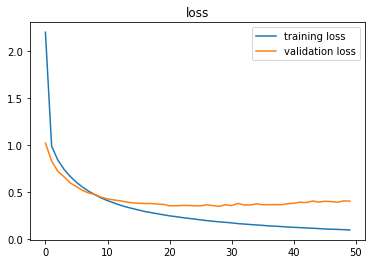

Plotting metrics...


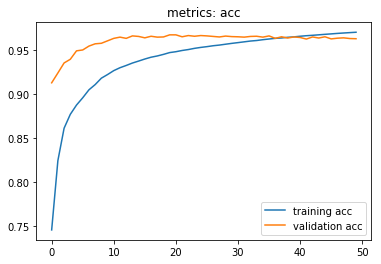

train {'acc': 0.9941273}
test {'acc': 0.9673}

Training student with temperature = 2 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3635518327647739134
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 13137522238700123146
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 5.7351627 , acc = 0.05 
Epoch 1 , step 100 , loss= 2.0666022 , acc = 0.85 
Epoch 1 , step 200 , loss= 1.9084138 , acc = 0.82 
Epoch 1 , step 300 , loss= 1.2293495 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.84061325 , acc = 0.9 
Epoch 1 , step 500 , loss= 1.1805266 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.9834813 val_loss= 0.80823374 , acc = 0.89 val acc = 0.9124 
Epoch 1 finished, loss= 1.6678467 
Epoch 2 , step 50 , loss= 0.60865736 , acc = 0.94 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 0.15207689 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.07710515 , acc = 1.0 
Epoch 20 , step 250 , loss= 0.23618497 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.17193583 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.18695033 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.22046208 val_loss= 0.32045466 , acc = 0.98 val acc = 0.9628 
Epoch 20 finished, loss= 0.21725729 
Epoch 21 , step 0 , loss= 0.14550103 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.25609493 , acc = 0.96 
Epoch 21 , step 200 , loss= 0.5647482 , acc = 0.93 
Epoch 21 , step 300 , loss= 0.10886602 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.18325472 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.4473881 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.30046976 val_loss= 0.32673353 , acc = 0.97 val acc = 0.9628 
Epoch 21 finished, loss= 0.208655 
Epoch 22 , step 50 , loss= 0.20807953 , acc = 0.99 
Epoch 22 , step 150 , loss= 0.26790702 , acc = 0.97 
Epoch 22 , step 250 , loss= 0.07544388 , acc = 1.0 
Epoch 22 , s

Epoch 40 , step 50 , loss= 0.060332958 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.04444718 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.062535316 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.03283318 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.24864587 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.09149957 val_loss= 0.33685592 , acc = 0.99 val acc = 0.9638 
Epoch 40 finished, loss= 0.11393334 
Epoch 41 , step 0 , loss= 0.12825312 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.15375647 , acc = 0.98 
Epoch 41 , step 200 , loss= 0.20810273 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.05731427 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.09872185 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.16592248 , acc = 0.99 
Epoch 41 , step 549 , loss= 0.050344322 val_loss= 0.33931944 , acc = 1.0 val acc = 0.9634 
Epoch 41 finished, loss= 0.10965543 
Epoch 42 , step 50 , loss= 0.06931902 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.061080188 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.22733448 , acc = 0.96 
Epoch 42

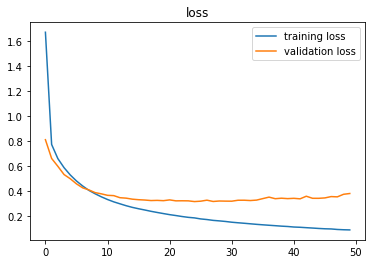

Plotting metrics...


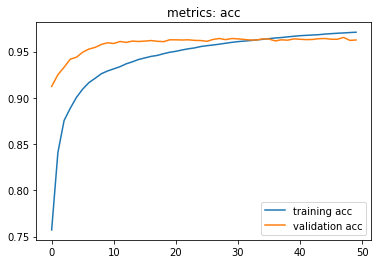

train {'acc': 0.9911636}
test {'acc': 0.9655}

Training student with temperature = 2 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 335131451401943058
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 14703268509483356258
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4.0110955 , acc = 0.17 
Epoch 1 , step 100 , loss= 1.3108367 , acc = 0.89 
Epoch 1 , step 200 , loss= 0.6870967 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.99125123 , acc = 0.84 
Epoch 1 , step 400 , loss= 0.52229905 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.40523657 , acc = 0.95 
Epoch 1 , step 549 , loss= 0.88800746 val_loss= 0.57037085 , acc = 0.84 val acc = 0.9134 
Epoch 1 finished, loss= 1.1254128 
Epoch 2 , step 50 , loss= 0.82392573 , acc = 0.87 
Epoch 2 , step 1

Epoch 19 , step 549 , loss= 0.045089185 val_loss= 0.2145427 , acc = 1.0 val acc = 0.9656 
Epoch 19 finished, loss= 0.14105296 
Epoch 20 , step 50 , loss= 0.25798172 , acc = 0.97 
Epoch 20 , step 150 , loss= 0.07268504 , acc = 1.0 
Epoch 20 , step 250 , loss= 0.15281153 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.08625495 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.07492839 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.056479298 val_loss= 0.22593379 , acc = 0.99 val acc = 0.9642 
Epoch 20 finished, loss= 0.13418615 
Epoch 21 , step 0 , loss= 0.30765438 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.07536248 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.17088068 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.05293998 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.10875333 , acc = 0.98 
Epoch 21 , step 500 , loss= 0.16900021 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.06486307 val_loss= 0.21350852 , acc = 0.99 val acc = 0.966 
Epoch 21 finished, loss= 0.1290395 
Epoch 22 , step 50 , loss= 0.09571609 , a

Epoch 39 , step 400 , loss= 0.040248245 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.03519768 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.07434084 val_loss= 0.22665566 , acc = 0.99 val acc = 0.9668 
Epoch 39 finished, loss= 0.06620808 
Epoch 40 , step 50 , loss= 0.044067264 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.154471 , acc = 0.97 
Epoch 40 , step 250 , loss= 0.025369927 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.06227563 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.24590282 , acc = 0.97 
Epoch 40 , step 549 , loss= 0.04181821 val_loss= 0.22718957 , acc = 1.0 val acc = 0.9664 
Epoch 40 finished, loss= 0.06444532 
Epoch 41 , step 0 , loss= 0.053825773 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.044036485 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.12201255 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.069092624 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.048033092 , acc = 1.0 
Epoch 41 , step 500 , loss= 0.10739257 , acc = 0.98 
Epoch 41 , step 549 , loss= 0.03540886 val_loss= 0.22929382

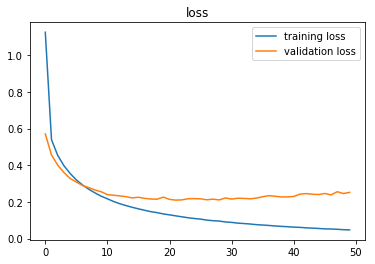

Plotting metrics...


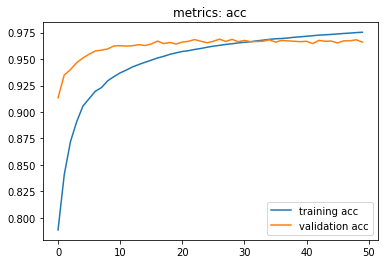

train {'acc': 0.99529094}
test {'acc': 0.9664}

Training student with temperature = 2 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16096925934933171472
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 6926133356489641152
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.289749 , acc = 0.16 
Epoch 1 , step 100 , loss= 0.6969367 , acc = 0.83 
Epoch 1 , step 200 , loss= 0.39207524 , acc = 0.9 
Epoch 1 , step 300 , loss= 0.5657359 , acc = 0.84 
Epoch 1 , step 400 , loss= 0.21316455 , acc = 0.94 
Epoch 1 , step 500 , loss= 0.29710174 , acc = 0.92 
Epoch 1 , step 549 , loss= 0.34052438 val_loss= 0.2816766 , acc = 0.89 val acc = 0.9202 
Epoch 1 finished, loss= 0.5527044 
Epoch 2 , step 50 , loss= 0.28953794 , acc = 0.91 
Epoch 2 , step 150

Epoch 19 , step 500 , loss= 0.1217451 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.057020295 val_loss= 0.095837675 , acc = 0.98 val acc = 0.97 
Epoch 19 finished, loss= 0.058899634 
Epoch 20 , step 50 , loss= 0.04534183 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.04306601 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.04085887 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.030277839 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.02842082 , acc = 1.0 
Epoch 20 , step 549 , loss= 0.07492989 val_loss= 0.096843556 , acc = 0.98 val acc = 0.9704 
Epoch 20 finished, loss= 0.05626409 
Epoch 21 , step 0 , loss= 0.04413415 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.07543169 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.049901377 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.061293308 , acc = 0.97 
Epoch 21 , step 400 , loss= 0.0077261846 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.028658357 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.12259341 val_loss= 0.09550866 , acc = 0.96 val acc = 0.9704 
Epoch 21 finish

Epoch 39 , step 100 , loss= 0.015400069 , acc = 1.0 
Epoch 39 , step 200 , loss= 0.021228597 , acc = 0.99 
Epoch 39 , step 300 , loss= 0.0148688685 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.024177086 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.0072493004 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.018915744 val_loss= 0.111953005 , acc = 0.99 val acc = 0.9692 
Epoch 39 finished, loss= 0.02374605 
Epoch 40 , step 50 , loss= 0.013336921 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.019496739 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.0077901697 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.061987974 , acc = 0.97 
Epoch 40 , step 450 , loss= 0.010399281 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.04005359 val_loss= 0.113631986 , acc = 0.99 val acc = 0.9682 
Epoch 40 finished, loss= 0.022930063 
Epoch 41 , step 0 , loss= 0.009502215 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.025521077 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.047095012 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.012809549 , acc

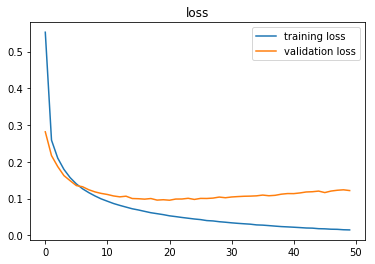

Plotting metrics...


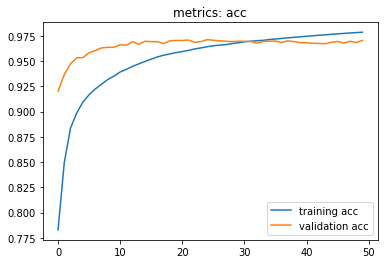

train {'acc': 0.9974909}
test {'acc': 0.9685}

Training student with temperature = 4 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3714222002948147288
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 9283523747581193591
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 36.69819 , acc = 0.1 
Epoch 1 , step 100 , loss= 19.840862 , acc = 0.76 
Epoch 1 , step 200 , loss= 9.479223 , acc = 0.86 
Epoch 1 , step 300 , loss= 10.378662 , acc = 0.81 
Epoch 1 , step 400 , loss= 5.4066224 , acc = 0.92 
Epoch 1 , step 500 , loss= 6.5864606 , acc = 0.87 
Epoch 1 , step 549 , loss= 4.6927333 val_loss= 5.7904897 , acc = 0.91 val acc = 0.904 
Epoch 1 finished, loss= 12.88201 
Epoch 2 , step 50 , loss= 6.501116 , acc = 0.87 
Epoch 2 , step 150 , loss= 4

Epoch 20 , step 150 , loss= 2.2316728 , acc = 0.94 
Epoch 20 , step 250 , loss= 2.3268287 , acc = 0.96 
Epoch 20 , step 350 , loss= 1.3907503 , acc = 0.99 
Epoch 20 , step 450 , loss= 1.467791 , acc = 0.98 
Epoch 20 , step 549 , loss= 1.6245738 val_loss= 2.09314 , acc = 0.99 val acc = 0.9634 
Epoch 20 finished, loss= 1.879666 
Epoch 21 , step 0 , loss= 1.7658353 , acc = 0.97 
Epoch 21 , step 100 , loss= 1.8102813 , acc = 0.95 
Epoch 21 , step 200 , loss= 2.281231 , acc = 0.98 
Epoch 21 , step 300 , loss= 2.7335114 , acc = 0.93 
Epoch 21 , step 400 , loss= 2.5249703 , acc = 0.96 
Epoch 21 , step 500 , loss= 1.5635059 , acc = 0.97 
Epoch 21 , step 549 , loss= 1.1099194 val_loss= 2.0675151 , acc = 0.99 val acc = 0.9646 
Epoch 21 finished, loss= 1.8172188 
Epoch 22 , step 50 , loss= 1.008644 , acc = 1.0 
Epoch 22 , step 150 , loss= 2.4564843 , acc = 0.97 
Epoch 22 , step 250 , loss= 0.830625 , acc = 0.98 
Epoch 22 , step 350 , loss= 2.6157224 , acc = 0.95 
Epoch 22 , step 450 , loss= 2.305

Epoch 40 , step 250 , loss= 0.7066777 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.69840926 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.91697633 , acc = 1.0 
Epoch 40 , step 549 , loss= 1.0265678 val_loss= 1.8220102 , acc = 0.98 val acc = 0.9694 
Epoch 40 finished, loss= 1.1775539 
Epoch 41 , step 0 , loss= 0.73820466 , acc = 0.99 
Epoch 41 , step 100 , loss= 1.1331201 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.59318703 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.5753115 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.80141455 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.78657365 , acc = 0.99 
Epoch 41 , step 549 , loss= 1.0052025 val_loss= 1.8301723 , acc = 0.99 val acc = 0.9692 
Epoch 41 finished, loss= 1.1573515 
Epoch 42 , step 50 , loss= 0.44784796 , acc = 1.0 
Epoch 42 , step 150 , loss= 0.92968106 , acc = 0.99 
Epoch 42 , step 250 , loss= 2.5754797 , acc = 0.97 
Epoch 42 , step 350 , loss= 1.584449 , acc = 0.96 
Epoch 42 , step 450 , loss= 0.8883393 , acc = 1.0 
Epoch 42 , step 549 , lo

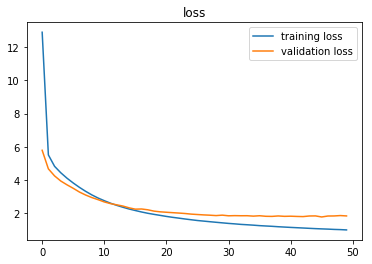

Plotting metrics...


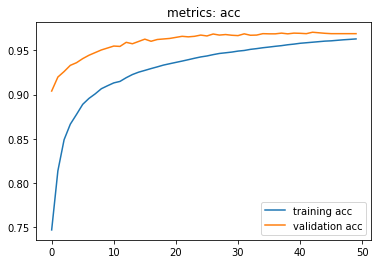

train {'acc': 0.9886182}
test {'acc': 0.9665}

Training student with temperature = 4 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3517442122843761140
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 16691229761437817695
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 28.226131 , acc = 0.11 
Epoch 1 , step 100 , loss= 16.9505 , acc = 0.7 
Epoch 1 , step 200 , loss= 7.648674 , acc = 0.88 
Epoch 1 , step 300 , loss= 4.953116 , acc = 0.95 
Epoch 1 , step 400 , loss= 5.8436365 , acc = 0.88 
Epoch 1 , step 500 , loss= 5.3275523 , acc = 0.89 
Epoch 1 , step 549 , loss= 4.3210196 val_loss= 4.4411087 , acc = 0.93 val acc = 0.9058 
Epoch 1 finished, loss= 10.108668 
Epoch 2 , step 50 , loss= 4.73319 , acc = 0.89 
Epoch 2 , step 150 , loss=

Epoch 20 , step 50 , loss= 1.7276341 , acc = 0.95 
Epoch 20 , step 150 , loss= 1.3029302 , acc = 0.98 
Epoch 20 , step 250 , loss= 1.4539415 , acc = 0.95 
Epoch 20 , step 350 , loss= 0.8637609 , acc = 0.98 
Epoch 20 , step 450 , loss= 1.0120888 , acc = 0.98 
Epoch 20 , step 549 , loss= 1.1193208 val_loss= 1.5473659 , acc = 0.99 val acc = 0.9672 
Epoch 20 finished, loss= 1.3894136 
Epoch 21 , step 0 , loss= 2.2587802 , acc = 0.95 
Epoch 21 , step 100 , loss= 1.1015482 , acc = 0.96 
Epoch 21 , step 200 , loss= 1.2828022 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.85113364 , acc = 0.98 
Epoch 21 , step 400 , loss= 1.5807374 , acc = 0.95 
Epoch 21 , step 500 , loss= 1.7567103 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.9643867 val_loss= 1.518747 , acc = 0.98 val acc = 0.9674 
Epoch 21 finished, loss= 1.3391271 
Epoch 22 , step 50 , loss= 0.9372691 , acc = 0.99 
Epoch 22 , step 150 , loss= 0.5944296 , acc = 0.99 
Epoch 22 , step 250 , loss= 1.3870989 , acc = 0.95 
Epoch 22 , step 350 , loss

Epoch 40 , step 150 , loss= 0.5203593 , acc = 0.99 
Epoch 40 , step 250 , loss= 1.0652155 , acc = 0.96 
Epoch 40 , step 350 , loss= 0.4345542 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.24604875 , acc = 1.0 
Epoch 40 , step 549 , loss= 1.5542587 val_loss= 1.4545653 , acc = 0.95 val acc = 0.9686 
Epoch 40 finished, loss= 0.88459516 
Epoch 41 , step 0 , loss= 0.77927095 , acc = 0.98 
Epoch 41 , step 100 , loss= 1.0316693 , acc = 0.99 
Epoch 41 , step 200 , loss= 0.4264216 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.43621328 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.3627815 , acc = 1.0 
Epoch 41 , step 500 , loss= 2.1520755 , acc = 0.96 
Epoch 41 , step 549 , loss= 1.2155684 val_loss= 1.458977 , acc = 0.99 val acc = 0.9686 
Epoch 41 finished, loss= 0.86928284 
Epoch 42 , step 50 , loss= 0.74849784 , acc = 1.0 
Epoch 42 , step 150 , loss= 0.7474753 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.52317965 , acc = 0.99 
Epoch 42 , step 350 , loss= 0.7548463 , acc = 0.98 
Epoch 42 , step 450 , lo

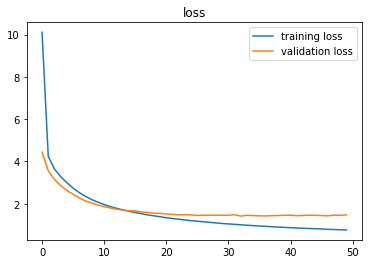

Plotting metrics...


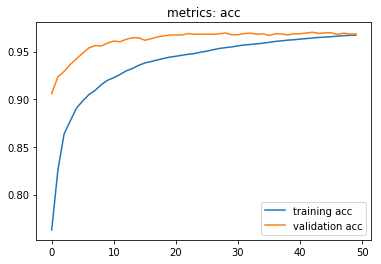

train {'acc': 0.9895818}
test {'acc': 0.9688}

Training student with temperature = 4 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6140322711928055922
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 14241871365493933371
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 19.447546 , acc = 0.14 
Epoch 1 , step 100 , loss= 11.080232 , acc = 0.81 
Epoch 1 , step 200 , loss= 6.0782533 , acc = 0.88 
Epoch 1 , step 300 , loss= 3.9860547 , acc = 0.91 
Epoch 1 , step 400 , loss= 3.902011 , acc = 0.89 
Epoch 1 , step 500 , loss= 3.7623873 , acc = 0.9 
Epoch 1 , step 549 , loss= 2.4694939 val_loss= 3.123812 , acc = 0.91 val acc = 0.909 
Epoch 1 finished, loss= 7.0230293 
Epoch 2 , step 50 , loss= 3.0591924 , acc = 0.92 
Epoch 2 , step 150 , loss

Epoch 20 , step 50 , loss= 0.5800373 , acc = 0.99 
Epoch 20 , step 150 , loss= 1.0433036 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.70757127 , acc = 0.97 
Epoch 20 , step 350 , loss= 1.319424 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.7751756 , acc = 0.99 
Epoch 20 , step 549 , loss= 1.3885785 val_loss= 1.1988199 , acc = 0.95 val acc = 0.9646 
Epoch 20 finished, loss= 1.0287043 
Epoch 21 , step 0 , loss= 1.4412148 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.74110603 , acc = 0.98 
Epoch 21 , step 200 , loss= 1.9372395 , acc = 0.95 
Epoch 21 , step 300 , loss= 0.6492761 , acc = 0.99 
Epoch 21 , step 400 , loss= 1.1043396 , acc = 0.96 
Epoch 21 , step 500 , loss= 0.5484202 , acc = 0.99 
Epoch 21 , step 549 , loss= 1.1638016 val_loss= 1.1930158 , acc = 0.99 val acc = 0.9652 
Epoch 21 finished, loss= 0.99498445 
Epoch 22 , step 50 , loss= 1.2274177 , acc = 0.97 
Epoch 22 , step 150 , loss= 1.6732566 , acc = 0.94 
Epoch 22 , step 250 , loss= 0.65381444 , acc = 0.97 
Epoch 22 , step 350 , l

Epoch 40 , step 50 , loss= 0.61440563 , acc = 0.98 
Epoch 40 , step 150 , loss= 0.6287448 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.30060664 , acc = 1.0 
Epoch 40 , step 350 , loss= 0.5167498 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.47543117 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.55480146 val_loss= 1.1101944 , acc = 0.98 val acc = 0.9668 
Epoch 40 finished, loss= 0.6454703 
Epoch 41 , step 0 , loss= 0.41356423 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.40230614 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.48052427 , acc = 1.0 
Epoch 41 , step 300 , loss= 1.1114304 , acc = 0.98 
Epoch 41 , step 400 , loss= 0.70070285 , acc = 0.98 
Epoch 41 , step 500 , loss= 0.36773744 , acc = 1.0 
Epoch 41 , step 549 , loss= 0.6009409 val_loss= 1.0834982 , acc = 0.98 val acc = 0.9674 
Epoch 41 finished, loss= 0.6326267 
Epoch 42 , step 50 , loss= 0.3044788 , acc = 1.0 
Epoch 42 , step 150 , loss= 1.209609 , acc = 0.96 
Epoch 42 , step 250 , loss= 0.68122005 , acc = 0.99 
Epoch 42 , step 350 , lo

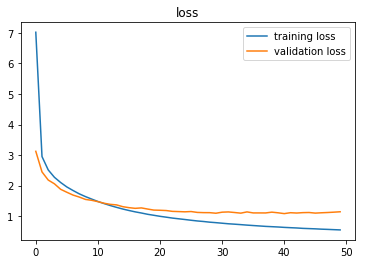

Plotting metrics...


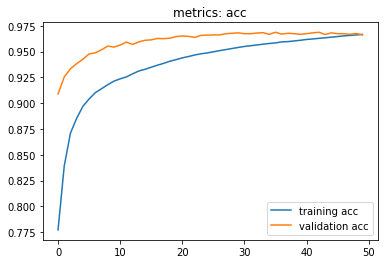

train {'acc': 0.98947275}
test {'acc': 0.9641}

Training student with temperature = 4 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 518961838364595611
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 2080074306503380198
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 10.853239 , acc = 0.11 
Epoch 1 , step 100 , loss= 5.763237 , acc = 0.73 
Epoch 1 , step 200 , loss= 3.2964153 , acc = 0.84 
Epoch 1 , step 300 , loss= 3.0974646 , acc = 0.86 
Epoch 1 , step 400 , loss= 2.1664424 , acc = 0.94 
Epoch 1 , step 500 , loss= 2.4484587 , acc = 0.86 
Epoch 1 , step 549 , loss= 1.9790823 val_loss= 1.9317515 , acc = 0.89 val acc = 0.9086 
Epoch 1 finished, loss= 3.9463298 
Epoch 2 , step 50 , loss= 1.9582006 , acc = 0.89 
Epoch 2 , step 150 , 

Epoch 20 , step 50 , loss= 1.3369012 , acc = 0.93 
Epoch 20 , step 150 , loss= 0.5642287 , acc = 0.97 
Epoch 20 , step 250 , loss= 0.42445406 , acc = 0.98 
Epoch 20 , step 350 , loss= 0.2374011 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.38104346 , acc = 0.98 
Epoch 20 , step 549 , loss= 1.0315188 val_loss= 0.7185085 , acc = 0.93 val acc = 0.9632 
Epoch 20 finished, loss= 0.5750724 
Epoch 21 , step 0 , loss= 0.5383381 , acc = 0.96 
Epoch 21 , step 100 , loss= 0.41567585 , acc = 0.97 
Epoch 21 , step 200 , loss= 0.9236125 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.4817907 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.30418575 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.41323283 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.3701589 val_loss= 0.70340717 , acc = 0.98 val acc = 0.9654 
Epoch 21 finished, loss= 0.5584838 
Epoch 22 , step 50 , loss= 0.39875367 , acc = 1.0 
Epoch 22 , step 150 , loss= 0.69816285 , acc = 0.96 
Epoch 22 , step 250 , loss= 0.62843126 , acc = 0.96 
Epoch 22 , step 35

Epoch 40 , step 50 , loss= 0.18928887 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.47125426 , acc = 0.98 
Epoch 40 , step 250 , loss= 0.24053547 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.3062103 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.23241937 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.27476668 val_loss= 0.66901803 , acc = 1.0 val acc = 0.9658 
Epoch 40 finished, loss= 0.35020548 
Epoch 41 , step 0 , loss= 0.1909586 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.21886711 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.37561187 , acc = 0.97 
Epoch 41 , step 300 , loss= 0.16645038 , acc = 1.0 
Epoch 41 , step 400 , loss= 0.47963634 , acc = 0.99 
Epoch 41 , step 500 , loss= 0.57477295 , acc = 0.97 
Epoch 41 , step 549 , loss= 0.34064713 val_loss= 0.67184746 , acc = 0.98 val acc = 0.967 
Epoch 41 finished, loss= 0.34313598 
Epoch 42 , step 50 , loss= 0.6408136 , acc = 0.99 
Epoch 42 , step 150 , loss= 0.26292306 , acc = 0.99 
Epoch 42 , step 250 , loss= 0.5964724 , acc = 0.98 
Epoch 42 , ste

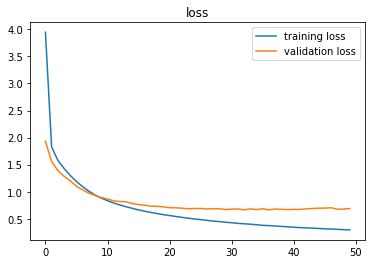

Plotting metrics...


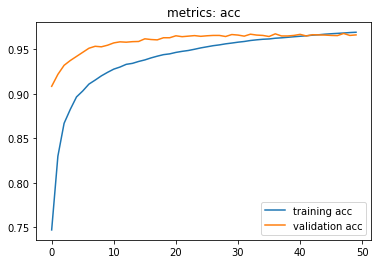

train {'acc': 0.9908364}
test {'acc': 0.9666}

Training student with temperature = 4 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 16 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5693623838634191835
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 10515765326965804146
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3062627 , acc = 0.12 
Epoch 1 , step 100 , loss= 0.66523707 , acc = 0.85 
Epoch 1 , step 200 , loss= 0.39677536 , acc = 0.88 
Epoch 1 , step 300 , loss= 0.37322852 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.3689291 , acc = 0.9 
Epoch 1 , step 500 , loss= 0.4750474 , acc = 0.85 
Epoch 1 , step 549 , loss= 0.3696015 val_loss= 0.29291642 , acc = 0.89 val acc = 0.917 
Epoch 1 finished, loss= 0.581924 
Epoch 2 , step 50 , loss= 0.33697397 , acc = 0.87 
Epoch 2 , step 150 

Epoch 19 , step 500 , loss= 0.04665797 , acc = 0.99 
Epoch 19 , step 549 , loss= 0.02304008 val_loss= 0.10570371 , acc = 1.0 val acc = 0.9688 
Epoch 19 finished, loss= 0.06299575 
Epoch 20 , step 50 , loss= 0.027506392 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.014890594 , acc = 1.0 
Epoch 20 , step 250 , loss= 0.040362403 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.030728042 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.09553511 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.019038662 val_loss= 0.10450291 , acc = 1.0 val acc = 0.9698 
Epoch 20 finished, loss= 0.060178943 
Epoch 21 , step 0 , loss= 0.03083791 , acc = 1.0 
Epoch 21 , step 100 , loss= 0.013980141 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.07228461 , acc = 0.96 
Epoch 21 , step 300 , loss= 0.03304276 , acc = 1.0 
Epoch 21 , step 400 , loss= 0.03808137 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.12382307 , acc = 0.97 
Epoch 21 , step 549 , loss= 0.13078499 val_loss= 0.10927217 , acc = 0.95 val acc = 0.9674 
Epoch 21 finished, 

Epoch 39 , step 200 , loss= 0.010799507 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.044069428 , acc = 0.98 
Epoch 39 , step 400 , loss= 0.035060395 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.067524254 , acc = 0.97 
Epoch 39 , step 549 , loss= 0.06187275 val_loss= 0.12145881 , acc = 0.98 val acc = 0.9666 
Epoch 39 finished, loss= 0.0284873 
Epoch 40 , step 50 , loss= 0.008225816 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.024732368 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.055732228 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.031212673 , acc = 0.99 
Epoch 40 , step 450 , loss= 0.029797485 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.03361756 val_loss= 0.11565768 , acc = 0.98 val acc = 0.9672 
Epoch 40 finished, loss= 0.027787652 
Epoch 41 , step 0 , loss= 0.018437529 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.0062210215 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.03100469 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.045474593 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.02402515 , acc = 0

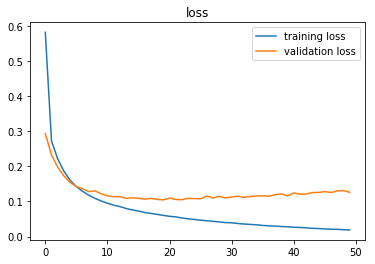

Plotting metrics...


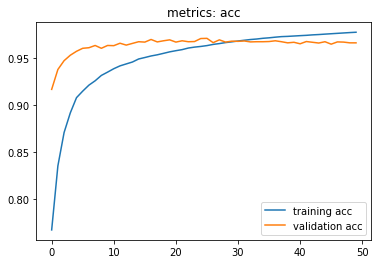

train {'acc': 0.9966364}
test {'acc': 0.9682}

Training student with temperature = 8 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12475650822432407962
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 328678373564821637
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 146.63153 , acc = 0.19 
Epoch 1 , step 100 , loss= 101.24998 , acc = 0.75 
Epoch 1 , step 200 , loss= 64.749626 , acc = 0.8 
Epoch 1 , step 300 , loss= 46.846645 , acc = 0.88 
Epoch 1 , step 400 , loss= 41.03374 , acc = 0.85 
Epoch 1 , step 500 , loss= 37.801754 , acc = 0.87 
Epoch 1 , step 549 , loss= 31.468237 val_loss= 31.847279 , acc = 0.92 val acc = 0.8922 
Epoch 1 finished, loss= 66.719475 
Epoch 2 , step 50 , loss= 28.051458 , acc = 0.91 
Epoch 2 , step 150 , los

Epoch 20 , step 150 , loss= 15.479827 , acc = 0.97 
Epoch 20 , step 250 , loss= 15.901824 , acc = 0.97 
Epoch 20 , step 350 , loss= 16.463964 , acc = 0.96 
Epoch 20 , step 450 , loss= 21.188215 , acc = 0.91 
Epoch 20 , step 549 , loss= 10.955918 val_loss= 16.763042 , acc = 0.99 val acc = 0.956 
Epoch 20 finished, loss= 16.436714 
Epoch 21 , step 0 , loss= 12.581809 , acc = 0.98 
Epoch 21 , step 100 , loss= 17.357695 , acc = 0.94 
Epoch 21 , step 200 , loss= 11.795712 , acc = 0.99 
Epoch 21 , step 300 , loss= 14.491868 , acc = 0.96 
Epoch 21 , step 400 , loss= 13.869938 , acc = 0.98 
Epoch 21 , step 500 , loss= 15.015713 , acc = 0.96 
Epoch 21 , step 549 , loss= 14.486783 val_loss= 16.525534 , acc = 0.97 val acc = 0.9586 
Epoch 21 finished, loss= 16.184946 
Epoch 22 , step 50 , loss= 12.002407 , acc = 0.98 
Epoch 22 , step 150 , loss= 13.20557 , acc = 0.98 
Epoch 22 , step 250 , loss= 20.794113 , acc = 0.97 
Epoch 22 , step 350 , loss= 18.352356 , acc = 0.94 
Epoch 22 , step 450 , loss=

Epoch 40 , step 250 , loss= 14.225247 , acc = 0.96 
Epoch 40 , step 350 , loss= 15.862155 , acc = 0.96 
Epoch 40 , step 450 , loss= 16.699652 , acc = 0.96 
Epoch 40 , step 549 , loss= 14.131172 val_loss= 15.177328 , acc = 0.96 val acc = 0.9632 
Epoch 40 finished, loss= 13.805563 
Epoch 41 , step 0 , loss= 13.47623 , acc = 0.97 
Epoch 41 , step 100 , loss= 12.067268 , acc = 0.97 
Epoch 41 , step 200 , loss= 9.444969 , acc = 1.0 
Epoch 41 , step 300 , loss= 21.350727 , acc = 0.96 
Epoch 41 , step 400 , loss= 15.023268 , acc = 0.96 
Epoch 41 , step 500 , loss= 13.646838 , acc = 0.98 
Epoch 41 , step 549 , loss= 10.76117 val_loss= 15.161492 , acc = 0.97 val acc = 0.9634 
Epoch 41 finished, loss= 13.746262 
Epoch 42 , step 50 , loss= 16.243492 , acc = 0.95 
Epoch 42 , step 150 , loss= 12.275251 , acc = 0.98 
Epoch 42 , step 250 , loss= 13.650626 , acc = 0.99 
Epoch 42 , step 350 , loss= 14.8011875 , acc = 0.98 
Epoch 42 , step 450 , loss= 9.032825 , acc = 1.0 
Epoch 42 , step 549 , loss= 16

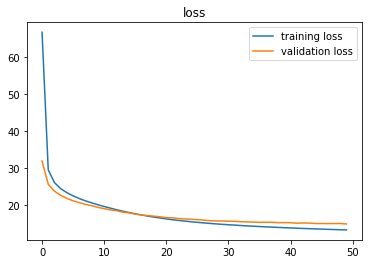

Plotting metrics...


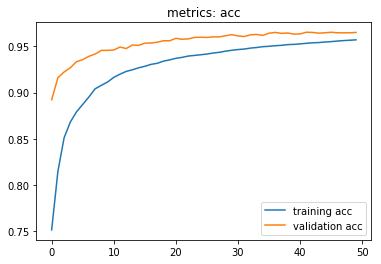

train {'acc': 0.9782909}
test {'acc': 0.9634}

Training student with temperature = 8 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9376162783904809742
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 6544458267178591029
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 110.7091 , acc = 0.16 
Epoch 1 , step 100 , loss= 76.311966 , acc = 0.75 
Epoch 1 , step 200 , loss= 47.608715 , acc = 0.81 
Epoch 1 , step 300 , loss= 31.598763 , acc = 0.89 
Epoch 1 , step 400 , loss= 29.587137 , acc = 0.88 
Epoch 1 , step 500 , loss= 24.520508 , acc = 0.89 
Epoch 1 , step 549 , loss= 24.94124 val_loss= 24.001812 , acc = 0.87 val acc = 0.893 
Epoch 1 finished, loss= 48.97901 
Epoch 2 , step 50 , loss= 29.244656 , acc = 0.85 
Epoch 2 , step 150 , los

Epoch 20 , step 50 , loss= 7.3359156 , acc = 1.0 
Epoch 20 , step 150 , loss= 11.147814 , acc = 0.97 
Epoch 20 , step 250 , loss= 6.8227935 , acc = 0.99 
Epoch 20 , step 350 , loss= 11.673651 , acc = 0.98 
Epoch 20 , step 450 , loss= 11.563246 , acc = 0.97 
Epoch 20 , step 549 , loss= 7.8850784 val_loss= 11.654595 , acc = 0.98 val acc = 0.9624 
Epoch 20 finished, loss= 11.370898 
Epoch 21 , step 0 , loss= 14.538641 , acc = 0.94 
Epoch 21 , step 100 , loss= 12.041678 , acc = 0.94 
Epoch 21 , step 200 , loss= 11.173397 , acc = 0.97 
Epoch 21 , step 300 , loss= 14.030408 , acc = 0.95 
Epoch 21 , step 400 , loss= 14.414705 , acc = 0.96 
Epoch 21 , step 500 , loss= 9.277842 , acc = 0.99 
Epoch 21 , step 549 , loss= 8.62614 val_loss= 11.6479025 , acc = 0.99 val acc = 0.9608 
Epoch 21 finished, loss= 11.204017 
Epoch 22 , step 50 , loss= 8.387235 , acc = 0.98 
Epoch 22 , step 150 , loss= 10.858477 , acc = 0.95 
Epoch 22 , step 250 , loss= 7.7267256 , acc = 0.99 
Epoch 22 , step 350 , loss= 8.

Epoch 40 , step 250 , loss= 10.448941 , acc = 1.0 
Epoch 40 , step 350 , loss= 6.7105355 , acc = 0.98 
Epoch 40 , step 450 , loss= 6.1121 , acc = 0.99 
Epoch 40 , step 549 , loss= 11.085677 val_loss= 10.747269 , acc = 0.97 val acc = 0.9672 
Epoch 40 finished, loss= 9.573103 
Epoch 41 , step 0 , loss= 11.947866 , acc = 0.98 
Epoch 41 , step 100 , loss= 8.170831 , acc = 0.99 
Epoch 41 , step 200 , loss= 15.021091 , acc = 0.96 
Epoch 41 , step 300 , loss= 10.591007 , acc = 0.97 
Epoch 41 , step 400 , loss= 8.414004 , acc = 0.99 
Epoch 41 , step 500 , loss= 7.413539 , acc = 0.99 
Epoch 41 , step 549 , loss= 10.488339 val_loss= 10.640479 , acc = 0.98 val acc = 0.969 
Epoch 41 finished, loss= 9.523604 
Epoch 42 , step 50 , loss= 9.52374 , acc = 0.99 
Epoch 42 , step 150 , loss= 6.825621 , acc = 1.0 
Epoch 42 , step 250 , loss= 7.8784904 , acc = 0.98 
Epoch 42 , step 350 , loss= 10.528488 , acc = 0.97 
Epoch 42 , step 450 , loss= 9.076055 , acc = 0.99 
Epoch 42 , step 549 , loss= 9.911599 val

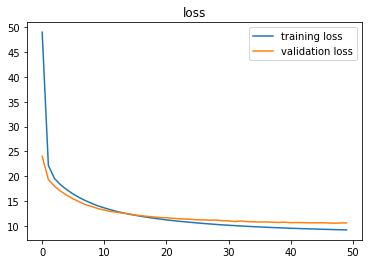

Plotting metrics...


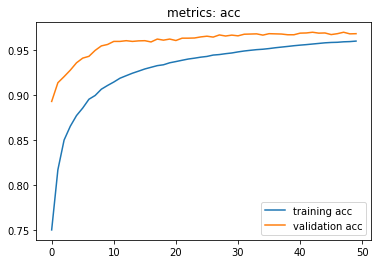

train {'acc': 0.9829091}
test {'acc': 0.9669}

Training student with temperature = 8 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8329256341364005445
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 6449496338115115585
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 74.703995 , acc = 0.14 
Epoch 1 , step 100 , loss= 55.291393 , acc = 0.69 
Epoch 1 , step 200 , loss= 30.587364 , acc = 0.81 
Epoch 1 , step 300 , loss= 25.566652 , acc = 0.83 
Epoch 1 , step 400 , loss= 20.550789 , acc = 0.84 
Epoch 1 , step 500 , loss= 22.691254 , acc = 0.84 
Epoch 1 , step 549 , loss= 13.988327 val_loss= 16.611294 , acc = 0.92 val acc = 0.892 
Epoch 1 finished, loss= 33.506393 
Epoch 2 , step 50 , loss= 15.390002 , acc = 0.92 
Epoch 2 , step 150 , lo

Epoch 20 , step 150 , loss= 5.904213 , acc = 0.97 
Epoch 20 , step 250 , loss= 7.7902822 , acc = 0.96 
Epoch 20 , step 350 , loss= 8.585254 , acc = 0.99 
Epoch 20 , step 450 , loss= 6.6723704 , acc = 1.0 
Epoch 20 , step 549 , loss= 8.891296 val_loss= 8.17925 , acc = 0.94 val acc = 0.9596 
Epoch 20 finished, loss= 7.9963555 
Epoch 21 , step 0 , loss= 8.730797 , acc = 0.95 
Epoch 21 , step 100 , loss= 9.39698 , acc = 0.93 
Epoch 21 , step 200 , loss= 5.083901 , acc = 0.98 
Epoch 21 , step 300 , loss= 6.840341 , acc = 0.97 
Epoch 21 , step 400 , loss= 8.964888 , acc = 0.96 
Epoch 21 , step 500 , loss= 10.0068 , acc = 0.98 
Epoch 21 , step 549 , loss= 7.605714 val_loss= 8.060475 , acc = 0.97 val acc = 0.9608 
Epoch 21 finished, loss= 7.8918486 
Epoch 22 , step 50 , loss= 6.689314 , acc = 0.97 
Epoch 22 , step 150 , loss= 11.185022 , acc = 0.94 
Epoch 22 , step 250 , loss= 8.47014 , acc = 0.95 
Epoch 22 , step 350 , loss= 6.595952 , acc = 0.97 
Epoch 22 , step 450 , loss= 5.4178944 , acc =

Epoch 40 , step 450 , loss= 8.844924 , acc = 0.96 
Epoch 40 , step 549 , loss= 5.2292976 val_loss= 7.458356 , acc = 0.98 val acc = 0.9648 
Epoch 40 finished, loss= 6.73914 
Epoch 41 , step 0 , loss= 5.678162 , acc = 0.99 
Epoch 41 , step 100 , loss= 6.1012945 , acc = 0.99 
Epoch 41 , step 200 , loss= 6.7950034 , acc = 0.99 
Epoch 41 , step 300 , loss= 4.568598 , acc = 0.99 
Epoch 41 , step 400 , loss= 5.879534 , acc = 0.98 
Epoch 41 , step 500 , loss= 7.492944 , acc = 0.97 
Epoch 41 , step 549 , loss= 5.408965 val_loss= 7.42073 , acc = 0.98 val acc = 0.9652 
Epoch 41 finished, loss= 6.700521 
Epoch 42 , step 50 , loss= 10.03948 , acc = 0.94 
Epoch 42 , step 150 , loss= 4.281579 , acc = 0.99 
Epoch 42 , step 250 , loss= 5.3308244 , acc = 0.97 
Epoch 42 , step 350 , loss= 6.9216065 , acc = 0.98 
Epoch 42 , step 450 , loss= 6.7867823 , acc = 0.99 
Epoch 42 , step 549 , loss= 7.256076 val_loss= 7.3865056 , acc = 0.96 val acc = 0.9666 
Epoch 42 finished, loss= 6.6680207 
Epoch 43 , step 0 ,

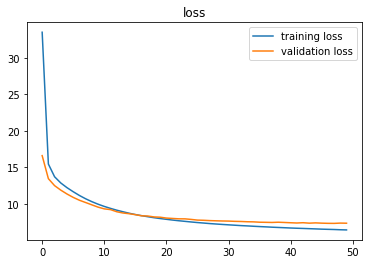

Plotting metrics...


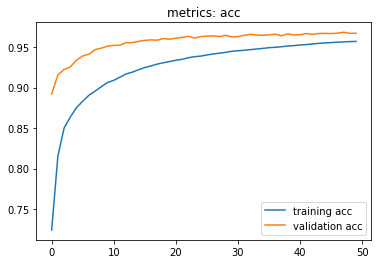

train {'acc': 0.98065454}
test {'acc': 0.9627}

Training student with temperature = 8 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17782528847028584448
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 9564200959384653028
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 38.44681 , acc = 0.15 
Epoch 1 , step 100 , loss= 27.577627 , acc = 0.75 
Epoch 1 , step 200 , loss= 18.995888 , acc = 0.75 
Epoch 1 , step 300 , loss= 12.966989 , acc = 0.86 
Epoch 1 , step 400 , loss= 8.986263 , acc = 0.95 
Epoch 1 , step 500 , loss= 8.761043 , acc = 0.9 
Epoch 1 , step 549 , loss= 10.182226 val_loss= 8.896022 , acc = 0.88 val acc = 0.8948 
Epoch 1 finished, loss= 17.592222 
Epoch 2 , step 50 , loss= 9.833583 , acc = 0.9 
Epoch 2 , step 150 , loss

Epoch 20 , step 150 , loss= 3.7260013 , acc = 0.97 
Epoch 20 , step 250 , loss= 3.9968305 , acc = 0.98 
Epoch 20 , step 350 , loss= 4.6792665 , acc = 0.95 
Epoch 20 , step 450 , loss= 3.813322 , acc = 0.97 
Epoch 20 , step 549 , loss= 3.8833957 val_loss= 4.2942934 , acc = 0.97 val acc = 0.9632 
Epoch 20 finished, loss= 4.07598 
Epoch 21 , step 0 , loss= 3.969618 , acc = 0.97 
Epoch 21 , step 100 , loss= 4.3953595 , acc = 0.97 
Epoch 21 , step 200 , loss= 4.741908 , acc = 0.97 
Epoch 21 , step 300 , loss= 2.0257514 , acc = 1.0 
Epoch 21 , step 400 , loss= 3.801793 , acc = 0.99 
Epoch 21 , step 500 , loss= 3.416164 , acc = 0.99 
Epoch 21 , step 549 , loss= 3.1654851 val_loss= 4.2880816 , acc = 0.99 val acc = 0.9626 
Epoch 21 finished, loss= 4.0164747 
Epoch 22 , step 50 , loss= 2.9997969 , acc = 0.99 
Epoch 22 , step 150 , loss= 4.048226 , acc = 0.98 
Epoch 22 , step 250 , loss= 2.9399996 , acc = 0.99 
Epoch 22 , step 350 , loss= 5.1144967 , acc = 0.97 
Epoch 22 , step 450 , loss= 2.7954

Epoch 40 , step 350 , loss= 2.8270683 , acc = 0.99 
Epoch 40 , step 450 , loss= 4.1983137 , acc = 0.98 
Epoch 40 , step 549 , loss= 3.3614852 val_loss= 3.9364054 , acc = 0.98 val acc = 0.967 
Epoch 40 finished, loss= 3.4242578 
Epoch 41 , step 0 , loss= 1.741149 , acc = 1.0 
Epoch 41 , step 100 , loss= 3.0176077 , acc = 1.0 
Epoch 41 , step 200 , loss= 2.8778698 , acc = 0.97 
Epoch 41 , step 300 , loss= 3.6806774 , acc = 0.99 
Epoch 41 , step 400 , loss= 3.5885508 , acc = 0.99 
Epoch 41 , step 500 , loss= 3.8730516 , acc = 0.98 
Epoch 41 , step 549 , loss= 3.1004202 val_loss= 3.9531233 , acc = 0.99 val acc = 0.9672 
Epoch 41 finished, loss= 3.4067185 
Epoch 42 , step 50 , loss= 2.7125032 , acc = 1.0 
Epoch 42 , step 150 , loss= 2.969653 , acc = 0.97 
Epoch 42 , step 250 , loss= 2.966738 , acc = 1.0 
Epoch 42 , step 350 , loss= 4.8026605 , acc = 0.96 
Epoch 42 , step 450 , loss= 3.5273614 , acc = 0.96 
Epoch 42 , step 549 , loss= 4.1887436 val_loss= 3.9615345 , acc = 0.94 val acc = 0.96

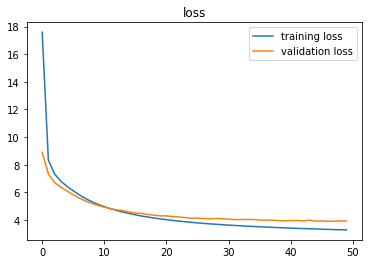

Plotting metrics...


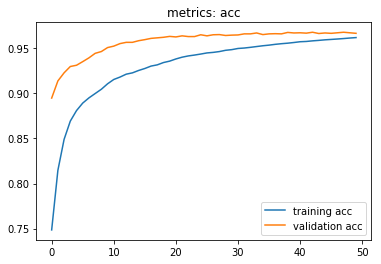

train {'acc': 0.9839091}
test {'acc': 0.966}

Training student with temperature = 8 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 64 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10532014793353887909
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 6334052806950958746
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.1959317 , acc = 0.26 
Epoch 1 , step 100 , loss= 0.6914165 , acc = 0.84 
Epoch 1 , step 200 , loss= 0.39753065 , acc = 0.92 
Epoch 1 , step 300 , loss= 0.41509378 , acc = 0.9 
Epoch 1 , step 400 , loss= 0.38682267 , acc = 0.89 
Epoch 1 , step 500 , loss= 0.18582012 , acc = 0.94 
Epoch 1 , step 549 , loss= 0.23236227 val_loss= 0.2838298 , acc = 0.91 val acc = 0.918 
Epoch 1 finished, loss= 0.545102 
Epoch 2 , step 50 , loss= 0.3092516 , acc = 0.9 
Epoch 2 , step 150 , 

Epoch 19 , step 500 , loss= 0.023298645 , acc = 1.0 
Epoch 19 , step 549 , loss= 0.07133481 val_loss= 0.11365629 , acc = 0.98 val acc = 0.968 
Epoch 19 finished, loss= 0.06779451 
Epoch 20 , step 50 , loss= 0.04804467 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.07045098 , acc = 0.99 
Epoch 20 , step 250 , loss= 0.070707664 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.051247664 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.06017441 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.030820722 val_loss= 0.116968565 , acc = 0.99 val acc = 0.9668 
Epoch 20 finished, loss= 0.065263495 
Epoch 21 , step 0 , loss= 0.04059813 , acc = 0.98 
Epoch 21 , step 100 , loss= 0.02966955 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.05178986 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.0467006 , acc = 0.99 
Epoch 21 , step 400 , loss= 0.039980024 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.04320051 , acc = 0.99 
Epoch 21 , step 549 , loss= 0.049083605 val_loss= 0.11736576 , acc = 0.98 val acc = 0.9668 
Epoch 21 finish

Epoch 39 , step 200 , loss= 0.012218521 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.05388589 , acc = 0.98 
Epoch 39 , step 400 , loss= 0.027718289 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.02486224 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.014922747 val_loss= 0.12129099 , acc = 1.0 val acc = 0.9672 
Epoch 39 finished, loss= 0.029441494 
Epoch 40 , step 50 , loss= 0.018498313 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.027162395 , acc = 0.99 
Epoch 40 , step 250 , loss= 0.04638587 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.011774471 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.0330085 , acc = 0.99 
Epoch 40 , step 549 , loss= 0.010308509 val_loss= 0.124233715 , acc = 1.0 val acc = 0.9662 
Epoch 40 finished, loss= 0.02819484 
Epoch 41 , step 0 , loss= 0.08370962 , acc = 0.98 
Epoch 41 , step 100 , loss= 0.0096587865 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.03814506 , acc = 0.99 
Epoch 41 , step 300 , loss= 0.05675365 , acc = 0.99 
Epoch 41 , step 400 , loss= 0.012141485 , acc = 0.99 
E

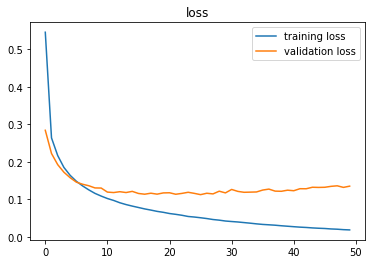

Plotting metrics...


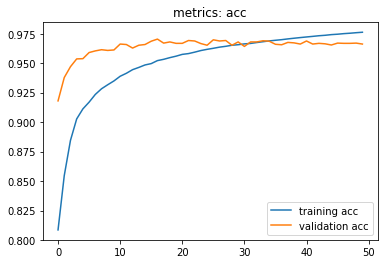

train {'acc': 0.9965091}
test {'acc': 0.9673}

Training student with temperature = 16 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2806566873099354228
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 9123603647217459539
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 588.30164 , acc = 0.17 
Epoch 1 , step 100 , loss= 500.2062 , acc = 0.58 
Epoch 1 , step 200 , loss= 366.50485 , acc = 0.7 
Epoch 1 , step 300 , loss= 286.11856 , acc = 0.83 
Epoch 1 , step 400 , loss= 290.49283 , acc = 0.81 
Epoch 1 , step 500 , loss= 268.65393 , acc = 0.82 
Epoch 1 , step 549 , loss= 250.82562 val_loss= 241.89458 , acc = 0.87 val acc = 0.8688 
Epoch 1 finished, loss= 359.9188 
Epoch 2 , step 50 , loss= 244.33824 , acc = 0.89 
Epoch 2 , step 150 , lo

Epoch 20 , step 50 , loss= 193.115 , acc = 0.97 
Epoch 20 , step 150 , loss= 202.58417 , acc = 0.92 
Epoch 20 , step 250 , loss= 177.92487 , acc = 0.98 
Epoch 20 , step 350 , loss= 159.97847 , acc = 0.96 
Epoch 20 , step 450 , loss= 200.13867 , acc = 0.95 
Epoch 20 , step 549 , loss= 214.72961 val_loss= 180.47577 , acc = 0.93 val acc = 0.9514 
Epoch 20 finished, loss= 184.39735 
Epoch 21 , step 0 , loss= 149.19061 , acc = 0.99 
Epoch 21 , step 100 , loss= 159.04013 , acc = 0.98 
Epoch 21 , step 200 , loss= 182.03984 , acc = 0.95 
Epoch 21 , step 300 , loss= 203.25642 , acc = 0.95 
Epoch 21 , step 400 , loss= 188.29016 , acc = 0.96 
Epoch 21 , step 500 , loss= 199.36554 , acc = 0.95 
Epoch 21 , step 549 , loss= 170.59789 val_loss= 180.01332 , acc = 0.97 val acc = 0.9524 
Epoch 21 finished, loss= 183.77594 
Epoch 22 , step 50 , loss= 178.11682 , acc = 0.96 
Epoch 22 , step 150 , loss= 180.44922 , acc = 0.96 
Epoch 22 , step 250 , loss= 140.87721 , acc = 0.99 
Epoch 22 , step 350 , loss= 

Epoch 40 , step 150 , loss= 168.34503 , acc = 0.98 
Epoch 40 , step 250 , loss= 155.71408 , acc = 0.98 
Epoch 40 , step 350 , loss= 189.84851 , acc = 0.97 
Epoch 40 , step 450 , loss= 192.04305 , acc = 0.97 
Epoch 40 , step 549 , loss= 146.74706 val_loss= 175.80827 , acc = 0.98 val acc = 0.9582 
Epoch 40 finished, loss= 177.9576 
Epoch 41 , step 0 , loss= 210.86665 , acc = 0.91 
Epoch 41 , step 100 , loss= 158.44038 , acc = 0.95 
Epoch 41 , step 200 , loss= 161.76756 , acc = 0.96 
Epoch 41 , step 300 , loss= 181.7306 , acc = 0.95 
Epoch 41 , step 400 , loss= 167.97679 , acc = 0.96 
Epoch 41 , step 500 , loss= 151.56343 , acc = 0.99 
Epoch 41 , step 549 , loss= 181.45778 val_loss= 175.5956 , acc = 0.98 val acc = 0.9588 
Epoch 41 finished, loss= 177.81247 
Epoch 42 , step 50 , loss= 159.89035 , acc = 0.99 
Epoch 42 , step 150 , loss= 205.97896 , acc = 0.91 
Epoch 42 , step 250 , loss= 204.71214 , acc = 0.98 
Epoch 42 , step 350 , loss= 175.16255 , acc = 0.98 
Epoch 42 , step 450 , loss= 

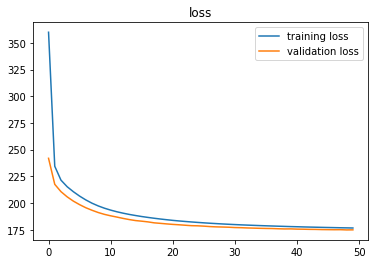

Plotting metrics...


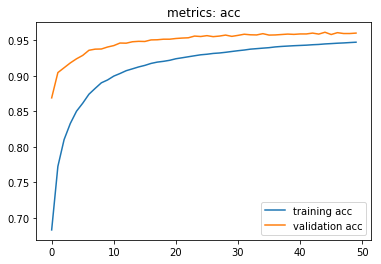

train {'acc': 0.9703818}
test {'acc': 0.9633}

Training student with temperature = 16 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1317351010422453620
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 15306170541599355263
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 441.7008 , acc = 0.16 
Epoch 1 , step 100 , loss= 374.32202 , acc = 0.61 
Epoch 1 , step 200 , loss= 285.35974 , acc = 0.67 
Epoch 1 , step 300 , loss= 244.59546 , acc = 0.74 
Epoch 1 , step 400 , loss= 209.68083 , acc = 0.78 
Epoch 1 , step 500 , loss= 178.16531 , acc = 0.89 
Epoch 1 , step 549 , loss= 186.90118 val_loss= 180.81682 , acc = 0.86 val acc = 0.8714 
Epoch 1 finished, loss= 269.38138 
Epoch 2 , step 50 , loss= 169.63344 , acc = 0.89 
Epoch 2 , step 150

Epoch 20 , step 50 , loss= 156.02542 , acc = 0.89 
Epoch 20 , step 150 , loss= 138.41347 , acc = 0.98 
Epoch 20 , step 250 , loss= 120.39545 , acc = 0.98 
Epoch 20 , step 350 , loss= 160.502 , acc = 0.97 
Epoch 20 , step 450 , loss= 149.89308 , acc = 0.96 
Epoch 20 , step 549 , loss= 120.02383 val_loss= 133.84138 , acc = 0.98 val acc = 0.9586 
Epoch 20 finished, loss= 137.11801 
Epoch 21 , step 0 , loss= 149.16757 , acc = 0.94 
Epoch 21 , step 100 , loss= 126.51727 , acc = 0.95 
Epoch 21 , step 200 , loss= 129.96228 , acc = 0.96 
Epoch 21 , step 300 , loss= 144.62279 , acc = 0.89 
Epoch 21 , step 400 , loss= 123.317 , acc = 0.95 
Epoch 21 , step 500 , loss= 120.91238 , acc = 1.0 
Epoch 21 , step 549 , loss= 154.39479 val_loss= 133.69919 , acc = 0.96 val acc = 0.9592 
Epoch 21 finished, loss= 136.74304 
Epoch 22 , step 50 , loss= 141.70117 , acc = 0.97 
Epoch 22 , step 150 , loss= 143.17184 , acc = 0.96 
Epoch 22 , step 250 , loss= 150.37695 , acc = 0.98 
Epoch 22 , step 350 , loss= 137

Epoch 40 , step 150 , loss= 111.31784 , acc = 0.97 
Epoch 40 , step 250 , loss= 135.30684 , acc = 0.97 
Epoch 40 , step 350 , loss= 122.05139 , acc = 1.0 
Epoch 40 , step 450 , loss= 128.30873 , acc = 0.98 
Epoch 40 , step 549 , loss= 147.80882 val_loss= 131.47923 , acc = 0.95 val acc = 0.9642 
Epoch 40 finished, loss= 133.30972 
Epoch 41 , step 0 , loss= 151.78537 , acc = 0.97 
Epoch 41 , step 100 , loss= 137.33743 , acc = 0.94 
Epoch 41 , step 200 , loss= 140.12202 , acc = 0.97 
Epoch 41 , step 300 , loss= 154.69247 , acc = 0.95 
Epoch 41 , step 400 , loss= 109.696304 , acc = 0.97 
Epoch 41 , step 500 , loss= 155.53865 , acc = 0.97 
Epoch 41 , step 549 , loss= 112.21001 val_loss= 131.54343 , acc = 0.99 val acc = 0.9638 
Epoch 41 finished, loss= 133.20764 
Epoch 42 , step 50 , loss= 101.80238 , acc = 0.99 
Epoch 42 , step 150 , loss= 115.6623 , acc = 1.0 
Epoch 42 , step 250 , loss= 131.78386 , acc = 0.97 
Epoch 42 , step 350 , loss= 145.81024 , acc = 0.97 
Epoch 42 , step 450 , loss=

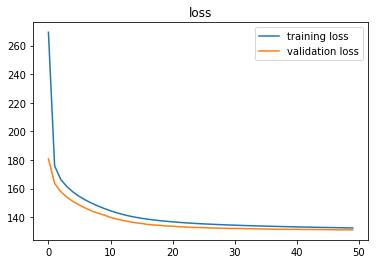

Plotting metrics...


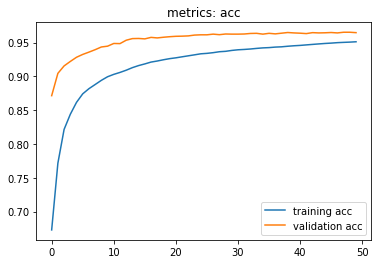

train {'acc': 0.97165453}
test {'acc': 0.9634}

Training student with temperature = 16 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2619375911980674652
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 12136073704199308468
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 295.5989 , acc = 0.1 
Epoch 1 , step 100 , loss= 249.82109 , acc = 0.69 
Epoch 1 , step 200 , loss= 182.96788 , acc = 0.76 
Epoch 1 , step 300 , loss= 163.67027 , acc = 0.75 
Epoch 1 , step 400 , loss= 133.45691 , acc = 0.85 
Epoch 1 , step 500 , loss= 128.96344 , acc = 0.84 
Epoch 1 , step 549 , loss= 125.255806 val_loss= 121.38027 , acc = 0.9 val acc = 0.8716 
Epoch 1 finished, loss= 179.2242 
Epoch 2 , step 50 , loss= 118.923386 , acc = 0.88 
Epoch 2 , step 150 ,

Epoch 20 , step 150 , loss= 101.146454 , acc = 0.96 
Epoch 20 , step 250 , loss= 93.31042 , acc = 0.95 
Epoch 20 , step 350 , loss= 92.58432 , acc = 0.96 
Epoch 20 , step 450 , loss= 101.375565 , acc = 0.97 
Epoch 20 , step 549 , loss= 85.999695 val_loss= 90.861206 , acc = 0.96 val acc = 0.9526 
Epoch 20 finished, loss= 92.71565 
Epoch 21 , step 0 , loss= 90.21569 , acc = 0.97 
Epoch 21 , step 100 , loss= 98.70207 , acc = 0.96 
Epoch 21 , step 200 , loss= 82.96004 , acc = 0.96 
Epoch 21 , step 300 , loss= 79.25 , acc = 0.92 
Epoch 21 , step 400 , loss= 80.48853 , acc = 0.96 
Epoch 21 , step 500 , loss= 90.05276 , acc = 0.96 
Epoch 21 , step 549 , loss= 85.94728 val_loss= 90.49483 , acc = 0.97 val acc = 0.9552 
Epoch 21 finished, loss= 92.40852 
Epoch 22 , step 50 , loss= 87.042274 , acc = 0.98 
Epoch 22 , step 150 , loss= 92.116776 , acc = 0.95 
Epoch 22 , step 250 , loss= 99.56989 , acc = 0.95 
Epoch 22 , step 350 , loss= 98.66239 , acc = 0.96 
Epoch 22 , step 450 , loss= 97.782166 , 

Epoch 40 , step 450 , loss= 99.11249 , acc = 0.96 
Epoch 40 , step 549 , loss= 84.46558 val_loss= 88.3501 , acc = 0.97 val acc = 0.963 
Epoch 40 finished, loss= 89.493866 
Epoch 41 , step 0 , loss= 80.54036 , acc = 1.0 
Epoch 41 , step 100 , loss= 83.11029 , acc = 0.99 
Epoch 41 , step 200 , loss= 82.389885 , acc = 0.98 
Epoch 41 , step 300 , loss= 83.392 , acc = 0.96 
Epoch 41 , step 400 , loss= 93.40862 , acc = 0.96 
Epoch 41 , step 500 , loss= 91.392105 , acc = 0.99 
Epoch 41 , step 549 , loss= 95.27003 val_loss= 88.36901 , acc = 0.98 val acc = 0.9638 
Epoch 41 finished, loss= 89.40953 
Epoch 42 , step 50 , loss= 86.31192 , acc = 0.95 
Epoch 42 , step 150 , loss= 82.58345 , acc = 0.98 
Epoch 42 , step 250 , loss= 75.66907 , acc = 0.98 
Epoch 42 , step 350 , loss= 89.28408 , acc = 0.96 
Epoch 42 , step 450 , loss= 95.45894 , acc = 0.98 
Epoch 42 , step 549 , loss= 84.916824 val_loss= 88.20483 , acc = 0.99 val acc = 0.962 
Epoch 42 finished, loss= 89.32291 
Epoch 43 , step 0 , loss= 8

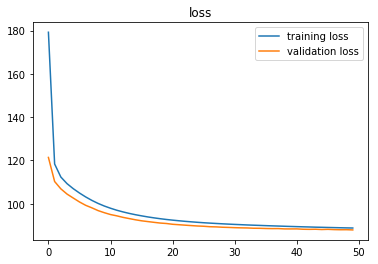

Plotting metrics...


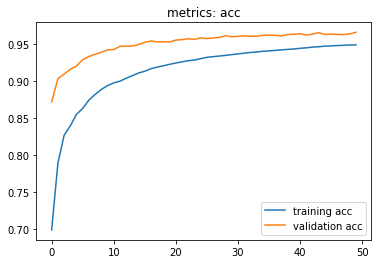

train {'acc': 0.9733273}
test {'acc': 0.964}

Training student with temperature = 16 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7022770361312067751
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 5730035138690931430
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 149.14944 , acc = 0.13 
Epoch 1 , step 100 , loss= 128.18517 , acc = 0.73 
Epoch 1 , step 200 , loss= 99.711716 , acc = 0.77 
Epoch 1 , step 300 , loss= 71.75482 , acc = 0.84 
Epoch 1 , step 400 , loss= 77.96678 , acc = 0.8 
Epoch 1 , step 500 , loss= 70.138565 , acc = 0.82 
Epoch 1 , step 549 , loss= 73.035515 val_loss= 61.701523 , acc = 0.82 val acc = 0.8754 
Epoch 1 finished, loss= 91.9394 
Epoch 2 , step 50 , loss= 58.430634 , acc = 0.86 
Epoch 2 , step 150 , los

Epoch 20 , step 150 , loss= 46.804066 , acc = 0.96 
Epoch 20 , step 250 , loss= 46.9685 , acc = 0.97 
Epoch 20 , step 350 , loss= 48.363117 , acc = 0.97 
Epoch 20 , step 450 , loss= 42.16253 , acc = 0.97 
Epoch 20 , step 549 , loss= 46.632 val_loss= 45.617725 , acc = 0.95 val acc = 0.9546 
Epoch 20 finished, loss= 46.62445 
Epoch 21 , step 0 , loss= 44.883373 , acc = 0.98 
Epoch 21 , step 100 , loss= 47.691227 , acc = 0.97 
Epoch 21 , step 200 , loss= 44.189697 , acc = 1.0 
Epoch 21 , step 300 , loss= 51.27805 , acc = 0.97 
Epoch 21 , step 400 , loss= 40.91836 , acc = 0.98 
Epoch 21 , step 500 , loss= 51.63026 , acc = 0.94 
Epoch 21 , step 549 , loss= 44.841003 val_loss= 45.43315 , acc = 0.95 val acc = 0.9544 
Epoch 21 finished, loss= 46.441025 
Epoch 22 , step 50 , loss= 40.517426 , acc = 0.96 
Epoch 22 , step 150 , loss= 44.983974 , acc = 0.98 
Epoch 22 , step 250 , loss= 46.911346 , acc = 0.96 
Epoch 22 , step 350 , loss= 44.96245 , acc = 0.97 
Epoch 22 , step 450 , loss= 42.979465 

Epoch 40 , step 350 , loss= 47.09668 , acc = 0.96 
Epoch 40 , step 450 , loss= 40.786892 , acc = 0.99 
Epoch 40 , step 549 , loss= 50.88758 val_loss= 44.285347 , acc = 0.95 val acc = 0.9614 
Epoch 40 finished, loss= 44.83348 
Epoch 41 , step 0 , loss= 51.483627 , acc = 0.97 
Epoch 41 , step 100 , loss= 47.17086 , acc = 0.97 
Epoch 41 , step 200 , loss= 45.81651 , acc = 0.96 
Epoch 41 , step 300 , loss= 41.251595 , acc = 0.97 
Epoch 41 , step 400 , loss= 44.628788 , acc = 0.95 
Epoch 41 , step 500 , loss= 43.56425 , acc = 0.97 
Epoch 41 , step 549 , loss= 43.059376 val_loss= 44.24142 , acc = 0.98 val acc = 0.9632 
Epoch 41 finished, loss= 44.7837 
Epoch 42 , step 50 , loss= 46.757565 , acc = 0.97 
Epoch 42 , step 150 , loss= 51.469177 , acc = 0.97 
Epoch 42 , step 250 , loss= 37.78668 , acc = 1.0 
Epoch 42 , step 350 , loss= 38.67901 , acc = 0.98 
Epoch 42 , step 450 , loss= 45.06325 , acc = 0.97 
Epoch 42 , step 549 , loss= 47.794987 val_loss= 44.251976 , acc = 0.95 val acc = 0.9612 
E

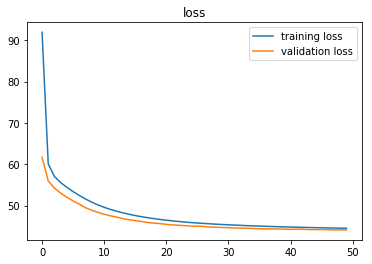

Plotting metrics...


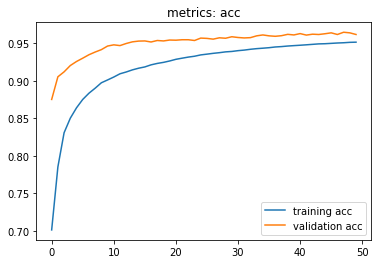

train {'acc': 0.9735091}
test {'acc': 0.9608}

Training student with temperature = 16 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 256 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5805534403787490288
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 3953858950348238986
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2513578 , acc = 0.17 
Epoch 1 , step 100 , loss= 0.68581754 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.4688633 , acc = 0.85 
Epoch 1 , step 300 , loss= 0.4267265 , acc = 0.88 
Epoch 1 , step 400 , loss= 0.26622403 , acc = 0.93 
Epoch 1 , step 500 , loss= 0.26120195 , acc = 0.95 
Epoch 1 , step 549 , loss= 0.19215025 val_loss= 0.26213303 , acc = 0.94 val acc = 0.9268 
Epoch 1 finished, loss= 0.5489683 
Epoch 2 , step 50 , loss= 0.33968708 , acc = 0.9 
Epoch 2 , step 

Epoch 19 , step 500 , loss= 0.05334618 , acc = 0.99 
Epoch 19 , step 549 , loss= 0.10161883 val_loss= 0.10438463 , acc = 0.96 val acc = 0.9682 
Epoch 19 finished, loss= 0.058113568 
Epoch 20 , step 50 , loss= 0.034865867 , acc = 1.0 
Epoch 20 , step 150 , loss= 0.04261082 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.0344627 , acc = 0.99 
Epoch 20 , step 350 , loss= 0.06520502 , acc = 0.98 
Epoch 20 , step 450 , loss= 0.067498356 , acc = 0.96 
Epoch 20 , step 549 , loss= 0.062273346 val_loss= 0.102762766 , acc = 0.98 val acc = 0.9706 
Epoch 20 finished, loss= 0.055648785 
Epoch 21 , step 0 , loss= 0.053886555 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.045075506 , acc = 0.99 
Epoch 21 , step 200 , loss= 0.03555953 , acc = 1.0 
Epoch 21 , step 300 , loss= 0.043315765 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.030190239 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.078850664 , acc = 0.98 
Epoch 21 , step 549 , loss= 0.028522937 val_loss= 0.10071317 , acc = 1.0 val acc = 0.9704 
Epoch 21 fini

Epoch 39 , step 100 , loss= 0.021988189 , acc = 1.0 
Epoch 39 , step 200 , loss= 0.022784598 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.0288904 , acc = 1.0 
Epoch 39 , step 400 , loss= 0.015644584 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.015318304 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.04201635 val_loss= 0.116393544 , acc = 0.98 val acc = 0.9684 
Epoch 39 finished, loss= 0.023998508 
Epoch 40 , step 50 , loss= 0.010219328 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.015314983 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.041518826 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.015106751 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.00542198 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.020561531 val_loss= 0.11217742 , acc = 1.0 val acc = 0.9708 
Epoch 40 finished, loss= 0.022487728 
Epoch 41 , step 0 , loss= 0.0063504665 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.11032999 , acc = 0.97 
Epoch 41 , step 200 , loss= 0.0051274854 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.013014252 , acc = 0.99 
E

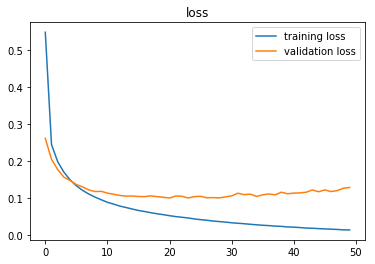

Plotting metrics...


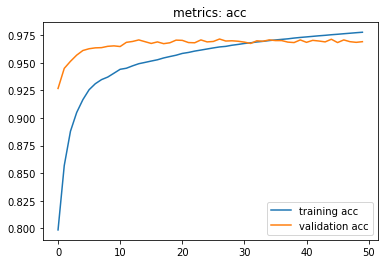

train {'acc': 0.99612725}
test {'acc': 0.967}

Training student with temperature = 32 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15504812414377490772
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 17124521632367055658
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2354.3965 , acc = 0.22 
Epoch 1 , step 100 , loss= 2226.1074 , acc = 0.38 
Epoch 1 , step 200 , loss= 1998.307 , acc = 0.58 
Epoch 1 , step 300 , loss= 1790.325 , acc = 0.79 
Epoch 1 , step 400 , loss= 1764.6028 , acc = 0.73 
Epoch 1 , step 500 , loss= 1748.2635 , acc = 0.82 
Epoch 1 , step 549 , loss= 1700.6243 val_loss= 1714.1667 , acc = 0.87 val acc = 0.8056 
Epoch 1 finished, loss= 1956.9069 
Epoch 2 , step 50 , loss= 1732.8041 , acc = 0.82 
Epoch 2 , step 150 

Epoch 20 , step 50 , loss= 1588.6193 , acc = 0.94 
Epoch 20 , step 150 , loss= 1628.99 , acc = 0.92 
Epoch 20 , step 250 , loss= 1584.1648 , acc = 0.93 
Epoch 20 , step 350 , loss= 1478.9478 , acc = 0.93 
Epoch 20 , step 450 , loss= 1616.2273 , acc = 0.97 
Epoch 20 , step 549 , loss= 1672.4967 val_loss= 1568.2452 , acc = 0.96 val acc = 0.9452 
Epoch 20 finished, loss= 1588.7523 
Epoch 21 , step 0 , loss= 1610.8573 , acc = 0.9 
Epoch 21 , step 100 , loss= 1589.0153 , acc = 0.98 
Epoch 21 , step 200 , loss= 1607.1313 , acc = 0.9 
Epoch 21 , step 300 , loss= 1687.4325 , acc = 0.96 
Epoch 21 , step 400 , loss= 1552.0952 , acc = 0.9 
Epoch 21 , step 500 , loss= 1623.2751 , acc = 0.95 
Epoch 21 , step 549 , loss= 1558.9237 val_loss= 1567.5164 , acc = 0.98 val acc = 0.9468 
Epoch 21 finished, loss= 1587.7883 
Epoch 22 , step 50 , loss= 1572.8477 , acc = 0.89 
Epoch 22 , step 150 , loss= 1629.2783 , acc = 0.91 
Epoch 22 , step 250 , loss= 1513.9865 , acc = 0.95 
Epoch 22 , step 350 , loss= 163

Epoch 40 , step 150 , loss= 1595.5004 , acc = 0.95 
Epoch 40 , step 250 , loss= 1563.2555 , acc = 0.95 
Epoch 40 , step 350 , loss= 1655.6896 , acc = 0.96 
Epoch 40 , step 450 , loss= 1515.7925 , acc = 0.98 
Epoch 40 , step 549 , loss= 1634.4574 val_loss= 1559.8048 , acc = 0.95 val acc = 0.952 
Epoch 40 finished, loss= 1578.7302 
Epoch 41 , step 0 , loss= 1636.8271 , acc = 0.94 
Epoch 41 , step 100 , loss= 1558.5161 , acc = 1.0 
Epoch 41 , step 200 , loss= 1661.5083 , acc = 0.95 
Epoch 41 , step 300 , loss= 1550.9806 , acc = 0.95 
Epoch 41 , step 400 , loss= 1644.6311 , acc = 0.95 
Epoch 41 , step 500 , loss= 1473.04 , acc = 0.97 
Epoch 41 , step 549 , loss= 1543.2534 val_loss= 1559.5028 , acc = 0.95 val acc = 0.952 
Epoch 41 finished, loss= 1578.4802 
Epoch 42 , step 50 , loss= 1594.3428 , acc = 0.92 
Epoch 42 , step 150 , loss= 1644.6306 , acc = 0.94 
Epoch 42 , step 250 , loss= 1557.3391 , acc = 0.96 
Epoch 42 , step 350 , loss= 1595.9302 , acc = 0.93 
Epoch 42 , step 450 , loss= 16

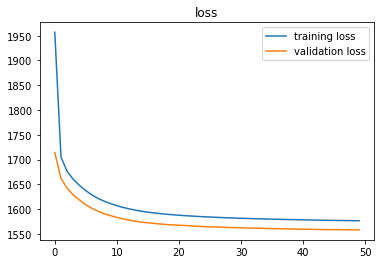

Plotting metrics...


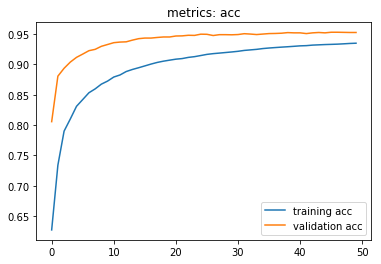

train {'acc': 0.9588182}
test {'acc': 0.9516}

Training student with temperature = 32 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1840355906833449115
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 2171353878843470493
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1768.1647 , acc = 0.06 
Epoch 1 , step 100 , loss= 1684.1935 , acc = 0.48 
Epoch 1 , step 200 , loss= 1434.7737 , acc = 0.56 
Epoch 1 , step 300 , loss= 1355.7401 , acc = 0.74 
Epoch 1 , step 400 , loss= 1301.9938 , acc = 0.75 
Epoch 1 , step 500 , loss= 1334.4681 , acc = 0.79 
Epoch 1 , step 549 , loss= 1350.7969 val_loss= 1291.5067 , acc = 0.77 val acc = 0.8134 
Epoch 1 finished, loss= 1464.8168 
Epoch 2 , step 50 , loss= 1341.753 , acc = 0.76 
Epoch 2 , step 150

Epoch 20 , step 50 , loss= 1102.4127 , acc = 0.96 
Epoch 20 , step 150 , loss= 1128.9393 , acc = 0.98 
Epoch 20 , step 250 , loss= 1199.17 , acc = 0.98 
Epoch 20 , step 350 , loss= 1209.4839 , acc = 0.95 
Epoch 20 , step 450 , loss= 1181.8096 , acc = 0.93 
Epoch 20 , step 549 , loss= 1262.7021 val_loss= 1174.2999 , acc = 0.97 val acc = 0.9476 
Epoch 20 finished, loss= 1189.4601 
Epoch 21 , step 0 , loss= 1210.0715 , acc = 0.92 
Epoch 21 , step 100 , loss= 1182.8694 , acc = 0.97 
Epoch 21 , step 200 , loss= 1232.3387 , acc = 0.94 
Epoch 21 , step 300 , loss= 1190.8373 , acc = 0.98 
Epoch 21 , step 400 , loss= 1202.6346 , acc = 0.94 
Epoch 21 , step 500 , loss= 1236.7145 , acc = 0.98 
Epoch 21 , step 549 , loss= 1260.3022 val_loss= 1173.699 , acc = 0.93 val acc = 0.9478 
Epoch 21 finished, loss= 1188.6793 
Epoch 22 , step 50 , loss= 1241.0126 , acc = 0.94 
Epoch 22 , step 150 , loss= 1254.781 , acc = 0.99 
Epoch 22 , step 250 , loss= 1219.039 , acc = 0.98 
Epoch 22 , step 350 , loss= 112

Epoch 40 , step 150 , loss= 1186.2935 , acc = 0.95 
Epoch 40 , step 250 , loss= 1164.9392 , acc = 0.91 
Epoch 40 , step 350 , loss= 1173.8602 , acc = 0.97 
Epoch 40 , step 450 , loss= 1274.7648 , acc = 0.96 
Epoch 40 , step 549 , loss= 1281.4867 val_loss= 1167.9309 , acc = 0.96 val acc = 0.9544 
Epoch 40 finished, loss= 1181.8945 
Epoch 41 , step 0 , loss= 1188.8262 , acc = 0.95 
Epoch 41 , step 100 , loss= 1156.3081 , acc = 0.95 
Epoch 41 , step 200 , loss= 1120.1389 , acc = 0.99 
Epoch 41 , step 300 , loss= 1232.1133 , acc = 0.93 
Epoch 41 , step 400 , loss= 1150.7067 , acc = 0.95 
Epoch 41 , step 500 , loss= 1198.6155 , acc = 0.97 
Epoch 41 , step 549 , loss= 1181.5336 val_loss= 1167.6937 , acc = 0.94 val acc = 0.9546 
Epoch 41 finished, loss= 1181.7421 
Epoch 42 , step 50 , loss= 1128.5347 , acc = 0.95 
Epoch 42 , step 150 , loss= 1169.4849 , acc = 0.95 
Epoch 42 , step 250 , loss= 1107.3279 , acc = 0.96 
Epoch 42 , step 350 , loss= 1109.688 , acc = 0.97 
Epoch 42 , step 450 , loss

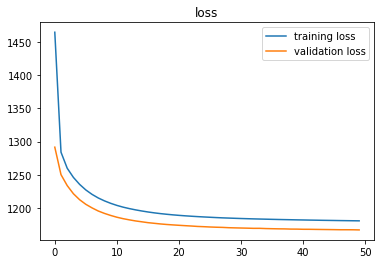

Plotting metrics...


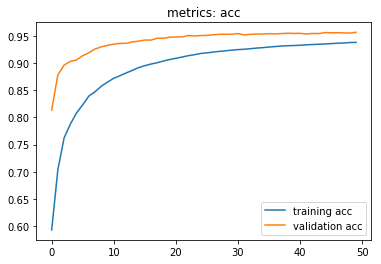

train {'acc': 0.9628182}
test {'acc': 0.9542}

Training student with temperature = 32 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14496889795289557915
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 5693896814888584580
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 1180.226 , acc = 0.07 
Epoch 1 , step 100 , loss= 1089.6428 , acc = 0.63 
Epoch 1 , step 200 , loss= 967.08264 , acc = 0.68 
Epoch 1 , step 300 , loss= 925.20776 , acc = 0.8 
Epoch 1 , step 400 , loss= 848.62335 , acc = 0.76 
Epoch 1 , step 500 , loss= 849.32825 , acc = 0.74 
Epoch 1 , step 549 , loss= 836.0406 val_loss= 859.2791 , acc = 0.83 val acc = 0.8264 
Epoch 1 finished, loss= 977.075 
Epoch 2 , step 50 , loss= 867.4732 , acc = 0.87 
Epoch 2 , step 150 , loss

Epoch 20 , step 250 , loss= 756.52356 , acc = 0.97 
Epoch 20 , step 350 , loss= 729.5261 , acc = 0.98 
Epoch 20 , step 450 , loss= 800.0553 , acc = 0.94 
Epoch 20 , step 549 , loss= 766.0372 val_loss= 784.67017 , acc = 0.91 val acc = 0.946 
Epoch 20 finished, loss= 794.98865 
Epoch 21 , step 0 , loss= 793.7348 , acc = 0.91 
Epoch 21 , step 100 , loss= 766.5515 , acc = 0.95 
Epoch 21 , step 200 , loss= 757.8536 , acc = 1.0 
Epoch 21 , step 300 , loss= 752.8784 , acc = 0.95 
Epoch 21 , step 400 , loss= 789.2101 , acc = 0.98 
Epoch 21 , step 500 , loss= 808.1419 , acc = 0.89 
Epoch 21 , step 549 , loss= 810.4244 val_loss= 784.1395 , acc = 0.96 val acc = 0.9478 
Epoch 21 finished, loss= 794.3958 
Epoch 22 , step 50 , loss= 779.5482 , acc = 0.95 
Epoch 22 , step 150 , loss= 817.16455 , acc = 0.91 
Epoch 22 , step 250 , loss= 814.0562 , acc = 0.95 
Epoch 22 , step 350 , loss= 810.63306 , acc = 0.95 
Epoch 22 , step 450 , loss= 764.81384 , acc = 0.95 
Epoch 22 , step 549 , loss= 752.3791 val_

Epoch 40 , step 549 , loss= 806.7857 val_loss= 779.96436 , acc = 0.97 val acc = 0.9544 
Epoch 40 finished, loss= 789.1966 
Epoch 41 , step 0 , loss= 803.8823 , acc = 0.97 
Epoch 41 , step 100 , loss= 816.1867 , acc = 0.95 
Epoch 41 , step 200 , loss= 813.38196 , acc = 0.94 
Epoch 41 , step 300 , loss= 777.50494 , acc = 0.93 
Epoch 41 , step 400 , loss= 772.0553 , acc = 0.97 
Epoch 41 , step 500 , loss= 784.44934 , acc = 0.97 
Epoch 41 , step 549 , loss= 765.50415 val_loss= 779.83246 , acc = 0.96 val acc = 0.955 
Epoch 41 finished, loss= 789.05475 
Epoch 42 , step 50 , loss= 771.2961 , acc = 0.97 
Epoch 42 , step 150 , loss= 818.8455 , acc = 0.95 
Epoch 42 , step 250 , loss= 810.2798 , acc = 0.94 
Epoch 42 , step 350 , loss= 791.90375 , acc = 0.94 
Epoch 42 , step 450 , loss= 786.25665 , acc = 0.97 
Epoch 42 , step 549 , loss= 758.7402 val_loss= 779.946 , acc = 0.95 val acc = 0.955 
Epoch 42 finished, loss= 788.9253 
Epoch 43 , step 0 , loss= 783.88806 , acc = 0.97 
Epoch 43 , step 100 

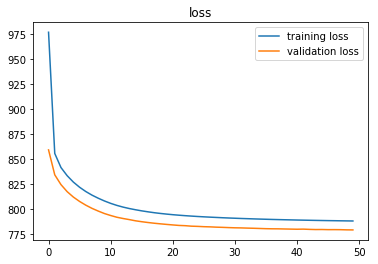

Plotting metrics...


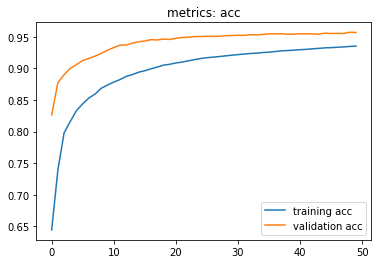

train {'acc': 0.9608909}
test {'acc': 0.9549}

Training student with temperature = 32 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18211172095422704832
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 16566744181779170730
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 590.74634 , acc = 0.22 
Epoch 1 , step 100 , loss= 552.44824 , acc = 0.59 
Epoch 1 , step 200 , loss= 486.38513 , acc = 0.67 
Epoch 1 , step 300 , loss= 457.25305 , acc = 0.78 
Epoch 1 , step 400 , loss= 420.0154 , acc = 0.82 
Epoch 1 , step 500 , loss= 423.86658 , acc = 0.84 
Epoch 1 , step 549 , loss= 456.4272 val_loss= 431.12137 , acc = 0.8 val acc = 0.8174 
Epoch 1 finished, loss= 490.65897 
Epoch 2 , step 50 , loss= 412.20578 , acc = 0.87 
Epoch 2 , step 150

Epoch 20 , step 150 , loss= 370.75754 , acc = 0.97 
Epoch 20 , step 250 , loss= 383.39682 , acc = 0.97 
Epoch 20 , step 350 , loss= 399.4705 , acc = 0.98 
Epoch 20 , step 450 , loss= 405.78378 , acc = 0.95 
Epoch 20 , step 549 , loss= 387.89426 val_loss= 394.20905 , acc = 0.94 val acc = 0.943 
Epoch 20 finished, loss= 399.1749 
Epoch 21 , step 0 , loss= 394.47592 , acc = 0.93 
Epoch 21 , step 100 , loss= 398.6186 , acc = 0.96 
Epoch 21 , step 200 , loss= 370.89035 , acc = 0.95 
Epoch 21 , step 300 , loss= 377.09036 , acc = 0.98 
Epoch 21 , step 400 , loss= 377.225 , acc = 0.93 
Epoch 21 , step 500 , loss= 388.97928 , acc = 0.95 
Epoch 21 , step 549 , loss= 382.34808 val_loss= 393.94757 , acc = 0.9 val acc = 0.9432 
Epoch 21 finished, loss= 398.95654 
Epoch 22 , step 50 , loss= 406.47894 , acc = 0.96 
Epoch 22 , step 150 , loss= 395.0507 , acc = 0.98 
Epoch 22 , step 250 , loss= 378.72012 , acc = 0.97 
Epoch 22 , step 350 , loss= 397.28162 , acc = 0.94 
Epoch 22 , step 450 , loss= 387.8

Epoch 40 , step 350 , loss= 380.2508 , acc = 0.96 
Epoch 40 , step 450 , loss= 376.86206 , acc = 0.97 
Epoch 40 , step 549 , loss= 381.5801 val_loss= 391.8598 , acc = 0.98 val acc = 0.95 
Epoch 40 finished, loss= 396.43854 
Epoch 41 , step 0 , loss= 400.59924 , acc = 0.96 
Epoch 41 , step 100 , loss= 399.74973 , acc = 0.96 
Epoch 41 , step 200 , loss= 386.70322 , acc = 0.97 
Epoch 41 , step 300 , loss= 397.8708 , acc = 0.97 
Epoch 41 , step 400 , loss= 397.9098 , acc = 0.96 
Epoch 41 , step 500 , loss= 392.72916 , acc = 0.97 
Epoch 41 , step 549 , loss= 400.5989 val_loss= 391.8268 , acc = 0.92 val acc = 0.95 
Epoch 41 finished, loss= 396.34067 
Epoch 42 , step 50 , loss= 381.81778 , acc = 0.94 
Epoch 42 , step 150 , loss= 399.08606 , acc = 0.9 
Epoch 42 , step 250 , loss= 427.68732 , acc = 0.97 
Epoch 42 , step 350 , loss= 395.60907 , acc = 0.96 
Epoch 42 , step 450 , loss= 407.90622 , acc = 0.96 
Epoch 42 , step 549 , loss= 418.91748 val_loss= 391.6721 , acc = 0.93 val acc = 0.9498 
E

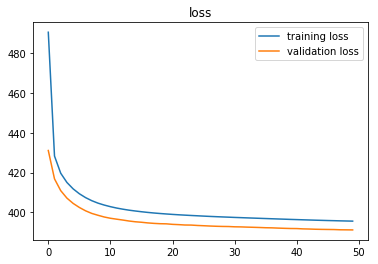

Plotting metrics...


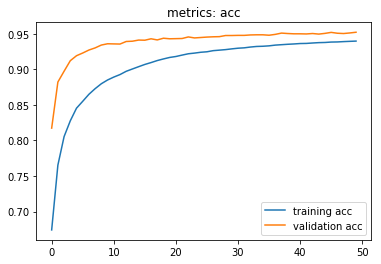

train {'acc': 0.9597091}
test {'acc': 0.954}

Training student with temperature = 32 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 1024 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6156507055200512410
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 7310975342924494137
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.2645478 , acc = 0.2 
Epoch 1 , step 100 , loss= 0.6272923 , acc = 0.87 
Epoch 1 , step 200 , loss= 0.55491656 , acc = 0.82 
Epoch 1 , step 300 , loss= 0.37589633 , acc = 0.92 
Epoch 1 , step 400 , loss= 0.46698993 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.26037928 , acc = 0.93 
Epoch 1 , step 549 , loss= 0.19142324 val_loss= 0.28775573 , acc = 0.96 val acc = 0.919 
Epoch 1 finished, loss= 0.55457145 
Epoch 2 , step 50 , loss= 0.2697744 , acc = 0.91 
Epoch 2 , step 

Epoch 19 , step 500 , loss= 0.10813453 , acc = 0.97 
Epoch 19 , step 549 , loss= 0.032880057 val_loss= 0.10367666 , acc = 0.98 val acc = 0.9702 
Epoch 19 finished, loss= 0.05747518 
Epoch 20 , step 50 , loss= 0.033331547 , acc = 0.99 
Epoch 20 , step 150 , loss= 0.029196955 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.10224121 , acc = 0.97 
Epoch 20 , step 350 , loss= 0.04552477 , acc = 0.99 
Epoch 20 , step 450 , loss= 0.077392384 , acc = 0.97 
Epoch 20 , step 549 , loss= 0.013893017 val_loss= 0.10722871 , acc = 1.0 val acc = 0.9678 
Epoch 20 finished, loss= 0.054654166 
Epoch 21 , step 0 , loss= 0.045322485 , acc = 0.99 
Epoch 21 , step 100 , loss= 0.0224169 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.03712304 , acc = 0.99 
Epoch 21 , step 300 , loss= 0.042941827 , acc = 0.98 
Epoch 21 , step 400 , loss= 0.07253293 , acc = 0.99 
Epoch 21 , step 500 , loss= 0.21568678 , acc = 0.95 
Epoch 21 , step 549 , loss= 0.013180083 val_loss= 0.10587212 , acc = 1.0 val acc = 0.9672 
Epoch 21 finish

Epoch 39 , step 100 , loss= 0.018603817 , acc = 1.0 
Epoch 39 , step 200 , loss= 0.007840291 , acc = 1.0 
Epoch 39 , step 300 , loss= 0.018786544 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.009865886 , acc = 1.0 
Epoch 39 , step 500 , loss= 0.021717457 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.11035728 val_loss= 0.122429274 , acc = 0.98 val acc = 0.9664 
Epoch 39 finished, loss= 0.023863567 
Epoch 40 , step 50 , loss= 0.028784439 , acc = 0.99 
Epoch 40 , step 150 , loss= 0.013095299 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.11233011 , acc = 0.98 
Epoch 40 , step 350 , loss= 0.007920259 , acc = 1.0 
Epoch 40 , step 450 , loss= 0.0068109925 , acc = 1.0 
Epoch 40 , step 549 , loss= 0.026133496 val_loss= 0.12674358 , acc = 0.99 val acc = 0.9668 
Epoch 40 finished, loss= 0.022755254 
Epoch 41 , step 0 , loss= 0.0074181003 , acc = 1.0 
Epoch 41 , step 100 , loss= 0.017443294 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.010420785 , acc = 1.0 
Epoch 41 , step 300 , loss= 0.013109168 , acc = 1.

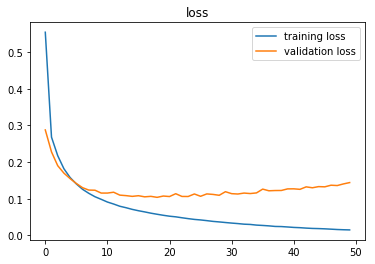

Plotting metrics...


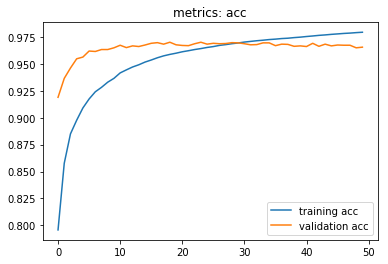

train {'acc': 0.9972364}
test {'acc': 0.9691}

Training student with temperature = 64 , coef_softloss = 1.0 , coef_hardloss = 0.0 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4702250539232382754
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 10812961631463468469
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 9431.02 , acc = 0.06 
Epoch 1 , step 100 , loss= 9221.466 , acc = 0.35 
Epoch 1 , step 200 , loss= 9057.141 , acc = 0.49 
Epoch 1 , step 300 , loss= 8793.312 , acc = 0.61 
Epoch 1 , step 400 , loss= 8632.79 , acc = 0.76 
Epoch 1 , step 500 , loss= 8870.775 , acc = 0.78 
Epoch 1 , step 549 , loss= 8699.456 val_loss= 8728.024 , acc = 0.74 val acc = 0.7612 
Epoch 1 finished, loss= 8985.36 
Epoch 2 , step 50 , loss= 8666.468 , acc = 0.79 
Epoch 2 , step 150 , loss= 8699

Epoch 20 , step 350 , loss= 8532.496 , acc = 0.93 
Epoch 20 , step 450 , loss= 8477.971 , acc = 0.98 
Epoch 20 , step 549 , loss= 8662.99 val_loss= 8521.759 , acc = 0.92 val acc = 0.9426 
Epoch 20 finished, loss= 8554.168 
Epoch 21 , step 0 , loss= 8545.403 , acc = 0.94 
Epoch 21 , step 100 , loss= 8345.606 , acc = 0.95 
Epoch 21 , step 200 , loss= 8557.237 , acc = 0.89 
Epoch 21 , step 300 , loss= 8637.699 , acc = 0.94 
Epoch 21 , step 400 , loss= 8318.22 , acc = 0.96 
Epoch 21 , step 500 , loss= 8630.885 , acc = 0.92 
Epoch 21 , step 549 , loss= 8556.532 val_loss= 8520.968 , acc = 0.9 val acc = 0.942 
Epoch 21 finished, loss= 8553.057 
Epoch 22 , step 50 , loss= 8605.848 , acc = 0.93 
Epoch 22 , step 150 , loss= 8466.473 , acc = 0.91 
Epoch 22 , step 250 , loss= 8597.063 , acc = 0.9 
Epoch 22 , step 350 , loss= 8331.441 , acc = 0.95 
Epoch 22 , step 450 , loss= 8485.251 , acc = 0.93 
Epoch 22 , step 549 , loss= 8456.494 val_loss= 8520.053 , acc = 0.93 val acc = 0.9428 
Epoch 22 finis

Epoch 41 , step 100 , loss= 8432.311 , acc = 0.99 
Epoch 41 , step 200 , loss= 8557.922 , acc = 0.94 
Epoch 41 , step 300 , loss= 8505.059 , acc = 0.96 
Epoch 41 , step 400 , loss= 8563.317 , acc = 0.92 
Epoch 41 , step 500 , loss= 8559.544 , acc = 0.94 
Epoch 41 , step 549 , loss= 8612.567 val_loss= 8511.81 , acc = 0.91 val acc = 0.9496 
Epoch 41 finished, loss= 8542.632 
Epoch 42 , step 50 , loss= 8578.416 , acc = 0.93 
Epoch 42 , step 150 , loss= 8711.673 , acc = 0.95 
Epoch 42 , step 250 , loss= 8561.006 , acc = 0.93 
Epoch 42 , step 350 , loss= 8567.16 , acc = 0.93 
Epoch 42 , step 450 , loss= 8430.885 , acc = 0.96 
Epoch 42 , step 549 , loss= 8682.075 val_loss= 8511.552 , acc = 0.95 val acc = 0.9492 
Epoch 42 finished, loss= 8542.342 
Epoch 43 , step 0 , loss= 8395.738 , acc = 0.96 
Epoch 43 , step 100 , loss= 8695.173 , acc = 0.95 
Epoch 43 , step 200 , loss= 8476.428 , acc = 0.93 
Epoch 43 , step 300 , loss= 8563.367 , acc = 0.93 
Epoch 43 , step 400 , loss= 8513.29 , acc = 0.9

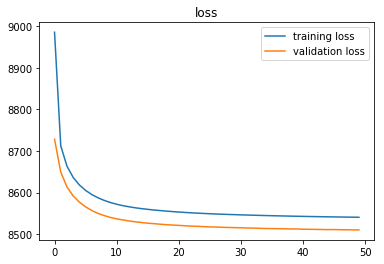

Plotting metrics...


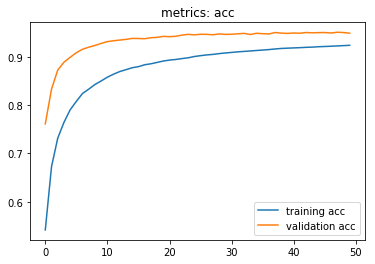

train {'acc': 0.9489818}
test {'acc': 0.9436}

Training student with temperature = 64 , coef_softloss = 0.75 , coef_hardloss = 0.25 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10408312098766820139
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 6450029759046385948
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 7073.752 , acc = 0.05 
Epoch 1 , step 100 , loss= 6975.886 , acc = 0.35 
Epoch 1 , step 200 , loss= 6752.9287 , acc = 0.51 
Epoch 1 , step 300 , loss= 6460.2705 , acc = 0.65 
Epoch 1 , step 400 , loss= 6552.3535 , acc = 0.81 
Epoch 1 , step 500 , loss= 6640.1973 , acc = 0.75 
Epoch 1 , step 549 , loss= 6722.182 val_loss= 6543.481 , acc = 0.69 val acc = 0.7776 
Epoch 1 finished, loss= 6734.7207 
Epoch 2 , step 50 , loss= 6614.4746 , acc = 0.74 
Epoch 2 , step 150 ,

Epoch 20 , step 150 , loss= 6468.559 , acc = 0.89 
Epoch 20 , step 250 , loss= 6321.5728 , acc = 0.93 
Epoch 20 , step 350 , loss= 6390.2466 , acc = 0.97 
Epoch 20 , step 450 , loss= 6291.052 , acc = 0.91 
Epoch 20 , step 549 , loss= 6375.585 val_loss= 6395.916 , acc = 0.95 val acc = 0.9392 
Epoch 20 finished, loss= 6419.889 
Epoch 21 , step 0 , loss= 6470.7954 , acc = 0.93 
Epoch 21 , step 100 , loss= 6452.4463 , acc = 0.96 
Epoch 21 , step 200 , loss= 6486.769 , acc = 0.95 
Epoch 21 , step 300 , loss= 6365.7993 , acc = 0.95 
Epoch 21 , step 400 , loss= 6386.4014 , acc = 0.95 
Epoch 21 , step 500 , loss= 6380.96 , acc = 0.9 
Epoch 21 , step 549 , loss= 6342.633 val_loss= 6395.0415 , acc = 0.94 val acc = 0.94 
Epoch 21 finished, loss= 6418.94 
Epoch 22 , step 50 , loss= 6463.2324 , acc = 0.93 
Epoch 22 , step 150 , loss= 6368.1533 , acc = 0.94 
Epoch 22 , step 250 , loss= 6345.692 , acc = 0.97 
Epoch 22 , step 350 , loss= 6474.625 , acc = 0.96 
Epoch 22 , step 450 , loss= 6469.936 , ac

Epoch 40 , step 450 , loss= 6277.2104 , acc = 0.96 
Epoch 40 , step 549 , loss= 6248.208 val_loss= 6387.0933 , acc = 0.95 val acc = 0.9478 
Epoch 40 finished, loss= 6409.602 
Epoch 41 , step 0 , loss= 6392.8584 , acc = 0.95 
Epoch 41 , step 100 , loss= 6307.431 , acc = 0.96 
Epoch 41 , step 200 , loss= 6336.335 , acc = 0.97 
Epoch 41 , step 300 , loss= 6408.319 , acc = 0.9 
Epoch 41 , step 400 , loss= 6403.68 , acc = 0.96 
Epoch 41 , step 500 , loss= 6485.3994 , acc = 0.92 
Epoch 41 , step 549 , loss= 6368.3477 val_loss= 6386.8076 , acc = 0.96 val acc = 0.9482 
Epoch 41 finished, loss= 6409.2974 
Epoch 42 , step 50 , loss= 6442.575 , acc = 0.98 
Epoch 42 , step 150 , loss= 6524.174 , acc = 0.93 
Epoch 42 , step 250 , loss= 6345.1396 , acc = 0.95 
Epoch 42 , step 350 , loss= 6364.0054 , acc = 0.95 
Epoch 42 , step 450 , loss= 6476.1826 , acc = 0.99 
Epoch 42 , step 549 , loss= 6376.0728 val_loss= 6386.4478 , acc = 0.92 val acc = 0.9488 
Epoch 42 finished, loss= 6409.031 
Epoch 43 , step

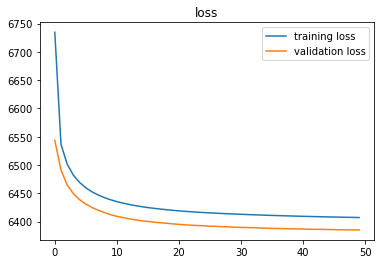

Plotting metrics...


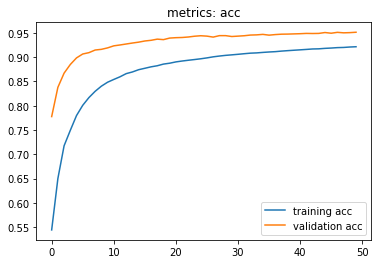

train {'acc': 0.95012724}
test {'acc': 0.9462}

Training student with temperature = 64 , coef_softloss = 0.5 , coef_hardloss = 0.5 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15459520723495417533
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 8654450923942546714
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 4716.091 , acc = 0.14 
Epoch 1 , step 100 , loss= 4646.582 , acc = 0.36 
Epoch 1 , step 200 , loss= 4544.183 , acc = 0.53 
Epoch 1 , step 300 , loss= 4397.122 , acc = 0.69 
Epoch 1 , step 400 , loss= 4416.0693 , acc = 0.74 
Epoch 1 , step 500 , loss= 4452.208 , acc = 0.77 
Epoch 1 , step 549 , loss= 4424.3345 val_loss= 4367.443 , acc = 0.76 val acc = 0.7762 
Epoch 1 finished, loss= 4495.5723 
Epoch 2 , step 50 , loss= 4463.2007 , acc = 0.75 
Epoch 2 , step 150 , lo

Epoch 20 , step 250 , loss= 4220.068 , acc = 0.92 
Epoch 20 , step 350 , loss= 4317.0117 , acc = 0.96 
Epoch 20 , step 450 , loss= 4357.1445 , acc = 0.95 
Epoch 20 , step 549 , loss= 4251.4307 val_loss= 4266.4385 , acc = 0.98 val acc = 0.936 
Epoch 20 finished, loss= 4282.0913 
Epoch 21 , step 0 , loss= 4279.2915 , acc = 0.94 
Epoch 21 , step 100 , loss= 4341.802 , acc = 0.96 
Epoch 21 , step 200 , loss= 4312.322 , acc = 0.93 
Epoch 21 , step 300 , loss= 4269.0024 , acc = 0.93 
Epoch 21 , step 400 , loss= 4294.3647 , acc = 0.95 
Epoch 21 , step 500 , loss= 4325.906 , acc = 0.88 
Epoch 21 , step 549 , loss= 4236.7466 val_loss= 4266.0713 , acc = 0.96 val acc = 0.936 
Epoch 21 finished, loss= 4281.5493 
Epoch 22 , step 50 , loss= 4390.257 , acc = 0.92 
Epoch 22 , step 150 , loss= 4269.3105 , acc = 0.95 
Epoch 22 , step 250 , loss= 4294.3535 , acc = 0.89 
Epoch 22 , step 350 , loss= 4255.9214 , acc = 0.9 
Epoch 22 , step 450 , loss= 4287.0605 , acc = 0.96 
Epoch 22 , step 549 , loss= 4279.

Epoch 40 , step 450 , loss= 4237.7915 , acc = 0.9 
Epoch 40 , step 549 , loss= 4309.2144 val_loss= 4260.688 , acc = 0.95 val acc = 0.9418 
Epoch 40 finished, loss= 4275.536 
Epoch 41 , step 0 , loss= 4288.565 , acc = 0.93 
Epoch 41 , step 100 , loss= 4307.7324 , acc = 0.93 
Epoch 41 , step 200 , loss= 4288.439 , acc = 0.92 
Epoch 41 , step 300 , loss= 4308.0044 , acc = 0.94 
Epoch 41 , step 400 , loss= 4299.2354 , acc = 0.9 
Epoch 41 , step 500 , loss= 4198.1562 , acc = 0.95 
Epoch 41 , step 549 , loss= 4286.759 val_loss= 4260.419 , acc = 0.92 val acc = 0.9414 
Epoch 41 finished, loss= 4275.347 
Epoch 42 , step 50 , loss= 4336.9014 , acc = 0.9 
Epoch 42 , step 150 , loss= 4276.7715 , acc = 0.97 
Epoch 42 , step 250 , loss= 4270.099 , acc = 0.91 
Epoch 42 , step 350 , loss= 4304.4736 , acc = 0.93 
Epoch 42 , step 450 , loss= 4279.1045 , acc = 0.96 
Epoch 42 , step 549 , loss= 4298.7095 val_loss= 4260.327 , acc = 0.94 val acc = 0.9422 
Epoch 42 finished, loss= 4275.1616 
Epoch 43 , step 

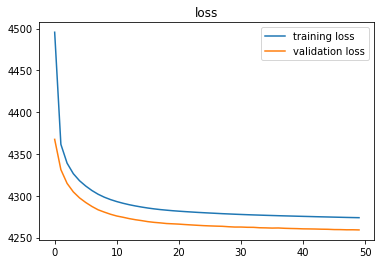

Plotting metrics...


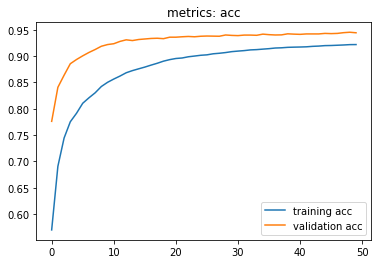

train {'acc': 0.94796365}
test {'acc': 0.9408}

Training student with temperature = 64 , coef_softloss = 0.25 , coef_hardloss = 0.75 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2009529990760298094
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 17858474898501784696
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2359.2747 , acc = 0.19 
Epoch 1 , step 100 , loss= 2321.8896 , acc = 0.4 
Epoch 1 , step 200 , loss= 2256.6675 , acc = 0.59 
Epoch 1 , step 300 , loss= 2192.0757 , acc = 0.73 
Epoch 1 , step 400 , loss= 2249.9663 , acc = 0.72 
Epoch 1 , step 500 , loss= 2210.126 , acc = 0.78 
Epoch 1 , step 549 , loss= 2193.9067 val_loss= 2182.5747 , acc = 0.73 val acc = 0.7908 
Epoch 1 finished, loss= 2249.619 
Epoch 2 , step 50 , loss= 2181.4058 , acc = 0.81 
Epoch 2 , step 150

Epoch 20 , step 50 , loss= 2133.1262 , acc = 0.99 
Epoch 20 , step 150 , loss= 2137.2808 , acc = 0.95 
Epoch 20 , step 250 , loss= 2150.8357 , acc = 0.94 
Epoch 20 , step 350 , loss= 2167.7432 , acc = 0.92 
Epoch 20 , step 450 , loss= 2171.8535 , acc = 0.89 
Epoch 20 , step 549 , loss= 2101.0173 val_loss= 2131.1272 , acc = 0.96 val acc = 0.9448 
Epoch 20 finished, loss= 2139.0498 
Epoch 21 , step 0 , loss= 2134.6384 , acc = 0.92 
Epoch 21 , step 100 , loss= 2156.3396 , acc = 0.95 
Epoch 21 , step 200 , loss= 2101.1125 , acc = 1.0 
Epoch 21 , step 300 , loss= 2074.2808 , acc = 0.98 
Epoch 21 , step 400 , loss= 2129.2031 , acc = 0.96 
Epoch 21 , step 500 , loss= 2176.0781 , acc = 0.91 
Epoch 21 , step 549 , loss= 2161.3552 val_loss= 2130.9326 , acc = 0.95 val acc = 0.946 
Epoch 21 finished, loss= 2138.737 
Epoch 22 , step 50 , loss= 2133.8657 , acc = 0.94 
Epoch 22 , step 150 , loss= 2142.2717 , acc = 0.97 
Epoch 22 , step 250 , loss= 2145.4507 , acc = 0.94 
Epoch 22 , step 350 , loss= 2

Epoch 40 , step 250 , loss= 2142.738 , acc = 0.95 
Epoch 40 , step 350 , loss= 2176.5276 , acc = 0.93 
Epoch 40 , step 450 , loss= 2167.9866 , acc = 0.96 
Epoch 40 , step 549 , loss= 2170.9949 val_loss= 2128.218 , acc = 0.92 val acc = 0.953 
Epoch 40 finished, loss= 2135.594 
Epoch 41 , step 0 , loss= 2129.8843 , acc = 0.92 
Epoch 41 , step 100 , loss= 2118.3894 , acc = 0.98 
Epoch 41 , step 200 , loss= 2133.4783 , acc = 0.96 
Epoch 41 , step 300 , loss= 2112.8167 , acc = 0.98 
Epoch 41 , step 400 , loss= 2130.7104 , acc = 0.97 
Epoch 41 , step 500 , loss= 2150.9478 , acc = 0.96 
Epoch 41 , step 549 , loss= 2108.9546 val_loss= 2128.127 , acc = 0.94 val acc = 0.9528 
Epoch 41 finished, loss= 2135.4995 
Epoch 42 , step 50 , loss= 2164.3855 , acc = 0.97 
Epoch 42 , step 150 , loss= 2130.7932 , acc = 0.96 
Epoch 42 , step 250 , loss= 2138.7673 , acc = 0.96 
Epoch 42 , step 350 , loss= 2114.561 , acc = 0.96 
Epoch 42 , step 450 , loss= 2121.66 , acc = 0.96 
Epoch 42 , step 549 , loss= 2147.

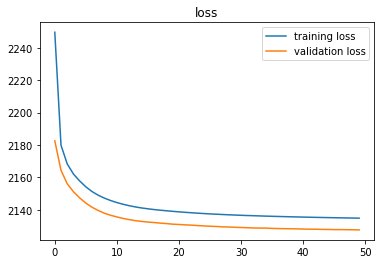

Plotting metrics...


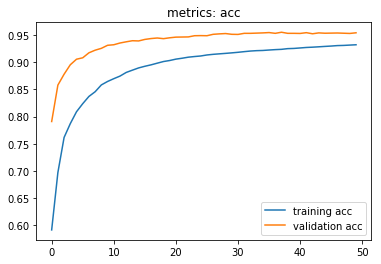

train {'acc': 0.9584909}
test {'acc': 0.9506}

Training student with temperature = 64 , coef_softloss = 0.0 , coef_hardloss = 1.0 ,tmp_effect = 4096 . 
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3040707105641796135
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5292621824
locality {
  bus_id: 1
}
incarnation: 17596716679404348200
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:03:00.0, compute capability: 6.1"
]
Epoch 1 , step 0 , loss= 2.3452013 , acc = 0.13 
Epoch 1 , step 100 , loss= 0.7078427 , acc = 0.79 
Epoch 1 , step 200 , loss= 0.56096405 , acc = 0.86 
Epoch 1 , step 300 , loss= 0.39914903 , acc = 0.89 
Epoch 1 , step 400 , loss= 0.35614064 , acc = 0.87 
Epoch 1 , step 500 , loss= 0.29432517 , acc = 0.89 
Epoch 1 , step 549 , loss= 0.22033003 val_loss= 0.29377478 , acc = 0.94 val acc = 0.9162 
Epoch 1 finished, loss= 0.5718318 
Epoch 2 , step 50 , loss= 0.22714715 , acc = 0.93 
Epoch 2 , s

Epoch 19 , step 500 , loss= 0.052711792 , acc = 0.98 
Epoch 19 , step 549 , loss= 0.07867172 val_loss= 0.11906035 , acc = 0.98 val acc = 0.9652 
Epoch 19 finished, loss= 0.07192687 
Epoch 20 , step 50 , loss= 0.07001546 , acc = 0.98 
Epoch 20 , step 150 , loss= 0.08239755 , acc = 0.98 
Epoch 20 , step 250 , loss= 0.009838951 , acc = 1.0 
Epoch 20 , step 350 , loss= 0.07306638 , acc = 0.97 
Epoch 20 , step 450 , loss= 0.023066463 , acc = 0.99 
Epoch 20 , step 549 , loss= 0.047817107 val_loss= 0.12090139 , acc = 0.99 val acc = 0.9644 
Epoch 20 finished, loss= 0.068584315 
Epoch 21 , step 0 , loss= 0.122499675 , acc = 0.97 
Epoch 21 , step 100 , loss= 0.034269925 , acc = 1.0 
Epoch 21 , step 200 , loss= 0.050067373 , acc = 0.98 
Epoch 21 , step 300 , loss= 0.11120306 , acc = 0.96 
Epoch 21 , step 400 , loss= 0.039874252 , acc = 1.0 
Epoch 21 , step 500 , loss= 0.041695498 , acc = 1.0 
Epoch 21 , step 549 , loss= 0.054927517 val_loss= 0.12362231 , acc = 0.98 val acc = 0.9636 
Epoch 21 fini

Epoch 39 , step 100 , loss= 0.020780897 , acc = 0.99 
Epoch 39 , step 200 , loss= 0.0925516 , acc = 0.98 
Epoch 39 , step 300 , loss= 0.0974055 , acc = 0.99 
Epoch 39 , step 400 , loss= 0.030786717 , acc = 0.99 
Epoch 39 , step 500 , loss= 0.017817112 , acc = 1.0 
Epoch 39 , step 549 , loss= 0.032947086 val_loss= 0.13769656 , acc = 0.99 val acc = 0.9644 
Epoch 39 finished, loss= 0.034363825 
Epoch 40 , step 50 , loss= 0.018894102 , acc = 1.0 
Epoch 40 , step 150 , loss= 0.011697253 , acc = 1.0 
Epoch 40 , step 250 , loss= 0.032666933 , acc = 0.99 
Epoch 40 , step 350 , loss= 0.056690354 , acc = 0.98 
Epoch 40 , step 450 , loss= 0.063087456 , acc = 0.98 
Epoch 40 , step 549 , loss= 0.04897612 val_loss= 0.14298245 , acc = 0.99 val acc = 0.962 
Epoch 40 finished, loss= 0.033114992 
Epoch 41 , step 0 , loss= 0.11219933 , acc = 0.99 
Epoch 41 , step 100 , loss= 0.011759646 , acc = 1.0 
Epoch 41 , step 200 , loss= 0.0289537 , acc = 0.98 
Epoch 41 , step 300 , loss= 0.04042912 , acc = 0.99 
E

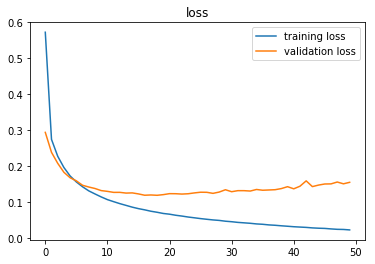

Plotting metrics...


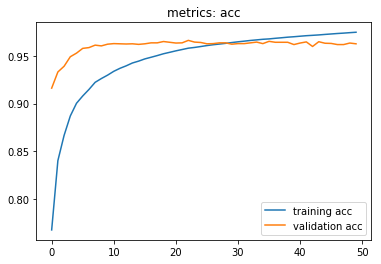

train {'acc': 0.99465454}
test {'acc': 0.967}

{2: [{'acc': 0.9665}, {'acc': 0.9673}, {'acc': 0.9655}, {'acc': 0.9664}, {'acc': 0.9685}], 4: [{'acc': 0.9665}, {'acc': 0.9688}, {'acc': 0.9641}, {'acc': 0.9666}, {'acc': 0.9682}], 8: [{'acc': 0.9634}, {'acc': 0.9669}, {'acc': 0.9627}, {'acc': 0.966}, {'acc': 0.9673}], 16: [{'acc': 0.9633}, {'acc': 0.9634}, {'acc': 0.964}, {'acc': 0.9608}, {'acc': 0.967}], 32: [{'acc': 0.9516}, {'acc': 0.9542}, {'acc': 0.9549}, {'acc': 0.954}, {'acc': 0.9691}], 64: [{'acc': 0.9436}, {'acc': 0.9462}, {'acc': 0.9408}, {'acc': 0.9506}, {'acc': 0.967}]}


In [15]:
# df_exp = pd.DataFrame(columns = ['coef_softloss', 'temperature', 'temperature_effect', 'acc'])
list_exp2 = []

temperatures = [2,4,8,16,32,64]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    
    coef_soft_losses = [1.0, 0.75, 0.5, 0.25, 0.0]
    tmp_effect = temperature**2 # [1/temperature**2, 1, temperature**2]
    for coef_softloss in coef_soft_losses:
        coef_hardloss = 1-coef_softloss
        
        print('Training student with temperature =',temperature,
              ', coef_softloss =',coef_softloss,', coef_hardloss =',coef_hardloss,
              ',tmp_effect =', tmp_effect,'. ')
        # build network architecture
#         student = build_small_model(input_dims, output_dims, session, is_student=True)
        student = build_small_model(input_dims, output_dims, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss*tmp_effect# * temperature**2
            ,coef_hardloss= coef_hardloss
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=100
            ,n_epochs=50
            ,display_steps=100)
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        dict_exp = {'coef_softloss':coef_softloss, 'coef_hardloss':coef_hardloss, 
                    'temperature':temperature, 'temperature_effect':tmp_effect, 
                    'train_acc':train_metric['acc'], 'test_acc':test_metric['acc']}
        # show result
        print('Student performance with',dict_exp)
#         print('Student performance with temperature =',temperature,
#              ', coef_softloss =',coef_softloss,',tmp_effi =', tmp_effect,'. ')
        student.plt_loss()
        student.plt_metrics()
        print('train',train_metric)
        print('test',test_metric)
        print()
        list_exp2.append(dict_exp)
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
#         gc.collect()
df_exp2 = pd.DataFrame(list_exp2)
print(test_metrics)

In [16]:
print(df_exp2)
print(df_exp2['test_acc'].mean())

    coef_hardloss  coef_softloss  temperature  temperature_effect  test_acc  \
0            0.00           1.00            2                   4    0.9665   
1            0.25           0.75            2                   4    0.9673   
2            0.50           0.50            2                   4    0.9655   
3            0.75           0.25            2                   4    0.9664   
4            1.00           0.00            2                   4    0.9685   
5            0.00           1.00            4                  16    0.9665   
6            0.25           0.75            4                  16    0.9688   
7            0.50           0.50            4                  16    0.9641   
8            0.75           0.25            4                  16    0.9666   
9            1.00           0.00            4                  16    0.9682   
10           0.00           1.00            8                  64    0.9634   
11           0.25           0.75            8       

In [17]:

# close_session(session)